##### LIBRARIES AND ORDERED DICT

In [1]:
#standard libraries
import pandas as pd, numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#text
import re

#maths and statistics
import math
import statistics

#unpack dict
import ast

#store and manage
from collections import Counter
from collections import OrderedDict

#geography
from geopy.geocoders import Nominatim

#date and time
from datetime import datetime
import time

#statistical testing
import scipy.stats as stats
import statsmodels.api as sm

#preprocessing
import category_encoders
from sklearn import preprocessing
#from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, RobustScaler

#machine learning
from sklearn import metrics
from sklearn import model_selection
from sklearn import feature_selection

from sklearn import linear_model
from sklearn import ensemble
from sklearn import svm

#hyperparameters
import optuna
from optuna import Trial, study, samplers

#web framework
from flask import Flask, request, jsonify

#serializing and deserializing objects
import pickle

#logging
from loguru import logger

In [2]:
#create an ordered dict to store model results
review = OrderedDict([
    ('model', []),
    ('type', []),
    ('features', []),
    ('hyperparameters', []),
    ('learning time', []),
    ('MAE, test', []),
    ('MSE, test', []),
    ('MAPE, test', []),
    ('R2, test', [])
    ]
)

##### DATA DESCRIPTION

➔ **status** — sale status; \
➔ **private pool** and **PrivatePool** — availability of a private pool; \
➔ **propertyType** - property type; \
➔ **street** — property address; \
➔ **baths** — number of bathrooms; \
➔ **homeFacts** — property construction information (contains several types of information that affect property valuation); \
➔ **fireplace** — presence of a fireplace; \
➔ **city** — city; \
➔ **schools** — information about schools in the area; \
➔ **sqft** — square footage; \
➔ **zipcode** — postal code; \
➔ **beds** — number of bedrooms; \
➔ **state** — state; \
➔ **stories** — number of floors; \
➔ **mls-id** and **MlsId** — MLS (Multiple Listing Service) identifier; \
➔ **target** — the price of the real estate object (the target feature that needs to be predicted).

### **DATA INTRODUCTION**

In [3]:
original_data = pd.read_csv('data/real_estate/data.csv')
original_data.head(2)

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
0,Active,NaN,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,28387,4,NC,NaN,NaN,NaN,611019,"$418,000"
1,for sale,NaN,single-family home,12911 E Heroy Ave,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",NaN,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",99216,3 Beds,WA,2.0,NaN,NaN,201916904,"$310,000"


In [4]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   status        337267 non-null  object
 1   private pool  4181 non-null    object
 2   propertyType  342452 non-null  object
 3   street        377183 non-null  object
 4   baths         270847 non-null  object
 5   homeFacts     377185 non-null  object
 6   fireplace     103114 non-null  object
 7   city          377151 non-null  object
 8   schools       377185 non-null  object
 9   sqft          336608 non-null  object
 10  zipcode       377185 non-null  object
 11  beds          285903 non-null  object
 12  state         377185 non-null  object
 13  stories       226469 non-null  object
 14  mls-id        24942 non-null   object
 15  PrivatePool   40311 non-null   object
 16  MlsId         310305 non-null  object
 17  target        374704 non-null  object
dtypes: object(18)
memory usa

**basic statistics**

In [5]:
original_data.describe()

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
count,337267,4181,342452,377183,270847,377185,103114,377151,377185,336608,377185,285903,377185,226469,24942,40311,310305,374704
unique,159,1,1280,337076,229,321009,1652,2026,297365,25405,4549,1184,39,347,24907,2,232944,43939
top,for sale,Yes,single-family home,Address Not Disclosed,2 Baths,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",yes,Houston,"[{'rating': [], 'data': {'Distance': [], 'Grad...",0,32137,3 Beds,FL,1.0,No MLS#,yes,NO MLS,"$225,000"
freq,156104,4181,92206,672,52466,7174,50356,24442,4204,11854,2141,53459,115449,67454,3,28793,24,1462


In [6]:
original_data.describe(include=object)

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
count,337267,4181,342452,377183,270847,377185,103114,377151,377185,336608,377185,285903,377185,226469,24942,40311,310305,374704
unique,159,1,1280,337076,229,321009,1652,2026,297365,25405,4549,1184,39,347,24907,2,232944,43939
top,for sale,Yes,single-family home,Address Not Disclosed,2 Baths,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",yes,Houston,"[{'rating': [], 'data': {'Distance': [], 'Grad...",0,32137,3 Beds,FL,1.0,No MLS#,yes,NO MLS,"$225,000"
freq,156104,4181,92206,672,52466,7174,50356,24442,4204,11854,2141,53459,115449,67454,3,28793,24,1462


**null values**

In [7]:
#check that there are null values in the data set
original_data.isnull().sum()[original_data.isnull().sum() > 0]

status           39918
private pool    373004
propertyType     34733
street               2
baths           106338
fireplace       274071
city                34
sqft             40577
beds             91282
stories         150716
mls-id          352243
PrivatePool     336874
MlsId            66880
target            2481
dtype: int64

**duplicates**

In [8]:
print(f'original dimension: {original_data.shape}')

original_data = original_data.drop_duplicates()

print(f'dimension without duplicates: {original_data.shape}')

original dimension: (377185, 18)
dimension without duplicates: (377135, 18)


### **DATA TRANSFORMATION**

- the long and arduous process of filling in null values and transforming data into a readable and useful format
- for every single feature used .join() to concatenate all elements of a feature into a list > set > list and then export the feature to Excel to sort and identify elements, thus identifying potential simularities in data and points of data correction

#### **status**

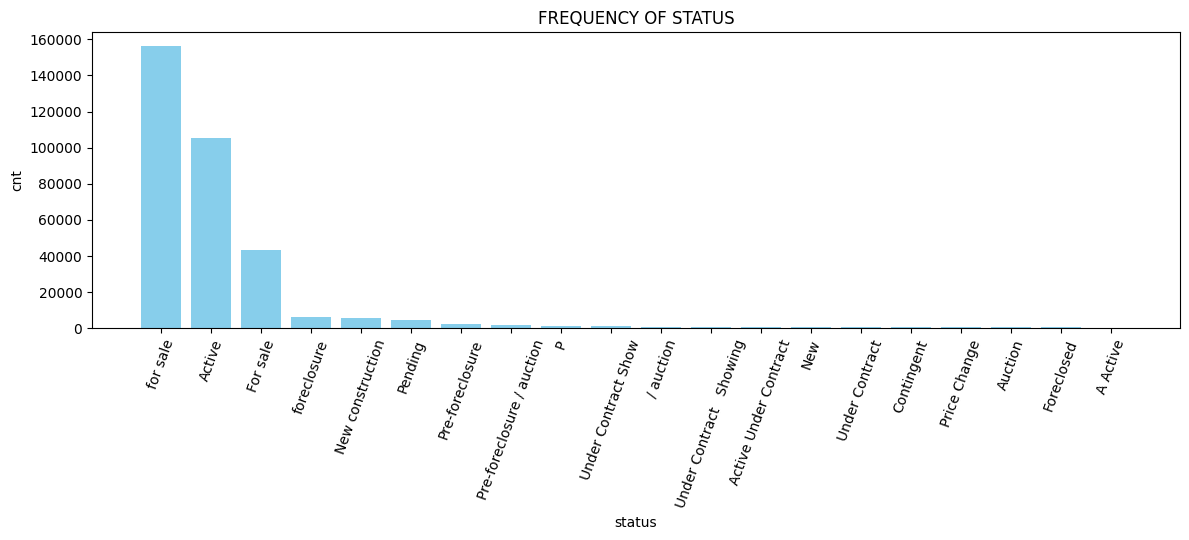

In [9]:
status_cnt = original_data['status'].value_counts().nlargest(20)

plt.figure(figsize=(12, 5.5))
plt.bar(status_cnt.index,
        status_cnt.values,
        color='skyblue')

plt.xlabel('status',
           fontsize=10)

plt.ylabel('cnt')
plt.title('FREQUENCY OF STATUS')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

In [10]:
original_data['status'].isnull().sum()[original_data['status'].isnull().sum() > 0]

array([39917])

In [11]:
#if no details given: either missing or it's a private listing
original_data['status'] = original_data['status'].fillna('private')

original_data['status'] = original_data['status'].apply(lambda x: str(x).lower())
original_data['status'] = original_data['status'].apply(lambda x: str(x).replace('  ', ''))

- mostly used Google to identify different statuses in real estate listings and what word abbreviations may mean
- sorted elements into groups based on gut feeling 

In [12]:
def group_the_status(table: pd.DataFrame):
  
  '''
    > identify elements in status and sort them into relevant listing status groups
  '''
  
  if 'auction' in str(table['status']):
    return 'auction'

  elif any(element in str(table['status']) for element in ['backup', 'back up', 'bckp', 'continue to show', 'showing']) or (str(table['status']) == 'pending ab') or (str(table['status']) == 'ps'):
    return 'backup'

  elif ('sold' in str(table['status'])) or (str(table['status']) == 'closed') or (str(table['status']) == 'accepted offer'):
    return 'closed'

  elif ('foreclos' in str(table['status'])) or (str(table['status']) == 'ct'):
    return 'foreclosure'

  elif (str(table['status']) == 'lease/purchase') or (str(table['status']) == 'lease/purchase pending'):
    return 'lease'

  elif any(element in str(table['status']) for element in ['conting', 'contract', 'pending']) or (str(table['status']) == 'p') or (str(table['status']) == 'pf') or (str(table['status']) == 'pi') or \
   (str(table['status']) == 'active option') or (str(table['status']) == 'active with offer') or (str(table['status']) == 'c continue show') or (str(table['status']) == 'due diligence period'):
    return 'contingent'

  elif ('coming soon' in str(table['status'])) or (str(table['status']) == 'c') or (str(table['status']) == 'temporary active'):
    return 'coming soon'

  elif (str(table['status']) == 'a active') or (str(table['status']) == 'active') or (str(table['status']) == 'back on market') or (str(table['status']) == 'for sale') or (str(table['status']) == 'listing extended') or \
   (str(table['status']) == 'price change') or (str(table['status']) == 're activated') or (str(table['status']) == 'reactivated'):
    return 'for sale'

  elif (str(table['status']) == 'new') or (str(table['status']) == 'new construction'):
    return 'new construction'

  elif 'rent' in str(table['status']):
    return 'rent'

  elif table['status'] == 'private':
    return 'private listing'

  else:
    return 'no known status'

original_data['listing_status'] = original_data.apply(group_the_status,
                                                      axis=1)

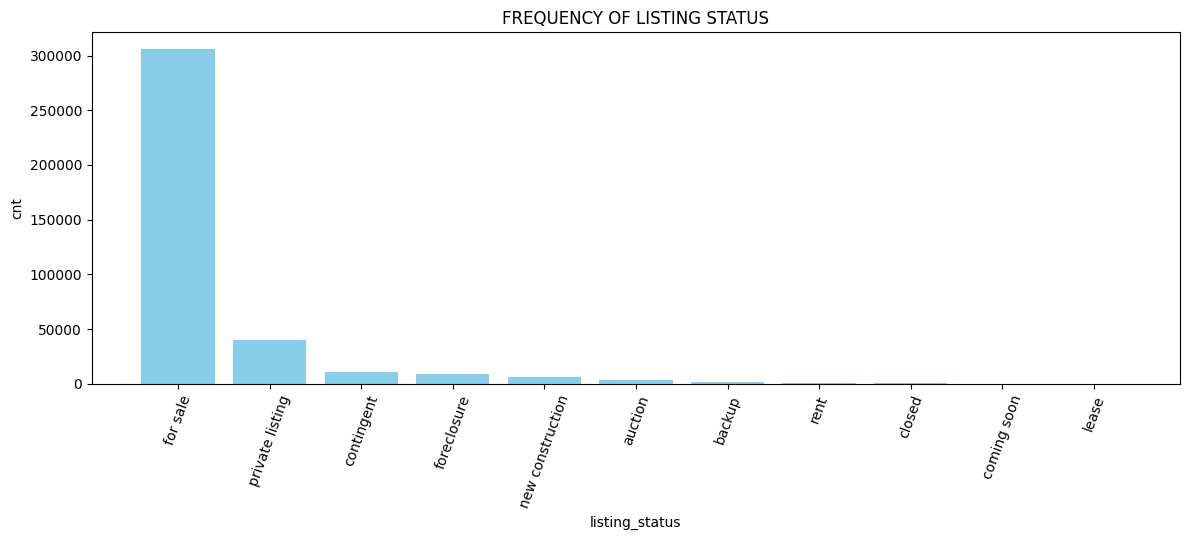

In [13]:
l_status_cnt = original_data['listing_status'].value_counts()

plt.figure(figsize=(12, 5.5))
plt.bar(l_status_cnt.index,
        l_status_cnt.values,
        color='skyblue')

plt.xlabel('listing_status',
           fontsize=10)

plt.ylabel('cnt')
plt.title('FREQUENCY OF LISTING STATUS')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

In [14]:
original_data['listing_status'].isnull().sum()[original_data['listing_status'].isnull().sum() > 0]

array([], dtype=int64)

In [15]:
original_data['listing_status'].value_counts()

listing_status
for sale            305880
private listing      39917
contingent           10462
foreclosure           9353
new construction      6164
auction               3070
backup                1412
rent                   412
closed                 311
coming soon            150
lease                    4
Name: count, dtype: int64

no need for further data cleaning unless to **potentially delete private listing** if it yields no reasonable predictions

In [16]:
original_data['listing_status'] = original_data['listing_status'].astype('string')

In [17]:
original_data = original_data.drop(['status'],
                                   axis=1)

#### **private pool**

- look for points of association: if one feature is missing, but the other isn't, take the element based on the latter, and vice versa
- both features correspond to the same thing, thus either can be filled in, investigate and take the data where available

In [18]:
print(original_data['private pool'].isnull().sum()[original_data['private pool'].isnull().sum() > 0])
print(original_data['PrivatePool'].isnull().sum()[original_data['PrivatePool'].isnull().sum() > 0])

[372954]
[336825]


In [19]:
original_data['private pool'] = original_data['private pool'].fillna('No')
original_data['PrivatePool'] = original_data['PrivatePool'].fillna('No')

original_data['private pool'] = original_data['private pool'].apply(lambda x: str(x).lower())
original_data['PrivatePool'] = original_data['PrivatePool'].apply(lambda x: str(x).lower())

In [20]:
def consolidate_the_pool(table: pd.DataFrame):
  
  '''
    > populate the private pool feature as either yes or no based on the availability of data in either of the two columns
  '''
  
  if table['private pool'] == table['PrivatePool']:
    return table['private pool']
  elif table['private pool'] == 'yes':
    return table['private pool']
  elif table['PrivatePool'] == 'yes':
    return table['PrivatePool']
  else:
    return 'no'

original_data['private_pool'] = original_data.apply(consolidate_the_pool,
                                                    axis=1)

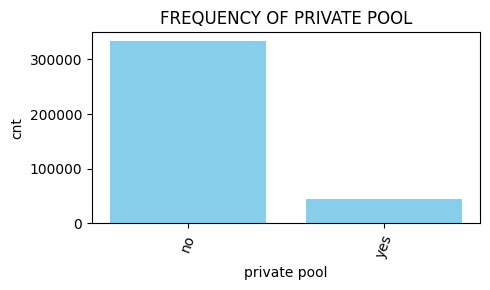

In [21]:
ppool_cnt = original_data['private_pool'].value_counts()

plt.figure(figsize=(5, 3))
plt.bar(ppool_cnt.index,
        ppool_cnt.values,
        color='skyblue')

plt.xlabel('private pool',
           fontsize=10)

plt.ylabel('cnt')
plt.title('FREQUENCY OF PRIVATE POOL')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

In [22]:
original_data['private_pool'].value_counts()

private_pool
no     332644
yes     44491
Name: count, dtype: int64

In [23]:
original_data['private_pool'].isnull().sum()[original_data['private_pool'].isnull().sum() > 0]

array([], dtype=int64)

no need for further data cleaning, **unlikely to contain any outliers** - either the property has a pool or it doesn't

In [24]:
original_data['private_pool'] = original_data['private_pool'].astype('string')

In [25]:
original_data = original_data.drop(['private pool', 'PrivatePool'],
                                   axis=1)

#### **fireplace**

- did a short investigation to find what type of fireplaces there are
- most popular options ended up being electric, gas, and woodburning

In [26]:
original_data['fireplace'].isnull().sum()[original_data['fireplace'].isnull().sum() > 0]

array([274024])

In [27]:
original_data['fireplace'].value_counts()

fireplace
yes                                                                     50353
Yes                                                                     20856
1                                                                       14544
2                                                                        2432
Not Applicable                                                           1993
                                                                        ...  
Free-standing, Insert, Wood                                                 1
Wood Burning, Attached Fireplace Doors/Screen, Electric, Gas Starter        1
One, Living Room                                                            1
FAMILYRM, Great Room, Living Room                                           1
Ceiling Fan, SMAPL, Utility Connection, Walk-In Closets                     1
Name: count, Length: 1652, dtype: int64

In [28]:
original_data['fireplace'] = original_data['fireplace'].apply(lambda x: str(x).lower())

In [29]:
def group_the_fireplace(table: pd.DataFrame):
  
  '''
    > identify elements in fireplace and sort them into relevant fireplace type groups
  '''
  
  if (str(table['fireplace']) == 'not applicable') or (str(table['fireplace']) == 'no fireplace') or (str(table['fireplace']) == 'no'):
    result = 'no fireplace'

  elif (str(table['fireplace']) == 'nan') or (str(table['fireplace']) == '0') or any(element in str(table['fireplace']) for element in ['furn', 'inoperative', 'n/k', 'non']):
    result = 'no fireplace'

  elif any(element in str(table['fireplace']) for element in ['free', 'mason', 'pellet', 'wood']):
    result = 'woodburning'

  elif any(element in str(table['fireplace']) for element in ['artif', 'electric']):
    result = 'electric'

  elif any(element in str(table['fireplace']) for element in ['gas', 'propane']):
    result = 'gas'

  elif any(element in str(table['fireplace']) for element in ['fire', 'fireplace', 'fp', 'frplc', 'hearth', 'heatilator',
                                                              'metal', 'prefab', 'pre-fab', 'see th', 'stone', 'yes', 'coal']):
    result = 'unknown type'

  elif (str(table['fireplace']) == 'one') or (str(table['fireplace']) == 'yes') or any(element in str(table['fireplace']) for element in ['brick']):
    result = 'unknown type'

  elif any(element in str(table['fireplace']) for element in ['1', '2', '3', '4', '5',
                                                              '6', '7', '8', '9', '10']):
    result = 'unknown type'

  elif str(table['fireplace']) == 'one' or any(element in str(table['fireplace']) for element in ['two', 'three', 'four', 'five',
                                                                                                  'six', 'seven', 'eight', 'nine']):
    result = 'unknown type'

  else:
    result = 'no fireplace'

  return result

original_data['type_of_fireplace'] = original_data.apply(group_the_fireplace,
                                                         axis=1)

In [30]:
original_data['type_of_fireplace'].value_counts()

type_of_fireplace
no fireplace    280481
unknown type     91455
gas               2922
woodburning       2098
electric           179
Name: count, dtype: int64

create a new feature to show whether the property has a fireplace or not

In [31]:
original_data['availability_of_fireplace'] = original_data['type_of_fireplace'].apply(lambda x: 'no' if x == 'no fireplace' else 'yes')

In [32]:
original_data['availability_of_fireplace'].value_counts()

availability_of_fireplace
no     280481
yes     96654
Name: count, dtype: int64

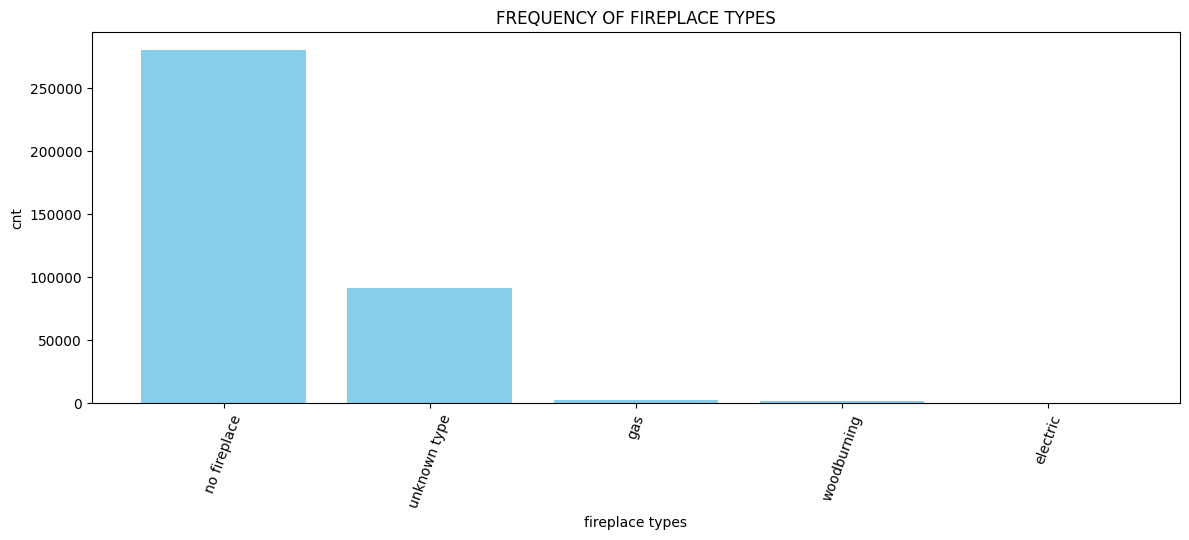

In [33]:
fireplace_types_cnt = original_data['type_of_fireplace'].value_counts()

plt.figure(figsize=(12, 5.5))
plt.bar(fireplace_types_cnt.index,
        fireplace_types_cnt.values,
        color='skyblue')

plt.xlabel('fireplace types',
           fontsize=10)

plt.ylabel('cnt')
plt.title('FREQUENCY OF FIREPLACE TYPES')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

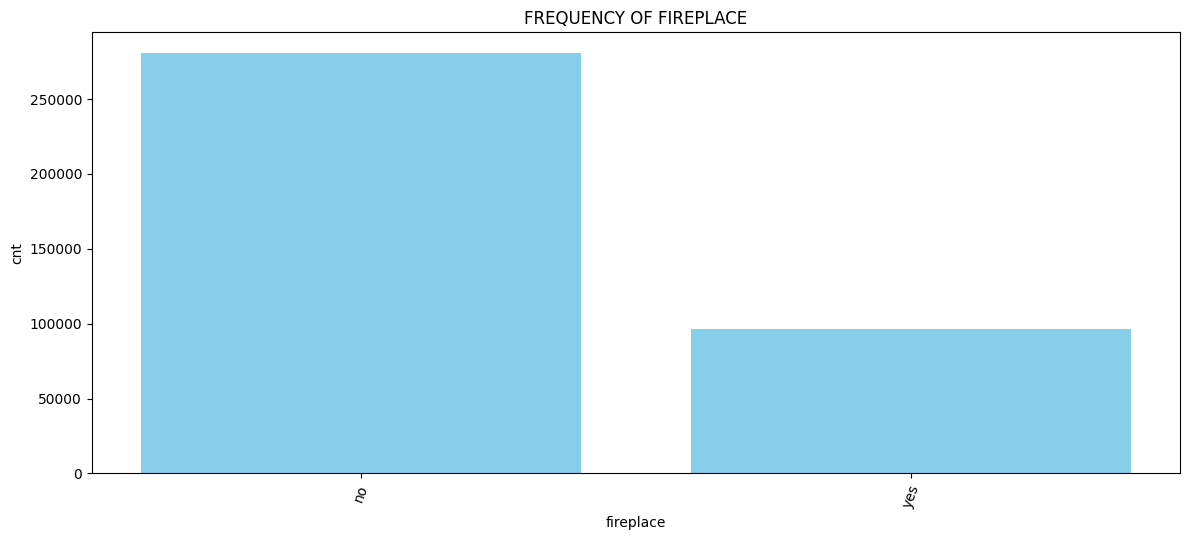

In [34]:
fireplace_cnt = original_data['availability_of_fireplace'].value_counts()

plt.figure(figsize=(12, 5.5))
plt.bar(fireplace_cnt.index,
        fireplace_cnt.values,
        color='skyblue')

plt.xlabel('fireplace',
           fontsize=10)

plt.ylabel('cnt')
plt.title('FREQUENCY OF FIREPLACE')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

In [35]:
original_data['availability_of_fireplace'].isnull().sum()[original_data['availability_of_fireplace'].isnull().sum() > 0]

array([], dtype=int64)

In [36]:
original_data['type_of_fireplace'].isnull().sum()[original_data['type_of_fireplace'].isnull().sum() > 0]

array([], dtype=int64)

- no need for further data cleaning, **unlikely to contain any outliers** - either the property has a fireplace or it doesn't
- but need to be on the lookout for the heating feature, **if heating is blank, then heating would need to be corrected to contain a heat source** > aka fireplace

In [37]:
original_data['availability_of_fireplace'] = original_data['availability_of_fireplace'].astype('string')
original_data['type_of_fireplace'] = original_data['type_of_fireplace'].astype('string')

In [38]:
original_data = original_data.drop('fireplace',
                                   axis=1)

#### **target**

In [39]:
original_data['target'].isnull().sum()[original_data['target'].isnull().sum() > 0]

array([2480])

In [40]:
original_data['target'] = original_data['target'].apply(lambda x: str(x).replace('$', '').replace(',', '').replace('+', ''))
original_data['target'] = original_data['target'].apply(lambda x: str(x).replace('/mo', ''))
original_data['target'] = original_data['target'].apply(lambda x: str(x).split('-')[0])
original_data['target'] = original_data['target'].apply(lambda x: str(x).replace('nan', '0'))

original_data['target'] = original_data['target'].astype('float64')

In [41]:
original_data['target'].isnull().sum()[original_data['target'].isnull().sum() > 0]

array([], dtype=int64)

In [42]:
original_data['target'] = original_data['target'].astype('float64')

In [43]:
original_data['target'].describe().round(0)

count       377135.0
mean        640488.0
std        1836062.0
min              0.0
25%         184900.0
50%         319900.0
75%         579000.0
max      195000000.0
Name: target, dtype: float64

need for further data cleaning, target **cannot be 0** - it would mean the property is either not for sale, thus need to check the listing status OR the record yields no informative data for prediction

#### **sq ft**

In [44]:
original_data['sqft'].isnull().sum()[original_data['sqft'].isnull().sum() > 0]

array([40550])

In [45]:
original_data['sqft'].value_counts()

sqft
0                                          11854
1,200 sqft                                   839
1,000 sqft                                   654
1,100 sqft                                   573
1,800 sqft                                   563
                                           ...  
9,914                                          1
Total interior livable area: 3,055 sqft        1
5,177                                          1
11620                                          1
Total interior livable area: 4,615 sqft        1
Name: count, Length: 25405, dtype: int64

In [46]:
original_data['sqft'] = original_data['sqft'].fillna('0')

original_data['sqft'] = original_data['sqft'].apply(lambda x: "".join(filter(str.isdigit, x)) if type(x) == str else x)
original_data['sqft'] = pd.to_numeric(original_data['sqft'],
                                      errors='coerce')

original_data['sqft'] = original_data['sqft'].apply(lambda x: str(x).replace('-- sqft', '0').replace('--', '0'))

original_data['sqft'] = original_data['sqft'].astype('float64')

original_data['sqft'] = original_data['sqft'].fillna(0)

In [47]:
original_data['sqft'].isnull().sum()[original_data['sqft'].isnull().sum() > 0]

array([], dtype=int64)

need for data cleaning, **highly likely to contain outliers**, and sqft **cannot be 0** would need to be consolidated by average based on the lotsize or property type

#### **multiple listings**

- look for points of association: if one feature is missing, but the other isn't, take the element based on the latter, and vice versa
- both features correspond to the same thing, thus either can be filled in, investigate and take the data where available

In [48]:
print(original_data['mls-id'].isnull().sum()[original_data['mls-id'].isnull().sum() > 0])
print(original_data['MlsId'].isnull().sum()[original_data['MlsId'].isnull().sum() > 0])

[352193]
[66869]


In [49]:
original_data['mls-id'] = original_data['mls-id'].fillna(0)
original_data['MlsId'] = original_data['MlsId'].fillna(0)

In [50]:
def consolidate_the_listings(table: pd.DataFrame):
  
  '''
    > populate the multiple listings feature based on the availability of data in either of the two columns
  '''
  
  if (table['mls-id'] != 0) and (table['MlsId']  == 0):
    return table['mls-id']
  elif (table['mls-id']  == 0) and (table['MlsId'] != 0):
    return table['MlsId']
  else:
    return None

original_data['combined_listings'] = original_data.apply(consolidate_the_listings,
                                                         axis=1)

In [51]:
original_data['combined_listings'] = original_data['combined_listings'].fillna(0)

In [52]:
original_data['combined_listings'].isnull().sum()[original_data['combined_listings'].isnull().sum() > 0]

array([], dtype=int64)

In [53]:
original_data = original_data.drop(['mls-id', 'MlsId'],
                                   axis=1)

supposedly multiple listing id is 9 digits long

In [54]:
original_data['combined_listings'].unique()

array(['611019', '201916904', 'FR19221027', ..., '2152007', '219049831',
       '10374233'], dtype=object)

In [55]:
original_data['combined_listings'].value_counts()

combined_listings
0                        41927
NO MLS                      25
No MLS #                    16
 A, Houston, TX 77008       13
No                          12
                         ...  
1292140                      1
10454617                     1
5344521                      1
4151322                      1
10374233                     1
Name: count, Length: 249013, dtype: int64

In [56]:
original_data['combined_listings'] = original_data['combined_listings'].apply(lambda x: str(x).lower())

original_data['combined_listings'] = original_data['combined_listings'].apply(lambda x: 0 if len(x) != 9 else x)

In [57]:
original_data['multiple_listings'] = original_data['combined_listings'].apply(lambda x: 'yes' if (str(x).isdigit() and x != 0) else 'no')

In [58]:
original_data['multiple_listings'].value_counts()

multiple_listings
no     357226
yes     19909
Name: count, dtype: int64

multiple listing ID by itself contains no informative predictive data

In [59]:
original_data = original_data.drop('combined_listings',
                                   axis=1)

In [60]:
original_data['multiple_listings'] = original_data['multiple_listings'].astype('string')

In [61]:
original_data['multiple_listings'].isnull().sum()[original_data['multiple_listings'].isnull().sum() > 0]

array([], dtype=int64)

no need for further data cleaning, **unlikely to contain any outliers** - either the property has been listed multiple types or it hasn't

#### **beds**

In [62]:
original_data['beds'].isnull().sum()[original_data['beds'].isnull().sum() > 0]

array([91254])

In [63]:
original_data['beds'].unique()

array(['4', '3 Beds', '5 Beds', ..., '9,565 sqft', '1.74 acres',
       '8,479 sqft'], dtype=object)

In [64]:
original_data['beds'] = original_data['beds'].fillna('0')

original_data['beds'] = original_data['beds'].apply(lambda x: str(x).lower())

In [65]:
def condition_for_beds(table: pd.DataFrame):

  '''
    > look through elements and return whether the element is likely to contain the relevant value for number of bedrooms
  '''
  
  def is_float_regex(t: str):
    '''
      > identify whether the string contains a float value
    '''
    return re.fullmatch(r"[-+]?\d*\.?\d+", t) is not None

  text = str(table['beds'])
  tr_text = text.replace(' ', '')

  #if all characters within a string are digits
  if text.isdigit():
    result = 'yes'

  elif is_float_regex(text):
    result = 'yes'

  else:
    #should contain text (only)
    if tr_text.isalpha():
      result = 'no'
    #text and numerical
    elif tr_text.isalpha() == False:
      #contains uninformative elements
      if any(element in text for element in ['acre', 'sqft']):
        result = 'no'
      #contains informative, but must have a number
      elif (any(element in text for element in ['bed', 'bedroom', 'bd'])) and (any(char.isdigit() for char in text)):
        result = 'yes'
      else:
        result = 'no'

  return result

original_data['bed_condition'] = original_data.apply(condition_for_beds,
                                                     axis=1)

In [66]:
original_data['bed_condition'].value_counts()

bed_condition
yes    356574
no      20561
Name: count, dtype: int64

In [67]:
original_data = original_data[original_data['bed_condition'] == 'yes']

In [68]:
original_data['beds'] = original_data['beds'].apply(lambda x: str(x).replace(' bd', '').replace(' beds', ''))

In [69]:
def make_corrections_on_beds(table: pd.DataFrame):
  
  '''
    > clean the beds feature to return the number of bedrooms
  '''
  
  text = str(table['beds'])

  def is_float_regex(t: str):
    return re.fullmatch(r"[-+]?\d*\.?\d+", t) is not None

  if is_float_regex(text):
    result = text
  elif any(element in text for element in ['bed', 'bedroom']):
    firstly = text.split(',')
    for b in firstly:
      if any(element in b for element in ['bed', 'bedroom']):
        if any(element in b for element in ['st', 'nd', 'rd', 'th']):
          result = '1'
        else:
          secondly = "".join(filter(str.isdigit, b))
          result = secondly
  else:
    result = '0'

  return result

original_data['number_of_bedrooms'] = original_data.apply(make_corrections_on_beds,
                                                          axis=1)

In [70]:
original_data = original_data.drop(['beds', 'bed_condition'],
                                   axis=1)

In [71]:
original_data['number_of_bedrooms'].unique()

array(['4', '3', '5', '0', '2', '8', '2.0', '1', '3.0', '6', '12', '14',
       '7', '5.0', '4.0', '9', '7.0', '16', '1.0', '6.0', '13', '10',
       '18', '20', '0.0', '32', '11', '26', '64', '144', '22', '24', '15',
       '10.0', '8.0', '28', '36', '19', '48', '25', '17', '27', '40',
       '47', '23', '44', '12.0', '30.0', '33', '9.0', '14.0', '13.0',
       '31', '16.0', '34', '30', '99', '78', '11.0', '53', '27.0', '51',
       '21', '75', '29', '15.0', '39', '42', '52', '46', '76', '35', '88'],
      dtype=object)

A property can be described as having "zero bedrooms," often referred to as a "zero bedroom unit" or a "studio apartment". These units typically consist of a single room that combines the living, dining, and sleeping areas, along with a separate kitchen and bathroom. The term "null bedroom" is also used to describe this type of space, emphasizing its open floor plan and flexibility.

In [72]:
original_data['number_of_bedrooms'] = original_data['number_of_bedrooms'].astype('float16')

In [73]:
original_data['number_of_bedrooms'].isnull().sum()[original_data['number_of_bedrooms'].isnull().sum() > 0]

array([], dtype=int64)

need for further data cleaning, **likely to contain outliers** and **null bedrooms need to corrected** in case the property type is not a studio apartment or equivalent

#### **baths**

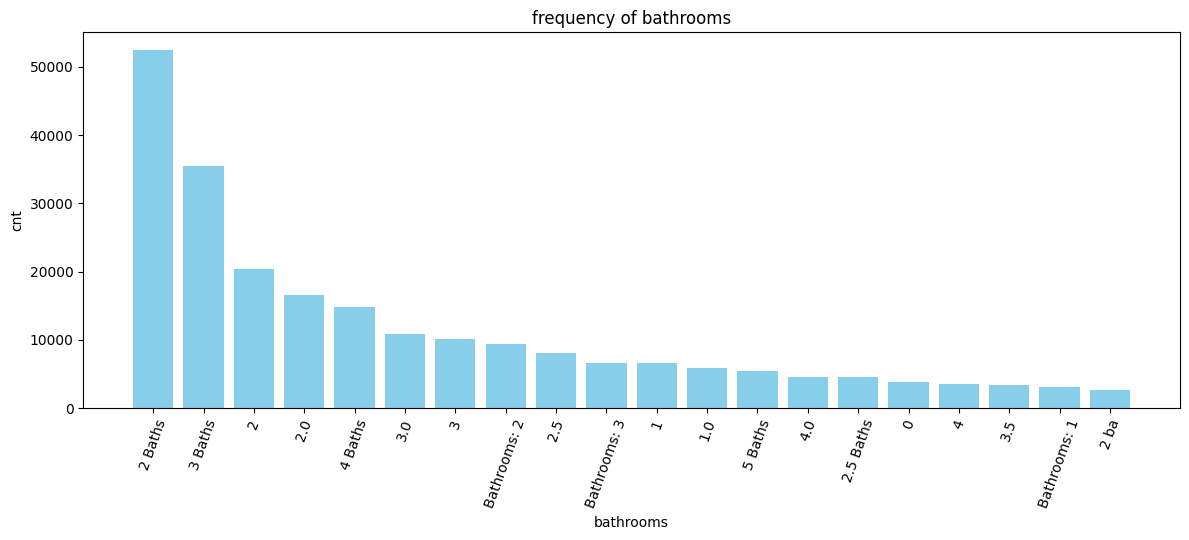

In [74]:
bath_cnt = original_data['baths'].value_counts().nlargest(20)

plt.figure(figsize=(12, 5.5))
plt.bar(bath_cnt.index,
        bath_cnt.values,
        color='skyblue')

plt.xlabel('bathrooms',
           fontsize=10)

plt.ylabel('cnt')
plt.title('frequency of bathrooms')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

In [75]:
original_data['baths'] = original_data['baths'].apply(lambda x: str(x).lower())

original_data['baths'] = original_data['baths'].apply(lambda x: str(x).replace('+', '').replace(',', '.').replace('baths', '').replace('bathrooms', '').replace('semimod', '1').replace('ba', '')\
                                                      .replace('sq.ft.', '1').replace(':', '').replace('—', '0').replace('--', '').replace('~', '').replace('sq.', '').replace('ft.', ''))

original_data['baths'] = original_data['baths'].apply(lambda x: x.split('/')[0])
original_data['baths'] = original_data['baths'].apply(lambda x: str(x).split('-')[0])
original_data['baths'] = original_data['baths'].apply(lambda x: str(x).replace('nan', ''))
original_data['baths'] = original_data['baths'].apply(lambda x: str(x).replace(' ', ''))
original_data['baths'] = original_data['baths'].apply(lambda x: '0' if x == '' else x)

In [76]:
original_data['baths'] = original_data['baths'].astype('float16')

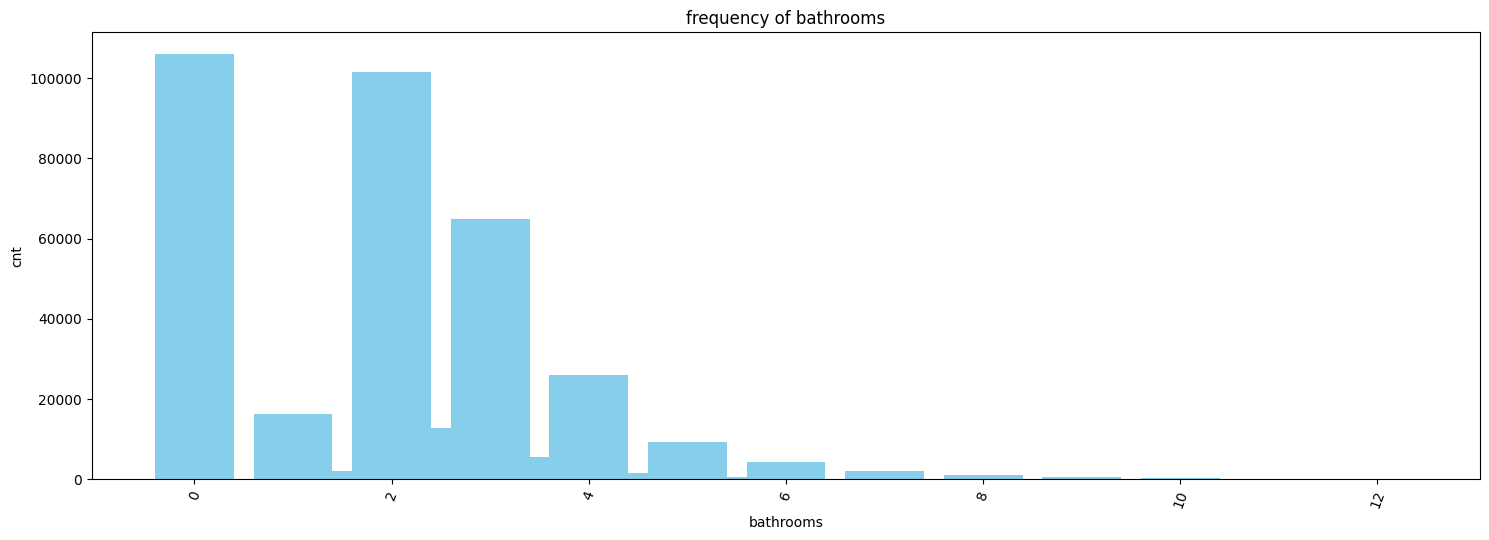

In [77]:
bath_cnt = original_data['baths'].value_counts().nlargest(20)

plt.figure(figsize=(15, 5.5))
plt.bar(bath_cnt.index,
        bath_cnt.values,
        color='skyblue')

plt.xlabel('bathrooms',
           fontsize=10)

plt.ylabel('cnt')
plt.title('frequency of bathrooms')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

In [78]:
original_data['baths'].describe()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/nanops.py:1019: RuntimeWarning: invalid value encountered in scalar divide
  result = sqr.sum(

count    356574.0
mean          NaN
std           NaN
min           0.0
25%           0.0
50%           2.0
75%           3.0
max         750.0
Name: baths, dtype: float64

more than possible to have half-bath, quarter bath and three-quarter batj, and full bath

In [79]:
def group_the_baths(table: pd.DataFrame):

  '''
    > group the bathrooms into four known categories: whole, one_quarter, half, and three_quarter equivalent

    Parameters:
        table (DataFrame)

    Output:
        column (float, Series): returns the consolidated values for the bathroom feature
    '''

  one_quarter, half, three_quarters = 0.25, 0.5, 0.75
  whole_value, floored_value = table['baths'], math.floor(table['baths'])

  #return of whole value
  if whole_value < (floored_value + one_quarter):
    result = floored_value

  #return of whole + one_quarter
  elif (whole_value >= (floored_value + one_quarter)) and (whole_value < (floored_value + half)):
    result = (floored_value + one_quarter)

  #return of whole + half
  elif (whole_value >= (floored_value + half)) and (whole_value < (floored_value + three_quarters)):
    result = (floored_value + half)

  #return of whole + three_quarter
  elif whole_value >= (floored_value + three_quarters):
    result = (floored_value + three_quarters)

  #all other possibilities, but rounded down
  else:
    result = round(whole_value, 2)

  return result

original_data['bathroom'] = original_data.apply(group_the_baths,
                                                axis=1)

In [80]:
original_data = original_data.drop('baths',
                                   axis=1)

In [81]:
original_data['bathroom'].isnull().sum()[original_data['bathroom'].isnull().sum() > 0]

array([], dtype=int64)

While there are no hard and fast rules on the number of bathrooms in a house, the average home will have at least two bathrooms for every three bedrooms. \
Yes, it's common, especially in higher-end homes, to have more bathrooms than bedrooms. This trend is driven by factors like the desire for privacy, more spacious bathrooms, and accommodating guests. Some luxury homes even feature "his and hers" bathrooms or multiple bathrooms for a single master suite.

In [82]:
def find_the_bathroom_ratio(table: pd.DataFrame):
    if table['bathroom'] == 0:
        return 0
    else:
        return round(table['number_of_bedrooms'] / table['bathroom'], 2)

original_data['baths_ratio'] = original_data.apply(find_the_bathroom_ratio,
                                                   axis=1)

cut down on the ratio between the number of bedrooms to the number of bathrooms in the property being illogical

In [83]:
def bathroom_outliers(table: pd.DataFrame):
    #too many bedrooms to very few bathrooms
    if table['baths_ratio'] > 10:
        return True
    #too few bedrooms to too many bathrooms
    elif (table['baths_ratio'] < 0.4) & (table['baths_ratio'] != 0):
        return True
    else:
        return False

original_data['baths_ratio_condition'] = original_data.apply(bathroom_outliers,
                                                             axis=1)

In [84]:
original_data = original_data[original_data['baths_ratio_condition'] == False]

In [85]:
original_data = original_data.drop(['baths_ratio', 'baths_ratio_condition'],
                                   axis=1)

In [86]:
original_data['bathroom'].isnull().sum()[original_data['bathroom'].isnull().sum() > 0]

array([], dtype=int64)

#### **property type**

In [87]:
original_data['propertyType'].isnull().sum()[original_data['propertyType'].isnull().sum() > 0]

array([25478])

In [88]:
original_data['propertyType'] = original_data['propertyType'].apply(lambda x: str(x).lower())

In [89]:
original_data['propertyType'] = original_data['propertyType'].fillna('private_listing')

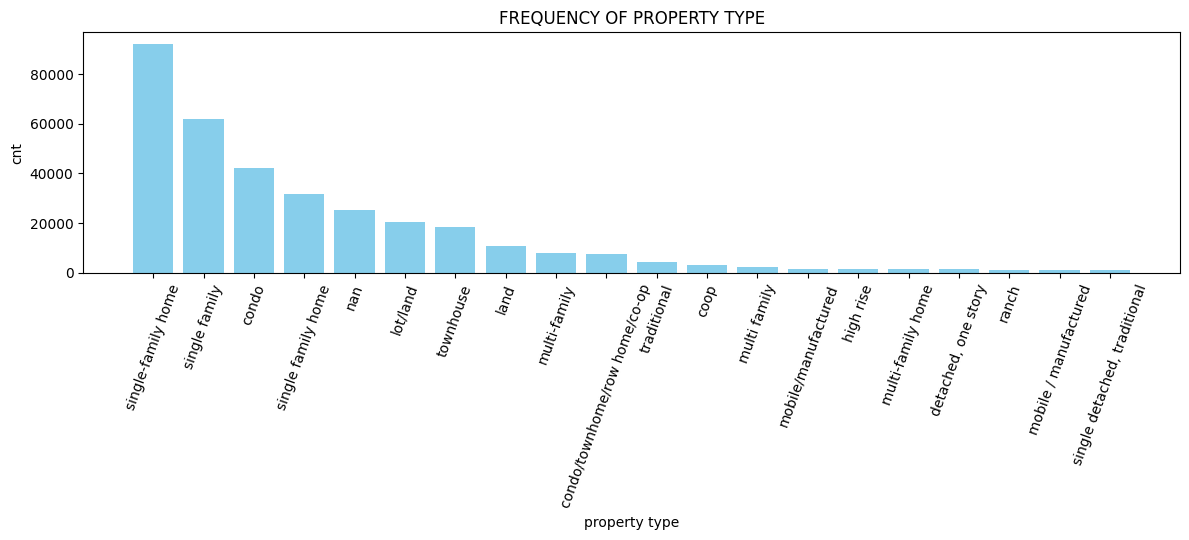

In [90]:
prprty_cnt = original_data['propertyType'].value_counts().nlargest(20)

plt.figure(figsize=(12, 5.5))
plt.bar(prprty_cnt.index,
        prprty_cnt.values,
        color='skyblue')

plt.xlabel('property type',
           fontsize=10)

plt.ylabel('cnt')
plt.title('FREQUENCY OF PROPERTY TYPE')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

In [91]:
original_data['propertyType'].value_counts()

propertyType
single-family home                                             92159
single family                                                  62022
condo                                                          42388
single family home                                             31727
nan                                                            25478
                                                               ...  
1 story with basement, cape cod                                    1
1 story, contemporary, other (see remarks)                         1
single detached, early american, traditional, tudor                1
condo/townhome, single detached                                    1
bilevel, converted dwelling, loft with bedrooms, condo/unit        1
Name: count, Length: 1036, dtype: int64

In [92]:
original_data = original_data.reset_index()

indices = original_data[original_data['propertyType'] == ''].index.to_list()
original_data.loc[indices, 'propertyType'] = 'private_listing'

In [93]:
original_data[original_data['propertyType'] == '']

,index,propertyType,street,homeFacts,city,schools,sqft,zipcode,state,stories,target,listing_status,private_pool,type_of_fireplace,availability_of_fireplace,multiple_listings,number_of_bedrooms,bathroom


- when investigating the elements in propertyType I found it difficult to separate certain elements and group them based on the guideline given by the test task, many property types would actually overlap
- thus investigated further and found out that certain property types can be part of specific groups and decided to create two new features: property group and property type based on [this guideline](https://www.basicknowledge101.com/pdf/housing/house%20types%20List.pdf)

In [94]:
def group_and_sort_the_property_type(table: pd.DataFrame):
    
    '''
        > identify elements in propertyType and sort them into relevant property groups and property types
    '''
    
    if any(element in str(table['propertyType']) for element in ['single detached', 'single family', 'single-family', 'singlefamily']):
        result = 'detached single-unit housing, single family'

    elif any(element in str(table['propertyType']) for element in ['georgian', 'german', 'new england', 'spanish', 'french']):
        result = 'detached single-unit housing, american colonial'

    elif any(element in str(table['propertyType']) for element in ['foursquare']):
        result = 'detached single-unit housing, american foursquare'

    elif any(element in str(table['propertyType']) for element in ['barndominium']):
        result = 'detached single-unit housing, barndominium'

    elif any(element in str(table['propertyType']) for element in ['bungalow']):
        result = 'detached single-unit housing, bungalow'

    elif any(element in str(table['propertyType']) for element in ['craftsman']):
        result = 'detached single-unit housing, american craftsman'

    elif any(element in str(table['propertyType']) for element in ['cape cod']):
        result = 'detached single-unit housing, cape cod'

    elif any(element in str(table['propertyType']) for element in ['chalet']):
        result = 'detached single-unit housing, chalet'

    elif any(element in str(table['propertyType']) for element in ['cottage']):
        result = 'detached single-unit housing, cottage'

    elif any(element in str(table['propertyType']) for element in ['farmhouse', 'farm house']):
        result = 'detached single-unit housing, farmhouse'

    elif any(element in str(table['propertyType']) for element in ['federal']):
        result = 'detached single-unit housing, federal'

    elif any(element in str(table['propertyType']) for element in ['gambrel']):
        result = 'detached single-unit housing, gambrel'

    elif any(element in str(table['propertyType']) for element in ['hall']):
        result = 'detached single-unit housing, hall'

    elif any(element in str(table['propertyType']) for element in ['link detached']):
        result = 'detached single-unit housing, linked'

    elif any(element in str(table['propertyType']) for element in ['log', 'rustic']):
        result = 'detached single-unit housing, log'

    elif any(element in str(table['propertyType']) for element in ['manor']):
        result = 'detached single-unit housing, manor'

    elif any(element in str(table['propertyType']) for element in ['mansion']):
        result = 'detached single-unit housing, mansion'

    elif any(element in str(table['propertyType']) for element in ['manufactured', 'warehouse', 'garage', 'industrial']):
        result = 'detached single-unit housing, manufactured'

    elif any(element in str(table['propertyType']) for element in ['patio']):
        result = 'detached single-unit housing, patio'

    elif any(element in str(table['propertyType']) for element in ['prefab']):
        result = 'detached single-unit housing, prefabricated'

    elif any(element in str(table['propertyType']) for element in ['ranch']):
        result = 'detached single-unit housing, ranch'

    elif any(element in str(table['propertyType']) for element in ['saltbox']):
        result = 'detached single-unit housing, saltbox'

    elif any(element in str(table['propertyType']) for element in ['split']):
        result = 'detached single-unit housing, split-level'

    elif any(element in str(table['propertyType']) for element in ['stilt']):
        result = 'detached single-unit housing, stilt'

    elif any(element in str(table['propertyType']) for element in ['tudor']):
        result = 'detached single-unit housing, tudor'

    elif any(element in str(table['propertyType']) for element in ['tuscan']):
        result = 'detached single-unit housing, tuscan'

    elif any(element in str(table['propertyType']) for element in ['victorian']):
        result = 'detached single-unit housing, victorian'

    elif any(element in str(table['propertyType']) for element in ['villa']):
        result = 'detached single-unit housing, villa'

    elif any(element in str(table['propertyType']) for element in ['beach', 'moorage', 'key west', 'resort', 'coastal']):
        result = 'detached single-unit housing, beach'

    elif any(element in str(table['propertyType']) for element in ['frame']):
        result = 'detached single-unit housing, a-frame'



    elif any(element in str(table['propertyType']) for element in ['council']):
        result = 'semi-detached dwellings, council'

    elif any(element in str(table['propertyType']) for element in ['duplex']):
        result = 'semi-detached dwellings, duplex'

    elif any(element in str(table['propertyType']) for element in ['two family', 'two-family']):
        result = 'semi-detached dwellings, two-family'

    elif any(element in str(table['propertyType']) for element in ['two decker', 'two-decker']):
        result = 'semi-detached dwellings, two-decker'

    elif any(element in str(table['propertyType']) for element in ['semi-detached', 'semi detached']):
        result = 'semi-detached dwellings, semi-detached'



    elif any(element in str(table['propertyType']) for element in ['byre']):
        result = 'attached single-unit housing, byre-dwelling'

    elif any(element in str(table['propertyType']) for element in ['connected farm']):
        result = 'attached single-unit housing, connected farm'

    elif any(element in str(table['propertyType']) for element in ['housebarn']):
        result = 'attached single-unit housing, housebarn'

    elif any(element in str(table['propertyType']) for element in ['longhouse']):
        result = 'attached single-unit housing, longhouse'



    elif any(element in str(table['propertyType']) for element in ['apartment', 'flat', 'deck access', 'loft']):
        result = 'attached multi-unit housing, apartment'

    elif any(element in str(table['propertyType']) for element in ['brownstone']):
        result = 'attached multi-unit housing, brownstone'

    elif any(element in str(table['propertyType']) for element in ['cluster']):
        result = 'attached multi-unit housing, cluster'

    elif any(element in str(table['propertyType']) for element in ['condo']):
        result = 'attached multi-unit housing, condominium'

    elif any(element in str(table['propertyType']) for element in ['garden', 'lake']):
        result = 'attached multi-unit housing, garden'

    elif any(element in str(table['propertyType']) for element in ['coop', 'co-op']):
        result = 'attached multi-unit housing, housing cooperative'

    elif any(element in str(table['propertyType']) for element in ['penthouse', 'airlite', 'studio']):
        result = 'attached multi-unit housing, penthouse'

    elif any(element in str(table['propertyType']) for element in ['townhouse', 'townhome', 'custom']):
        result = 'attached multi-unit housing, townhouse'

    elif any(element in str(table['propertyType']) for element in ['multi-family', 'multi family']):
        result = 'attached multi-unit housing, multifamily'

    elif any(element in str(table['propertyType']) for element in ['high rise', 'high-rise', 'hi-rise', 'mid-rise', 'mid rise', 'mid-level']):
        result = 'attached multi-unit housing, tower block'



    elif any(element in str(table['propertyType']) for element in ['park', 'mobile', 'modular', 'caravan',
                                                                   'travel', 'coach', 'carriage', 'houseboat']):
        result = 'movable dwellings, mobile'

    elif any(element in str(table['propertyType']) for element in ['tent']):
        result = 'movable dwellings, tent'

    elif any(element in str(table['propertyType']) for element in ['yurt']):
        result = 'movable dwellings, yurt'

    else:
        result = 'unknown group, unknown type'

    return result

original_data['grouping_ptype'] = original_data.apply(group_and_sort_the_property_type,
                                                      axis=1)

In [95]:
original_data['grouping_ptype'] = original_data['grouping_ptype'].astype('string')

original_data['ptype_groups'] = original_data['grouping_ptype'].str.split(', ')
original_data['property_group'] = original_data['ptype_groups'].str[0]
original_data['property_type'] = original_data['ptype_groups'].str[-1]

In [96]:
original_data['property_group'].unique()

array(['detached single-unit housing', 'unknown group',
       'attached multi-unit housing', 'movable dwellings',
       'semi-detached dwellings'], dtype=object)

In [97]:
original_data['property_type'].unique()

array(['single family', 'unknown type', 'townhouse',
       'housing cooperative', 'multifamily', 'condominium', 'tower block',
       'manufactured', 'american craftsman', 'federal', 'apartment',
       'cape cod', 'mobile', 'bungalow', 'american colonial', 'ranch',
       'garden', 'a-frame', 'split-level', 'farmhouse', 'cluster',
       'tudor', 'cottage', 'hall', 'penthouse', 'beach', 'duplex',
       'victorian', 'tuscan', 'stilt', 'patio', 'saltbox', 'chalet',
       'gambrel', 'yurt', 'log', 'villa'], dtype=object)

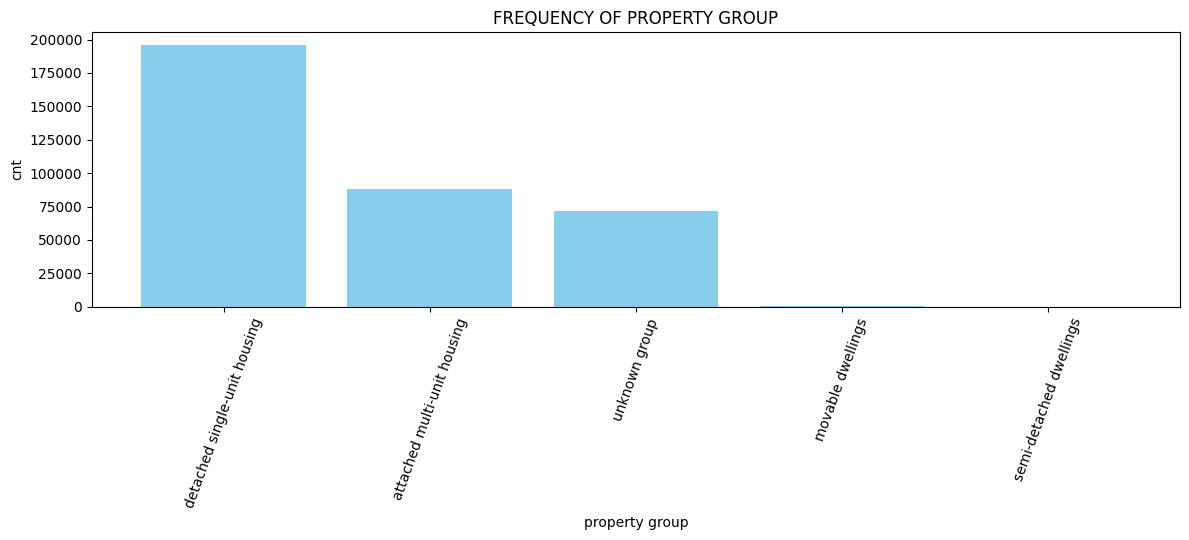

In [98]:
prprty_group_cnt = original_data['property_group'].value_counts()

plt.figure(figsize=(12, 5.5))
plt.bar(prprty_group_cnt.index,
        prprty_group_cnt.values,
        color='skyblue')

plt.xlabel('property group',
           fontsize=10)

plt.ylabel('cnt')
plt.title('FREQUENCY OF PROPERTY GROUP')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

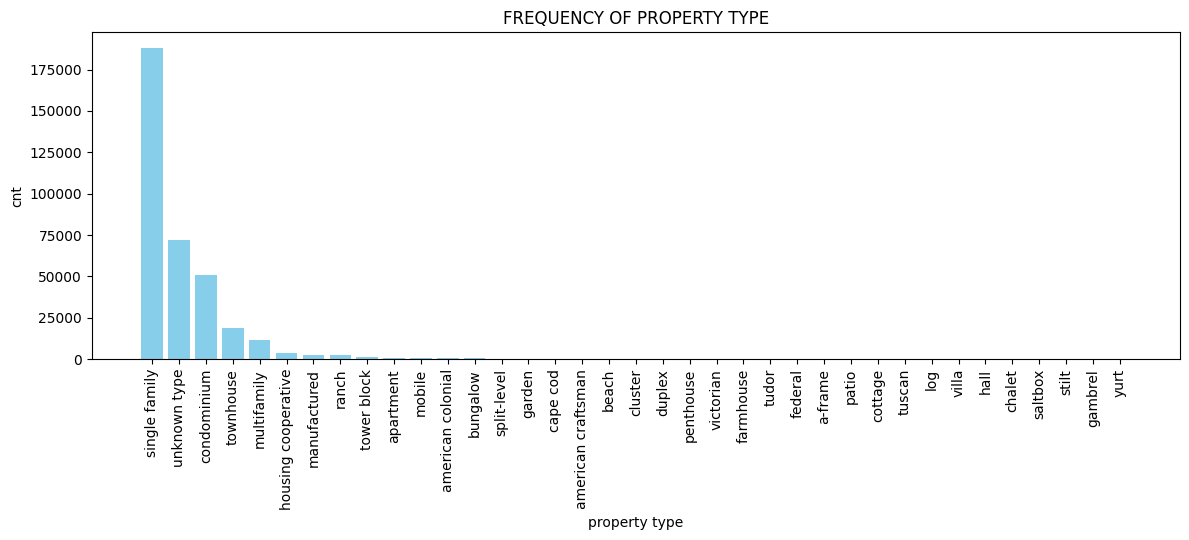

In [99]:
prprty_type_cnt = original_data['property_type'].value_counts()

plt.figure(figsize=(12, 5.5))
plt.bar(prprty_type_cnt.index,
        prprty_type_cnt.values,
        color='skyblue')

plt.xlabel('property type',
           fontsize=10)

plt.ylabel('cnt')
plt.title('FREQUENCY OF PROPERTY TYPE')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

according to the test task *apartments* cannot be sold

In [100]:
original_data['selling'] = original_data['property_type'].apply(lambda x: 'not for sale' if x == 'apartment' else 'for sale')

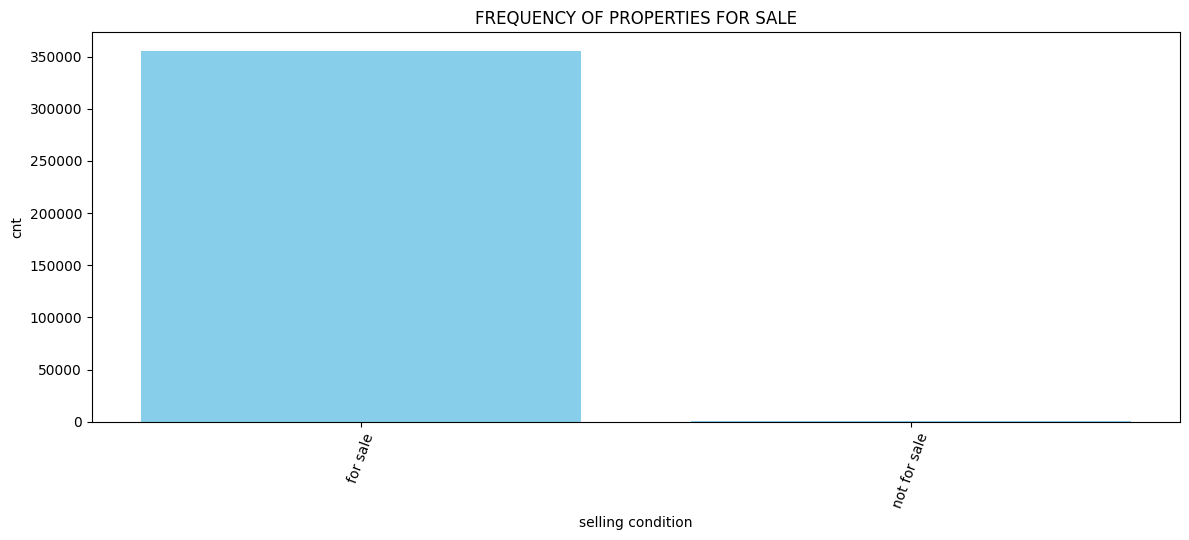

In [101]:
sell_cnt = original_data['selling'].value_counts()

plt.figure(figsize=(12, 5.5))
plt.bar(sell_cnt.index,
        sell_cnt.values,
        color='skyblue')

plt.xlabel('selling condition',
           fontsize=10)

plt.ylabel('cnt')
plt.title('FREQUENCY OF PROPERTIES FOR SALE')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

In [102]:
original_data['property_group'].isnull().sum()[original_data['property_group'].isnull().sum() > 0]

array([], dtype=int64)

In [103]:
original_data['property_type'].isnull().sum()[original_data['property_type'].isnull().sum() > 0]

array([], dtype=int64)

In [104]:
original_data['selling'].isnull().sum()[original_data['selling'].isnull().sum() > 0]

array([], dtype=int64)

In [105]:
original_data['property_group'] = original_data['property_group'].astype('string')
original_data['property_type'] = original_data['property_type'].astype('string')
original_data['selling'] = original_data['selling'].astype('string')

In [106]:
original_data = original_data.drop(['index', 'propertyType', 'grouping_ptype', 'ptype_groups'],
                                   axis=1)

- no need for further data cleaning, **unlikely to contain any outliers** - all records sorted into property groups and property types
- but need to consider **whether unknown type is worth keeping**

#### **home facts --> reconstruction and remodeling years, heating, cooling, parking, lotsize, price/sqft**

In [107]:
original_data['homeFacts'].isnull().sum()[original_data['homeFacts'].isnull().sum() > 0]

array([], dtype=int64)

In [108]:
def unpack_home_facts(table: pd.DataFrame):
  
  '''
    > extract elements from a string that acts as a dict
  '''
  
  list_of_dicts = str(table['homeFacts'])

  my_dict = ast.literal_eval(list_of_dicts)
  factValue, factLabel = [], []

  for v in range(len(my_dict['atAGlanceFacts'])):
    factValue.append(my_dict['atAGlanceFacts'][v]['factValue'])
    factLabel.append(my_dict['atAGlanceFacts'][v]['factLabel'])

  return factValue

original_data['hf_all'] = original_data.apply(unpack_home_facts,
                                              axis=1)

In [109]:
original_data['b_year'] = original_data['hf_all'].str[0] #built_year
original_data['r_year'] = original_data['hf_all'].str[1] #remodeled_year
original_data['heat'] = original_data['hf_all'].str[2] #heating
original_data['cool'] = original_data['hf_all'].str[3] #cooling
original_data['park'] = original_data['hf_all'].str[4] #parking
original_data['lot'] = original_data['hf_all'].str[5] #lotsize
original_data['price/sqft'] = original_data['hf_all'].str[6] #price_per_sqft

In [110]:
original_data = original_data.drop(['homeFacts', 'hf_all'],
                                   axis=1)

##### **built_year**

In [111]:
original_data['b_year'].isnull().sum()[original_data['b_year'].isnull().sum() > 0]

array([526])

In [112]:
original_data = original_data.reset_index()

In [113]:
indices = original_data[original_data['b_year'] == ''].index.to_list()
original_data.loc[indices, 'b_year'] = 0

In [114]:
original_data[original_data['b_year'] == '']

,index,street,city,schools,sqft,zipcode,state,stories,target,listing_status,...,property_group,property_type,selling,b_year,r_year,heat,cool,park,lot,price/sqft


In [115]:
original_data['b_year'] = original_data['b_year'].fillna(0)

In [116]:
def find_uninformative_built_year(table: pd.DataFrame):
    
    '''
        > look for error input if the string is not 4 characters long, it's not a reasonable construction year value
    '''
    
    if len(str(table['b_year'])) != 4:
        result = '0'
    elif str(table['b_year']) == 'No Data':
        result = '0'
    elif str(table['b_year']) == '':
        result = '0'
    else:
        result = str(table['b_year'])
    return result

original_data['built_year'] = original_data.apply(find_uninformative_built_year,
                                                  axis=1)

In [117]:
original_data['built_year'] = original_data['built_year'].astype('int16')

In [118]:
original_data['built_year'].isnull().sum()[original_data['built_year'].isnull().sum() > 0]

array([], dtype=int64)

In [119]:
original_data = original_data.drop('index',
                                   axis=1)

##### **remodeled year**

In [120]:
original_data['r_year'].isnull().sum()[original_data['r_year'].isnull().sum() > 0]

array([23338])

In [121]:
original_data = original_data.reset_index()

In [122]:
indices = original_data[original_data['r_year'] == ''].index.to_list()
original_data.loc[indices, 'r_year'] = 0

In [123]:
original_data[original_data['r_year'] == '']

,index,street,city,schools,sqft,zipcode,state,stories,target,listing_status,...,property_type,selling,b_year,r_year,heat,cool,park,lot,price/sqft,built_year


In [124]:
original_data['r_year'] = original_data['r_year'].fillna(0)

In [125]:
def find_uninformative_remodeled_year(table: pd.DataFrame):
    
    '''
        > look for error input if the string is not 4 characters long, it's not a reasonable remodeling year value
    '''
    
    if len(str(table['r_year'])) != 4:
        result = '0'
    elif str(table['r_year']) == 'No Data':
        result = '0'
    elif str(table['r_year']) == '':
        result = '0'
    else:
        result = str(table['r_year'])
    return result

original_data['rem_year'] = original_data.apply(find_uninformative_remodeled_year,
                                                axis=1)

In [126]:
original_data['rem_year'] = original_data['rem_year'].astype('int16')

In [127]:
original_data['rem_year'].isnull().sum()[original_data['rem_year'].isnull().sum() > 0]

array([], dtype=int64)

In [128]:
original_data = original_data.drop('index',
                                   axis=1)

##### years swap

- write a function to swap places between built year and remodeled year if built year > remodeled year when remodeled year is not blank meaning that somehow built is in the future and remodeled in the past which is illogical
- made the assumption that there could have been a possibility of an incorrect data input

In [129]:
def switch_built_year(table: pd.DataFrame):
    if (table['built_year'] > table['rem_year']) and (table['rem_year'] != 0):
        return table['rem_year']
    else:
        return table['built_year']

original_data['year_of_construction'] = original_data.apply(switch_built_year,
                                                            axis=1)


def switch_remodeled_year(table: pd.DataFrame):
    if (table['built_year'] > table['rem_year']) and (table['rem_year'] != 0):
        return table['built_year']
    else:
        return table['rem_year']

original_data['year_of_remodeling'] = original_data.apply(switch_remodeled_year,
                                                          axis=1)

In [130]:
original_data[(original_data['year_of_construction'] > original_data['year_of_remodeling']) & (original_data['year_of_remodeling'] != 0)]

,street,city,schools,sqft,zipcode,state,stories,target,listing_status,private_pool,...,r_year,heat,cool,park,lot,price/sqft,built_year,rem_year,year_of_construction,year_of_remodeling


In [131]:
original_data['year_of_construction'] = original_data['year_of_construction'].astype('int16')
original_data['year_of_remodeling'] = original_data['year_of_remodeling'].astype('int16')

need for further data cleaning, as **construction / remodeling likely to contain outliers** - and **construction year cannot be 0** so need to be consolidated by property type

In [132]:
original_data = original_data.drop(['b_year', 'r_year', 'built_year', 'rem_year'],
                                   axis=1)

##### **heating**

In [133]:
original_data['heat'].isnull().sum()[original_data['heat'].isnull().sum() > 0]

array([498])

In [134]:
original_data = original_data.reset_index()

indices = original_data[original_data['heat'] == ''].index.to_list()
original_data.loc[indices, 'heat'] = 'no heating'

In [135]:
original_data[original_data['heat'] == '']

,index,street,city,schools,sqft,zipcode,state,stories,target,listing_status,...,property_group,property_type,selling,heat,cool,park,lot,price/sqft,year_of_construction,year_of_remodeling


In [136]:
original_data['heat'] = original_data['heat'].fillna('no heating')

In [137]:
original_data['heat'] = original_data['heat'].apply(lambda x: str(x).lower())

In [138]:
original_data['heat'].unique()

array(['central a/c, heat pump', 'no heating', 'forced air', ...,
       'electric furnace, electric heat pump',
       'floor furnace, wall electric, wall gas',
       'baseboard, hot water, programmable thermostat, radiant floor'],
      dtype=object)

- investigated what type of heating options are available and sorted the elements accordingly
- while the function isn't perfect, it's good enough, honestly: there can be an overlap between elements, or some elements won't be included, but to achieve perfection, you'd have to iterate through each element in the string to count every instance, and it would be too time consuming at this testing level

In [139]:
def group_and_sort_heating_elements(table: pd.DataFrame):

  if any(element in str(table['heat']) for element in ['no heat', 'no data', 'none']):
    result = 'no heating, no heating'


  elif any(element in str(table['heat']) for element in ['air', 'forced', 'geothem', 'mini', 'pump', 'filt']):
    result = 'heating, heat pump'


  elif any(element in str(table['heat']) for element in ['baseboard']):
    result = 'heating, baseboard'


  elif any(element in str(table['heat']) for element in ['centr', 'oile', 'basem']):
    result = 'heating, boiler'


  elif any(element in str(table['heat']) for element in ['blow']):
    result = 'heating, blower'


  elif any(element in str(table['heat']) for element in ['closet', 'heater', 'water', 'hot', 'tank', 'steam']):
    result = 'heating, boiler'


  elif any(element in str(table['heat']) for element in ['floor', 'radia', 'roof']):
    result = 'heating, radiant'


  elif any(element in str(table['heat']) for element in ['fireplace', 'roof', 'fuel', 'furn', 'bsmt', 'stove']):
    result = 'heating, furnace'


  elif any(element in str(table['heat']) for element in ['hvac', 'inc', 'zone', 'source', 'system', 'thermo', 'thmstat', 'unit', 'utility', 'yes']):
    result = 'heating, unknown type'

  elif any(char.isdigit() for char in str(table['heat'])):
    result = 'heating, unknown type'


  else:
    result = 'no heating, no heating'


  return result

original_data['grouping_heat_elements'] = original_data.apply(group_and_sort_heating_elements,
                                                              axis=1)

- considered that the heating source may be a useful feature

In [140]:
def find_the_heat_source(table: pd.DataFrame):
    if any(element in str(table['heat']) for element in ['electr']):
        result = 'electric'

    elif any(element in str(table['heat']) for element in ['gas', 'butane', 'propane']):
        result = 'gas'

    elif (any(element in str(table['heat']) for element in ['oil', 'kerosene', 'diesel', 'petrol', 'gasoline'])) and ('boiler' not in str(table['heat'])):
        result = 'oil'

    elif any(element in str(table['heat']) for element in ['wood', 'pellet']):
        result = 'wood'

    elif any(element in str(table['heat']) for element in ['solar', 'coal']):
        result = 'other'

    else:
        result = 'unknown energy source'

    return result

original_data['heat_source'] = original_data.apply(find_the_heat_source,
                                                   axis=1)

In [141]:
original_data['grouping_heat_elements'].value_counts()

grouping_heat_elements
no heating, no heating    164109
heating, heat pump        161719
heating, boiler            20716
heating, baseboard          4273
heating, unknown type       3579
heating, radiant            1780
heating, furnace             284
Name: count, dtype: int64

In [142]:
original_data['heat_source'].value_counts()

heat_source
unknown energy source    313813
electric                  26141
gas                       16033
oil                         283
wood                        149
other                        41
Name: count, dtype: int64

In [143]:
original_data['grouping_heat_elements'] = original_data['grouping_heat_elements'].astype('string')

original_data['heat_groups'] = original_data['grouping_heat_elements'].str.split(', ')
original_data['avail_heat'] = original_data['heat_groups'].str[0]
original_data['heat_type'] = original_data['heat_groups'].str[-1]

correct if any energy source exists

In [144]:
def correct_heating_system(table: pd.DataFrame):
  if str(table['heat_source']) != 'unknown energy source':
    return 'heating'
  else:
    return str(table['avail_heat'])

original_data['availability_of_heating'] = original_data.apply(correct_heating_system,
                                                               axis=1)

In [145]:
def correct_heating_type(table: pd.DataFrame):
  if str(table['availability_of_heating']) != 'no heating':
    if str(table['heat_type']) == 'no heating':
      return 'unknown type'
    else:
      return str(table['heat_type'])
  else:
    return str(table['heat_type'])

original_data['type_of_heating_system'] = original_data.apply(correct_heating_type,
                                                              axis=1)

In [146]:
def correct_heating_source(table: pd.DataFrame):
  if str(table['availability_of_heating']) == 'no heating':
    return 'no source'
  else:
    return str(table['heat_source'])

original_data['source_of_heat'] = original_data.apply(correct_heating_source,
                                                      axis=1)

data cleaning: correct heating elements if fireplace exists at the property

In [147]:
def legitimate_heating_system(table: pd.DataFrame):
  if table['availability_of_fireplace'] == 'yes':
    return 'heating'
  else:
    return table['availability_of_heating']

original_data['availability_of_heating2'] = original_data.apply(legitimate_heating_system,
                                                                axis=1)

In [148]:
def legitimate_heating_type(table: pd.DataFrame):
  if (table['availability_of_fireplace'] == 'yes') and (table['availability_of_heating'] == 'heating') and (table['type_of_heating_system'] == 'unknown type'):
    return 'furnace'
  elif (table['availability_of_fireplace'] == 'yes') and (table['availability_of_heating'] == 'heating') and (table['type_of_heating_system'] != 'unknown type'):
    return table['type_of_heating_system']
  elif (table['availability_of_fireplace'] == 'yes') and (table['availability_of_heating'] == 'no heating'):
    return 'furnace'
  else:
    return table['type_of_heating_system']

original_data['type_of_heating_system2'] = original_data.apply(legitimate_heating_type,
                                                               axis=1)

In [149]:
def legitimate_heating_source(table: pd.DataFrame):
  if (table['availability_of_fireplace'] == 'yes') and (table['availability_of_heating'] == 'no heating'):
    return table['type_of_fireplace']

  elif (table['availability_of_fireplace'] == 'yes') and (table['availability_of_heating'] == 'heating') and (table['type_of_heating_system'] == 'unknown type') and (table['source_of_heat'] == 'unknown energy source'):
    return table['type_of_fireplace']

  else:
    return table['source_of_heat']

original_data['source_of_heat2'] = original_data.apply(legitimate_heating_source,
                                                       axis=1)

In [150]:
original_data['source_of_heat2'] = original_data['source_of_heat2'].apply(lambda x: 'unknown energy source' if x =='unknown type' else x)
original_data['source_of_heat2'] = original_data['source_of_heat2'].apply(lambda x: 'wood' if x =='woodburning' else x)

In [151]:
original_data = original_data.drop(['index', 'heat', 'grouping_heat_elements', 'heat_source',
                                    'heat_groups', 'avail_heat', 'heat_type',
                                    'availability_of_heating', 'type_of_heating_system', 'source_of_heat'],
                                   axis=1)

In [152]:
original_data = original_data.rename(columns={
    'availability_of_heating2': 'availability_of_heating',
    'type_of_heating_system2': 'type_of_heating_system',
    'source_of_heat2': 'source_of_heat',

})

In [153]:
original_data['availability_of_heating'] = original_data['availability_of_heating'].astype('string')
original_data['type_of_heating_system'] = original_data['type_of_heating_system'].astype('string')
original_data['source_of_heat'] = original_data['source_of_heat'].astype('string')

In [154]:
print(original_data['availability_of_heating'].isnull().sum()[original_data['availability_of_heating'].isnull().sum() > 0])
print(original_data['type_of_heating_system'].isnull().sum()[original_data['type_of_heating_system'].isnull().sum() > 0])
print(original_data['source_of_heat'].isnull().sum()[original_data['source_of_heat'].isnull().sum() > 0])

[]
[]
[]


no need for further data cleaning, **unlikely to contain any outliers** - either the property has heating elements or it doesn't

##### **cooling**

In [155]:
original_data['cool'].isnull().sum()[original_data['cool'].isnull().sum() > 0]

array([498])

In [156]:
original_data = original_data.reset_index()

indices = original_data[original_data['cool'] == ''].index.to_list()
original_data.loc[indices, 'cool'] = 'no cooling'

In [157]:
original_data[original_data['cool'] == '']

,index,street,city,schools,sqft,zipcode,state,stories,target,listing_status,...,selling,cool,park,lot,price/sqft,year_of_construction,year_of_remodeling,availability_of_heating,type_of_heating_system,source_of_heat


In [158]:
original_data['cool'] = original_data['cool'].fillna('no cooling')

In [159]:
original_data['cool'] = original_data['cool'].apply(lambda x: str(x).lower())

In [160]:
original_data['cool'].unique()

array(['no cooling', 'central', 'central air', ...,
       'common area maintenance, common area taxes and insurance, common heating/cooling, exterior building maintenance',
       'no heat, space heater, window unit',
       'central a/c (gas), central heat (gas), heat pump'], dtype=object)

- investigated what type of cooling options are available and sorted the elements accordingly
- while the function isn't perfect, it's good enough, honestly: there can be an overlap between elements, or some elements won't be included, but to achieve perfection, you'd have to iterate through each element in the string to count every instance, and it would be too time consuming at this testing level

In [161]:
def group_and_sort_cooling_elements(table: pd.DataFrame):

  if any(element in str(table['cool']) for element in ['no a/c', 'no air', 'no cooling', 'no data', 'none', 'no cool']):
    result = 'no cooling, no cooling'


  elif any(element in str(table['cool']) for element in ['a/c', 'centr', 'cond', 'ceil', 'fan']):
    result = 'cooling, air conditioning'

  elif any(char.isdigit() for char in str(table['cool'])):
    result = 'cooling, air conditioning'


  elif any(element in str(table['cool']) for element in ['evap', 'humid', 'vent']):
    result = 'cooling, air circulation'


  elif any(element in str(table['cool']) for element in ['cool', 'zone', 'source', 'system', 'thermo', 'thmstat', 'unit', 'utility', 'yes', 'hvac', 'incl', 'mini', 'solar', 'window']):
    result = 'cooling, unknown type'


  else:
    result = 'no cooling, no cooling'


  return result

original_data['grouping_cool_elements'] = original_data.apply(group_and_sort_cooling_elements,
                                                              axis=1)

- considered that the cooling source may be a useful feature

In [162]:
def find_the_cool_source(table: pd.DataFrame):
    if any(element in str(table['cool']) for element in ['electr']):
        result = 'electric'

    elif any(element in str(table['cool']) for element in ['gas', 'butane', 'propane']):
        result = 'gas'

    elif any(element in str(table['cool']) for element in ['oil', 'kerosene', 'diesel', 'petrol', 'gasoline']):
        result = 'oil'

    elif any(element in str(table['cool']) for element in ['wood', 'pellet']):
        result = 'wood'

    elif any(element in str(table['cool']) for element in ['solar', 'coal']):
        result = 'other'

    else:
        result = 'unknown energy source'

    return result

original_data['cool_source'] = original_data.apply(find_the_cool_source,
                                                   axis=1)

In [163]:
original_data['grouping_cool_elements'].value_counts()

grouping_cool_elements
cooling, air conditioning    199310
no cooling, no cooling       142949
cooling, unknown type         13031
cooling, air circulation       1170
Name: count, dtype: int64

In [164]:
original_data['cool_source'].value_counts()

cool_source
unknown energy source    336974
electric                  12743
gas                        6040
other                       676
oil                          15
wood                         12
Name: count, dtype: int64

In [165]:
original_data['grouping_cool_elements'] = original_data['grouping_cool_elements'].astype('string')

original_data['cool_groups'] = original_data['grouping_cool_elements'].str.split(', ')
original_data['avail_cool'] = original_data['cool_groups'].str[0]
original_data['cool_type'] = original_data['cool_groups'].str[-1]

In [166]:
def correct_cooling_system(table: pd.DataFrame):
  if str(table['cool_source']) != 'unknown energy source':
    return 'cooling'
  else:
    return str(table['avail_cool'])

original_data['availability_of_cooling'] = original_data.apply(correct_cooling_system,
                                                               axis=1)

In [167]:
def correct_cooling_type(table: pd.DataFrame):
  if str(table['availability_of_cooling']) != 'no cooling':
    if str(table['cool_type']) == 'no cooling':
      return 'unknown type'
    else:
      return str(table['cool_type'])
  else:
    return str(table['cool_type'])

original_data['type_of_cooling_system'] = original_data.apply(correct_cooling_type,
                                                              axis=1)

In [168]:
def correct_cooling_source(table: pd.DataFrame):
  if str(table['availability_of_cooling']) == 'no cooling':
    return 'no source'
  else:
    return str(table['cool_source'])

original_data['source_of_cool'] = original_data.apply(correct_cooling_source,
                                                      axis=1)

In [169]:
original_data['availability_of_cooling'] = original_data['availability_of_cooling'].astype('string')
original_data['type_of_cooling_system'] = original_data['type_of_cooling_system'].astype('string')
original_data['source_of_cool'] = original_data['source_of_cool'].astype('string')

In [170]:
original_data = original_data.drop(['index', 'cool', 'grouping_cool_elements', 'cool_source', 'cool_groups', 'avail_cool', 'cool_type'],
                                   axis=1)

no need for further data cleaning, **unlikely to contain any outliers** - either the property has cooling elements or it doesn't

##### **parking**

In [171]:
original_data['park'].isnull().sum()[original_data['park'].isnull().sum() > 0]

array([498])

In [172]:
original_data = original_data.reset_index()

indices = original_data[original_data['park'] == ''].index.to_list()
original_data.loc[indices, 'park'] = 'no parking'

In [173]:
original_data[original_data['park'] == '']

,index,street,city,schools,sqft,zipcode,state,stories,target,listing_status,...,lot,price/sqft,year_of_construction,year_of_remodeling,availability_of_heating,type_of_heating_system,source_of_heat,availability_of_cooling,type_of_cooling_system,source_of_cool


In [174]:
original_data['park'] = original_data['park'].fillna('no parking')

In [175]:
original_data['park'] = original_data['park'].apply(lambda x: str(x).lower())

In [176]:
original_data['park'].unique()

array(['no parking', 'attached garage', 'detached garage', ...,
       'basement, detached',
       'paved driveway, off street, detached garage',
       'deed restrictions, fitness, gated community, golf carts ok, no truck/rv/motorcycle parking, pool, special community restrictions'],
      dtype=object)

- investigated what type of parking options are available and sorted the elements accordingly
- while the function isn't perfect, it's good enough, honestly: there can be an overlap between elements, or some elements won't be included, but to achieve perfection, you'd have to iterate through each element in the string to count every instance, and it would be too time consuming at this testing level
- decided to additionally separate parking into on-street and off-street

In [177]:
def group_and_sort_parking_elements(table: pd.DataFrame):

  if (any(element in str(table['park']) for element in ['none', 'no data', 'no garage', 'no parking'])) or (str(table['park']) == '0') or (str(table['park']) == 'no'):
    result = 'no parking, no parking'


  elif any(element in str(table['park']) for element in ['curb', 'off site', 'on street', 'on-street',
                                                         'onstr', 'outside', 'street parking', 'unassigned']):
    result = 'on-street parking, on-street'


  elif any(element in str(table['park']) for element in ['addl', 'additional']):
    result = 'off-street parking, additional'


  elif any(element in str(table['park']) for element in ['carport']):
    result = 'off-street parking, carport'


  elif any(element in str(table['park']) for element in ["attached", "attchd", "atchf", "atchr", "attch'd"]):
    result = 'off-street parking, attached'


  elif any(element in str(table['park']) for element in ['detached', 'dtach', 'garage']):
    result = 'off-street parking, detached'


  elif any(element in str(table['park']) for element in ['visitor', 'guest']):
    result = 'off-street parking, guest'


  elif any(element in str(table['park']) for element in ['no covered', 'uncovered', 'open', 'outdoor', 'paved', 'aspht', 'asphalt',
                                                         'stone', 'drive', 'drvwy', 'gravel', 'gravl', 'cirdw', 'concr', 'parking lot']):
    result = 'off-street parking, outdoor'


  elif any(element in str(table['park']) for element in ['indoor', 'covered', 'assigned', 'reserved', 'secure parking']):
    result = 'off-street parking, indoor'


  elif any(element in str(table['park']) for element in ['deck']):
    result = 'off-street parking, parking deck'


  elif any(element in str(table['park']) for element in ['pad', 'pkpad']):
    result = 'off-street parking, parking pad'


  elif any(element in str(table['park']) for element in ['no rv', 'no truck', 'private', 'leasing',
                                                         'limited', 'fee', 'pvt', 'parking restrictions']):
    result = 'off-street parking, parking restriction'


  elif any(element in str(table['park']) for element in ['under', 'underground']):
    result = 'off-street parking, underground'


  elif any(element in str(table['park']) for element in ['yes', 'possible', 'unpavd', 'prkng', 'space', 'off-street',
                                                         'off street', 'car', 'parking', 'park', 'on-site', 'on site']):
    result = 'off-street parking, unknown type'


  elif any(char.isdigit() for char in str(table['park'])):
    result = 'off-street parking, unknown type'


  else:
    result = 'no parking, no parking'


  return result

original_data['grouping_park_elements'] = original_data.apply(group_and_sort_parking_elements,
                                                              axis=1)

In [178]:
original_data['grouping_park_elements'] = original_data['grouping_park_elements'].astype('string')

original_data['park_groups'] = original_data['grouping_park_elements'].str.split(', ')
original_data['parking_availability'] = original_data['park_groups'].str[0]
original_data['parking_type'] = original_data['park_groups'].str[-1]

In [179]:
original_data['parking_availability'].value_counts()

parking_availability
off-street parking    179520
no parking            172444
on-street parking       4496
Name: count, dtype: int64

In [180]:
original_data['parking_type'].value_counts()

parking_type
no parking             172444
attached                77769
unknown type            67329
detached                17306
carport                 13532
on-street                4496
outdoor                  2776
indoor                    413
guest                     199
parking restriction        78
underground                66
parking pad                41
additional                  8
parking deck                3
Name: count, dtype: int64

In [181]:
original_data['parking_availability'] = original_data['parking_availability'].astype('string')
original_data['parking_type'] = original_data['parking_type'].astype('string')

In [182]:
original_data = original_data.drop(['index', 'park', 'grouping_park_elements', 'park_groups'],
                                   axis=1)

no need for further data cleaning, **unlikely to contain any outliers** - either the property has parking or it doesn't

##### **lotsize**

In [183]:
original_data['lot'].isnull().sum()[original_data['lot'].isnull().sum() > 0]

array([25233])

In [184]:
original_data['lot'] = original_data['lot'].fillna('0')

In [185]:
original_data['lot'].value_counts()

lot
                  32828
0                 25233
—                 19242
No Data            5269
-- sqft lot        3733
                  ...  
1,089 Sq. Ft.         1
983585                1
1,188 Sq. Ft.         1
3108442               1
7,084 sqft lot        1
Name: count, Length: 36310, dtype: int64

In [186]:
original_data['lot'].unique()

array(['0', '5828 sqft', '8,626 sqft', ..., '8,019 sqft lot',
       '101.00 acres', '7,084 sqft lot'], dtype=object)

In [187]:
original_data['lot'] = original_data['lot'].apply(lambda x: str(x).lower())
original_data['lot'] = original_data['lot'].apply(lambda x: str(x).replace(',', ''))

In [188]:
original_data = original_data.reset_index()

In [189]:
indices = original_data[original_data['lot'] == ''].index.to_list()
original_data.loc[indices, 'lot'] = 0

In [190]:
original_data[original_data['lot'] == '']

,index,street,city,schools,sqft,zipcode,state,stories,target,listing_status,...,year_of_construction,year_of_remodeling,availability_of_heating,type_of_heating_system,source_of_heat,availability_of_cooling,type_of_cooling_system,source_of_cool,parking_availability,parking_type


In [191]:
original_data['lot'].isnull().sum()[original_data['lot'].isnull().sum() > 0]

array([], dtype=int64)

- decided to convert lotsize to square feet rather than acres, as it would be more useful when comparing the feature with sqft in the future if needed, and you'd rather have consistent measuring units across the board

In [192]:
def convert_lotsize(table: pd.DataFrame):

    make_a_string = str(table['lot'])
    acr_to_sqft = 43560

    #for letters only
    make_a_string_no_spaces = make_a_string.replace(' ', '')
    make_a_string_no_special = re.sub(r'[^a-zA-Z0-9]', '', make_a_string_no_spaces)

    #for numbers only
    make_a_number = make_a_string.replace('.', '')

    if any(element in make_a_string for element in ['sq']):
        result = "".join(filter(str.isdigit, make_a_string))
        result = result

    elif any(element in make_a_string for element in ['acr']):
        try:
            firstly = re.findall('\d+\.\d+', make_a_string)
            secondly = firstly[0]
            result = float(secondly) * acr_to_sqft
        except:
            thirdly = "".join(filter(str.isdigit, make_a_string))
            result = float(thirdly) * acr_to_sqft

    elif make_a_number.isnumeric():
        if float(make_a_string) < 1:
            result = float(make_a_string) * acr_to_sqft
        else:
            result = float(make_a_string)

    elif make_a_string_no_special.isalpha():
        result = 0

    else:
        result = 0

    return result

original_data['lotsize'] = original_data.apply(convert_lotsize,
                                               axis=1)

In [193]:
original_data['lotsize'].isnull().sum()[original_data['lotsize'].isnull().sum() > 0]

array([], dtype=int64)

In [194]:
original_data = original_data.drop(['lot', 'index'],
                                   axis=1)

In [195]:
original_data = original_data.reset_index()

indices = original_data[original_data['lotsize'] == ''].index.to_list()
original_data.loc[indices, 'lotsize'] = 0

In [196]:
original_data['lotsize'] = original_data['lotsize'].astype('float')

In [197]:
original_data['lotsize'].isnull().sum()[original_data['lotsize'].isnull().sum() > 0]

array([], dtype=int64)

need for further data cleaning, **likely to contain outliers** - and **lotsize cannot be 0**, thus need to be consolidated by either sqft > 2.5 to 3.5 times larger than the building's footprint, or consolidated by average by property type

In [198]:
original_data = original_data.drop(['index'],
                                   axis=1)

##### **price/sqft**

In [199]:
original_data['price/sqft'].isnull().sum()[original_data['price/sqft'].isnull().sum() > 0]

array([53229])

In [200]:
original_data['price/sqft'] = original_data['price/sqft'].fillna('0')
original_data['price/sqft'] = original_data['price/sqft'].apply(lambda x: str(x).lower())

In [201]:
original_data = original_data.reset_index()

In [202]:
indices = original_data[original_data['price/sqft'] == ''].index.to_list()
original_data.loc[indices, 'price/sqft'] = 0

In [203]:
original_data[original_data['price/sqft'] == '']

,index,street,city,schools,sqft,zipcode,state,stories,target,listing_status,...,year_of_remodeling,availability_of_heating,type_of_heating_system,source_of_heat,availability_of_cooling,type_of_cooling_system,source_of_cool,parking_availability,parking_type,lotsize


In [204]:
original_data['price/sqft'].unique()

array(['$144', '$159/sqft', '$965/sqft', ..., '$1141 / sq. ft.', '$2,592',
       '$2,032'], dtype=object)

In [205]:
original_data['price/sqft'] = original_data['price/sqft'].apply(lambda x: str(x).replace('$', '').replace(' ', '').replace('.', '').replace(',', '')
    .replace('/sqft', ''))

In [206]:
original_data['price_per_sq_feet'] = original_data['price/sqft'].apply(lambda x: '0' if str(x).isalpha() else x)
# original_data['price_per_sq_feet'] = pd.to_numeric(original_data['price_per_sq_feet'],
#                                                    errors='coerce')

original_data['price_per_sq_feet'] = original_data['price_per_sq_feet'].astype('float64')

In [207]:
original_data['price_per_sq_feet'] = original_data['price_per_sq_feet'].fillna(0)

In [208]:
original_data['price_per_sq_feet'].isnull().sum()[original_data['price_per_sq_feet'].isnull().sum() > 0]

array([], dtype=int64)

In [209]:
original_data = original_data.drop(['index', 'price/sqft'],
                                   axis=1)

#### **schools --> average rating, number of schools, max distance, school ages**

In [210]:
original_data['schools'].isnull().sum()[original_data['schools'].isnull().sum() > 0]

array([], dtype=int64)

In [211]:
def unpack_school_rating(table: pd.DataFrame):
  
  '''
    > extract school rating from a string that acts as a dict
  '''
  
  list_of_dicts = str(table['schools'])

  my_dict = ast.literal_eval(list_of_dicts)
  factValue = []

  for v in range(len(my_dict)):
    factValue.append(my_dict[v]['rating'])

  return factValue

original_data['s_rating'] = original_data.apply(unpack_school_rating,
                                                axis=1)

In [212]:
def unpack_school_distance(table: pd.DataFrame):
  
  '''
    > extract school distance from a string that acts as a dict
  '''
  
  list_of_dicts = str(table['schools'])

  my_dict = ast.literal_eval(list_of_dicts)
  factDistance = []

  for v in range(len(my_dict)):
    factDistance.append(my_dict[v]['data']['Distance'])

  return factDistance

original_data['s_distance'] = original_data.apply(unpack_school_distance,
                                                  axis=1)

In [213]:
def unpack_school_grades(table: pd.DataFrame):
  
  '''
    > extract school grades from a string that acts as a dict
  '''
  
  list_of_dicts = str(table['schools'])

  my_dict = ast.literal_eval(list_of_dicts)
  factGrades = []

  for v in range(len(my_dict)):
    factGrades.append(my_dict[v]['data']['Grades'])

  return factGrades

original_data['s_grades'] = original_data.apply(unpack_school_grades,
                                                axis=1)

In [214]:
original_data = original_data.drop('schools',
                                   axis=1)

##### **school rating to average rating**

In [215]:
original_data['s_rating'].isnull().sum()[original_data['s_rating'].isnull().sum() > 0]

array([], dtype=int64)

In [216]:
original_data['s_rating'] = original_data['s_rating'].apply(lambda x: str(x).lower())
original_data['s_rating'] = original_data['s_rating'].apply(lambda x: str(x).replace('[', '').replace(']', '').replace('/10', '').replace('none', 'nr'))

In [217]:
original_data = original_data.reset_index()

indices = original_data[original_data['s_rating'] == ''].index.to_list()
original_data.loc[indices, 's_rating'] = 'no schools'

In [218]:
original_data[original_data['s_rating'] == '']

,index,street,city,sqft,zipcode,state,stories,target,listing_status,private_pool,...,availability_of_cooling,type_of_cooling_system,source_of_cool,parking_availability,parking_type,lotsize,price_per_sq_feet,s_rating,s_distance,s_grades


In [219]:
original_data[original_data['s_rating'].isnull()]

,index,street,city,sqft,zipcode,state,stories,target,listing_status,private_pool,...,availability_of_cooling,type_of_cooling_system,source_of_cool,parking_availability,parking_type,lotsize,price_per_sq_feet,s_rating,s_distance,s_grades


In [220]:
original_data = original_data.drop('index',
                                   axis=1)

In [221]:
original_data = original_data.reset_index()

indices = original_data[original_data['s_rating'] == "''"].index.to_list()
original_data.loc[indices, 's_rating'] = 'no schools'

In [222]:
original_data[original_data['s_rating'] == "''"]

,index,street,city,sqft,zipcode,state,stories,target,listing_status,private_pool,...,availability_of_cooling,type_of_cooling_system,source_of_cool,parking_availability,parking_type,lotsize,price_per_sq_feet,s_rating,s_distance,s_grades


In [223]:
def change_any_missed_text(table: pd.DataFrame):
  
  '''
    > convert any missed text to no rating
  '''

  elements = str(table['s_rating'])

  elements = str(elements).replace("'", "").split(', ')
  new_lst = []

  for x in elements:
    if x.isalpha():
      new_lst.append('nr')
    else:
      new_lst.append(x)

  return new_lst

original_data['s_rating2'] = original_data.apply(change_any_missed_text,
                                                 axis=1)

In [224]:
original_data['s_rating2'] = original_data['s_rating2'].apply(lambda x: str(x).lower())
original_data['s_rating2'] = original_data['s_rating2'].apply(lambda x: str(x).replace('[', '').replace(']', ''))

- decided to consolidate all available ratings into an average
- if the list of ratings contained *no ratings* looked for modular value in the available ratings: made the assumption that the schools in the available area would most likely be of a similar teaching standard
- based on the information available it seems to me like the most logical way of action

In [225]:
def let_the_right_one_in(table: pd.DataFrame):

  '''
    > removes spaces and quotation marks, splits up elements to create a list of ratings
    > if no rating exists, finds the modular value (takes lowest mode if there are multiple), replaces no rating with mode value
    > returns the average rating for all schools

  Parameters:
    table (DataFrame, feature): school rating

  Output:
    average school rating (float)
  '''

  input_element = str(table['s_rating2'])

  test_rate = str(input_element).replace("'", "").split(', ')
  test_rate_to_int = [int(x) if x.isdigit() else x for x in test_rate]

  def check_all_same_value_all(input_lst: list):

    '''
      > returns True if all elements in the list are one and the same

    Parameters:
      input_lst (list): list of ratings
    Output:
      result (boolean)
    '''

    if not input_lst:
      return True
    first_element = input_lst[0]

    return all(element == first_element for element in input_lst)

  def most_frequent(input_lst: list):

    '''
      > checks whether the target element is the modular value in a list
      > additionally, returns the no. of elements of the target element in a list

    Parameters:
      input_lst (list): list of ratings
    Output:
      result (tuple: boolean, int): True / False, freq of target element in a list
    '''

    target_element = 'nr'

    #find most frequent element and its count
    counts = Counter(input_lst)
    most_common_element, most_common_count = counts.most_common(1)[0]

    #get frequency of target element
    target_element_count = input_lst.count(target_element)

    #compare frequencies
    if target_element_count == most_common_count:
      return (True, target_element_count) #RETURN THE NUMBER OF VALUES TO APPEND
    else:
      return (False, target_element_count)

  #NO RATING one of the elements
  if 'nr' in test_rate_to_int:
    #only NO RATING
    if check_all_same_value_all(test_rate_to_int):
      cur_rating = [0 if x == 'nr' else x for x in test_rate_to_int]

    #elements besides NO RATING
    elif check_all_same_value_all(test_rate_to_int) == False:
      #aka NO RATING not modular
      if most_frequent(test_rate_to_int)[0] == False:
        cur_rating = [float(max(set(test_rate_to_int), key=test_rate_to_int.count)) if x == 'nr' else x for x in test_rate_to_int]
      #aka NO RATING is modular > ###ERRORS HERE AT THIS STAGE
      else:
        no_strings_on_me = [x for x in test_rate_to_int if x != 'nr']
        molar_tooth = float(max(set(no_strings_on_me), key=no_strings_on_me.count))
        cur_rating = [molar_tooth if x == 'nr' else x for x in test_rate_to_int]

  elif 'no schools' in test_rate_to_int:
    return test_rate_to_int

  else:
    cur_rating = test_rate_to_int

  # if type(cur_rating) == str:
  #   return 0
  # else:
  #   return(sum(cur_rating) / len(cur_rating))

  return cur_rating


original_data['list_of_ratings'] = original_data.apply(let_the_right_one_in,
                                                       axis=1)

In [226]:
def find_the_average_school_value(table: pd.DataFrame):
  
  '''
    > calculate the average rating, if no schools in the area, return 0
  '''

  original_lst = table['list_of_ratings']

  ratings_lst = [int(item) if type(item) != str else item for item in original_lst]

  if all(isinstance(x, int) for x in ratings_lst):
    return round((sum(ratings_lst) / len(ratings_lst)), 2)
  else:
    return 0

original_data['average_school_rating'] = original_data.apply(find_the_average_school_value,
                                                             axis=1)

In [227]:
original_data = original_data.drop(['index'],
                                   axis=1)

In [228]:
original_data['average_school_rating'].isnull().sum()[original_data['average_school_rating'].isnull().sum() > 0]

array([], dtype=int64)

In [229]:
original_data['average_school_rating'] = original_data['average_school_rating'].astype('float16')

##### **max distance**

In [230]:
original_data['s_distance'].isnull().sum()[original_data['s_distance'].isnull().sum() > 0]

array([], dtype=int64)

In [231]:
original_data['s_distance'] = original_data['s_distance'].apply(lambda x: str(x).lower())
original_data['s_distance'] = original_data['s_distance'].apply(lambda x: str(x).replace('[', '').replace(']', ''))
original_data['s_distance'] = original_data['s_distance'].apply(lambda x: str(x).replace(' ', '').replace('mi', ''))

original_data['s_distance_tags'] = original_data['s_distance'].apply(lambda x: str(x).split(','))
original_data['school_number'] = original_data['s_distance_tags'].apply(lambda x: len(x))

In [232]:
mask = (original_data['s_rating'] == 'no schools') & (original_data['school_number'] == 1)
original_data.loc[mask, 'school_number'] = 0

In [233]:
original_data['school_number'].min(), original_data['school_number'].max()

(0, 65)

In [234]:
original_data['school_number'] = original_data['school_number'].astype('int8')

In [235]:
original_data = original_data.reset_index()

indices = original_data[original_data['s_distance'] == ''].index.to_list()
original_data.loc[indices, 's_distance'] = '0'
#original_data.loc[indices, 's_distance'] = 'no schools'

In [236]:
original_data[original_data['s_distance'] == '']

,index,street,city,sqft,zipcode,state,stories,target,listing_status,private_pool,...,lotsize,price_per_sq_feet,s_rating,s_distance,s_grades,s_rating2,list_of_ratings,average_school_rating,s_distance_tags,school_number


In [237]:
original_data['s_distance'].isnull().sum()[original_data['s_distance'].isnull().sum() > 0]

array([], dtype=int64)

- decided to consolidate distance into the max distance
- made the assumption that the end buyer would care most on the total distance they would need to travel to the furthest school, and not the closest
- based on the information available it seems to me like the most logical way of action

In [238]:
def find_the_maximum_distance(table: pd.DataFrame):
  dst = str(table['s_distance'])
  dst_lst = str(dst).replace("'", "").split(',')
  dst_to_float = [float(item) for item in dst_lst]

  return round(max(dst_to_float))

original_data['school_distance'] = original_data.apply(find_the_maximum_distance,
                                                       axis=1)

In [239]:
original_data = original_data.drop(['index'],
                                   axis=1)

In [240]:
original_data['school_distance'] = original_data['school_distance'].astype('int16')

##### **school grades**

In [241]:
original_data['s_grades'].isnull().sum()[original_data['s_grades'].isnull().sum() > 0]

array([], dtype=int64)

In [242]:
original_data['s_grades'] = original_data['s_grades'].apply(lambda x: str(x).upper())
original_data['s_grades'] = original_data['s_grades'].apply(lambda x: str(x).replace('[', '').replace(']', ''))

#original_data['s_grades_tags'] = original_data['s_grades'].apply(lambda x: str(x).split(','))

In [243]:
original_data['s_grades'] = original_data['s_grades'].apply(lambda x: str(x).replace('TO', '-').replace('NONE', '0').replace('NA', '0')\
    .replace('N/A', '0').replace('PRESCHOOL', 'PK').replace("'", ""))

In [244]:
original_data = original_data.reset_index()

indices = original_data[original_data['s_grades'] == ''].index.to_list()
original_data.loc[indices, 's_grades'] = '0'
#original_data.loc[indices, 's_grades'] = 'no schools'

In [245]:
original_data[original_data['s_grades'] == '']

,index,street,city,sqft,zipcode,state,stories,target,listing_status,private_pool,...,price_per_sq_feet,s_rating,s_distance,s_grades,s_rating2,list_of_ratings,average_school_rating,s_distance_tags,school_number,school_distance


In [246]:
original_data[original_data['s_grades'] == "''"]

,index,street,city,sqft,zipcode,state,stories,target,listing_status,private_pool,...,price_per_sq_feet,s_rating,s_distance,s_grades,s_rating2,list_of_ratings,average_school_rating,s_distance_tags,school_number,school_distance


- contemplated for a long time how to group the grades into a useful feature
- decided that the most useful information would be the age range of a student
- the end buyer knows best what grade their child needs to attend based on their age, thus if the range is 1-17 for example, it would mean that the property is close to a kindergarten, pre-school, and elementary, middle, and high school

In [247]:
def convert_grades_to_ages(table: pd.DataFrame):

  def simple_conversion(value: str):
    if str(value) == 'K':
      result = 5
    elif str(value) == 'PK':
      result = 1
    elif int(value) == 1:
      result = 6
    elif int(value) == 2:
      result = 7
    elif int(value) == 3:
      result = 8
    elif int(value) == 4:
      result = 9
    elif int(value) == 5:
      result = 10
    elif int(value) == 6:
      result = 11
    elif int(value) == 7:
      result = 12
    elif int(value) == 8:
      result = 13
    elif int(value) == 9:
      result = 14
    elif int(value) == 10:
      result = 15
    elif int(value) == 11:
      result = 16
    elif int(value) == 12:
      result = 17
    else:
      result = 0

    return result


  list_of_grades = str(table['s_grades'])
  split_list_of_grades = list_of_grades.replace('-', ',').replace('–', ',').replace(' ', '').split(',')

  list_of_ages = []


  for grade_value in split_list_of_grades:
    only_value = simple_conversion(grade_value)
    list_of_ages.append(only_value)


  min_age, max_age = min(list_of_ages), max(list_of_ages)

  if (int(min_age) == 0) and (int(max_age) != 0):
    school_range = str(min_age + 1) + '-' + str(max_age)
  else:
    school_range = str(min_age) + '-' + str(max_age)

  return school_range

original_data['school_ages'] = original_data.apply(convert_grades_to_ages,
                                                   axis=1)

In [248]:
original_data['school_ages'] = original_data['school_ages'].astype('string')

In [249]:
original_data = original_data.drop(['index', 's_rating', 's_distance', 's_grades', 's_rating2',
                                    'list_of_ratings', 's_distance_tags'],
                                   axis=1)

#### **street**

In [250]:
original_data['street'].isnull().sum()[original_data['street'].isnull().sum() > 0]

array([2])

In [251]:
original_data[original_data['street'].isnull()]

,street,city,sqft,zipcode,state,stories,target,listing_status,private_pool,type_of_fireplace,...,type_of_cooling_system,source_of_cool,parking_availability,parking_type,lotsize,price_per_sq_feet,average_school_rating,school_number,school_distance,school_ages
103787,NaN,Austin,5032.0,78746,TX,NaN,499900.0,for sale,no,no fireplace,...,no cooling,no source,no parking,no parking,39639.6,99.0,9.671875,3,2,1-17
160730,NaN,Las Vegas,0.0,89118,NV,NaN,1009091.0,for sale,no,no fireplace,...,no cooling,no source,no parking,no parking,32234.4,0.0,5.000000,3,2,1-17


In [252]:
original_data = original_data.dropna(subset=['street'])

In [253]:
original_data['street'].unique()

array(['240 Heather Ln', '12911 E Heroy Ave', '2005 Westridge Rd', ...,
       '3530 N Lake Shore Dr #4B', '15509 Linden Blvd',
       '5983 Midcrown Dr'], dtype=object)

In [254]:
original_data['street'] = original_data['street'].apply(lambda x: str(x).lower())

original_data['street'] = original_data['street'].apply(lambda x: str(x).replace('address not disclosed', 'undisclosed address')\
    .replace('(', '').replace(')', '').replace('address not available', 'undisclosed address').replace('unknown address', 'undisclosed address'))

original_data['street'] = original_data['street'].apply(lambda x: str(x).title())

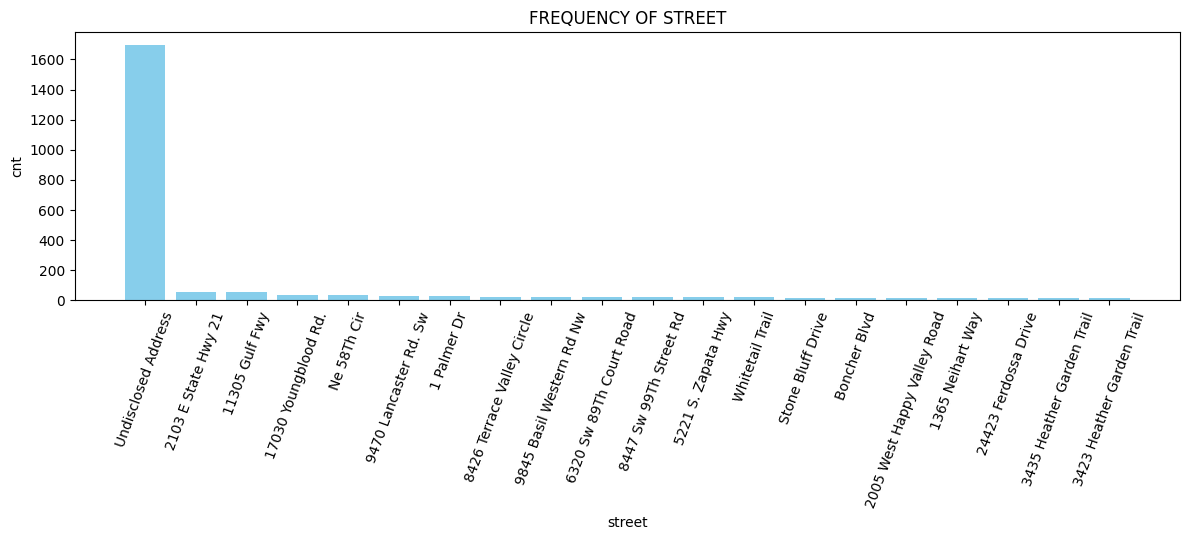

In [255]:
street_cnt = original_data['street'].value_counts().nlargest(20)

plt.figure(figsize=(12, 5.5))
plt.bar(street_cnt.index,
        street_cnt.values,
        color='skyblue')

plt.xlabel('street',
           fontsize=10)

plt.ylabel('cnt')
plt.title('FREQUENCY OF STREET')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

- it's difficult to fully data clean the street feature, there are too many possibilities for error to consider
- and perhaps in future iterations different strategies can be tried, as a number of additional features can be build if a combination of street, city, zipcode is used - to perhaps find **the distance from property to city center**, **closest amenities, public transport** etc
- for now delete the feature

In [256]:
original_data = original_data.drop('street',
                                   axis=1)

#### **state**

In [257]:
original_data['state'].isnull().sum()[original_data['state'].isnull().sum() > 0]

array([], dtype=int64)

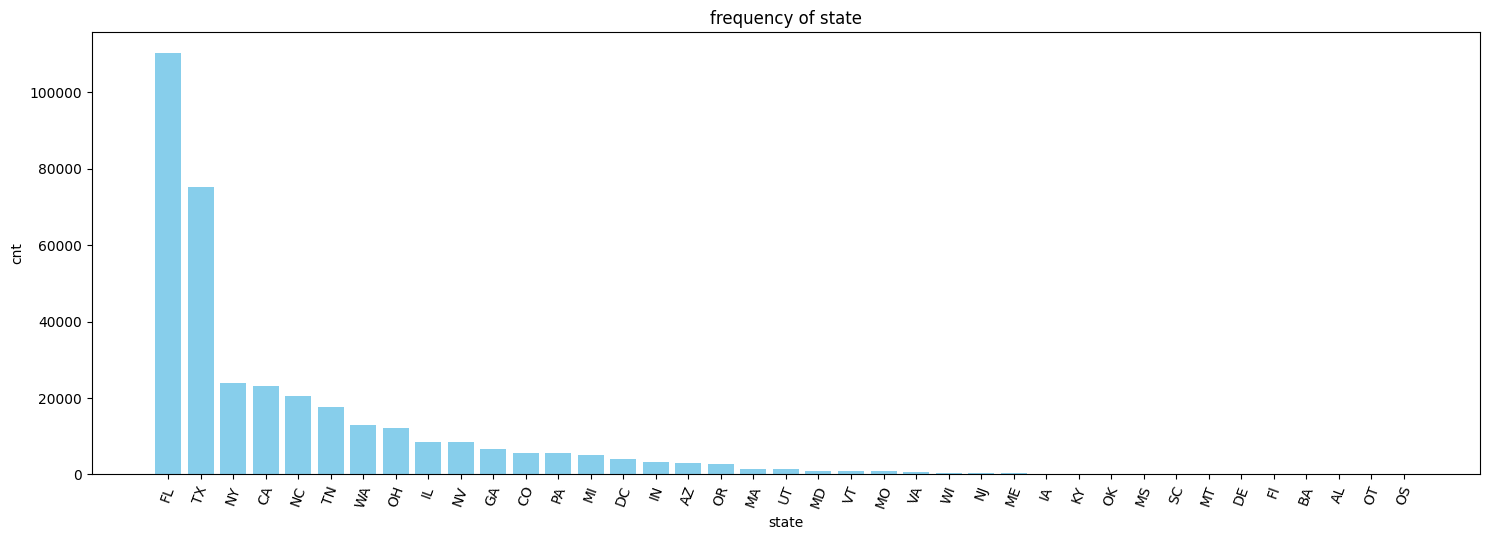

In [258]:
state_cnt = original_data['state'].value_counts()

plt.figure(figsize=(15, 5.5))
plt.bar(state_cnt.index,
        state_cnt.values,
        color='skyblue')

plt.xlabel('state',
           fontsize=10)

plt.ylabel('cnt')
plt.title('frequency of state')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

In [259]:
original_data['state'].nunique()

39

In [260]:
original_data['state'] = original_data['state'].apply(lambda x: str(x).upper())

In [261]:
original_data['state'].unique()

array(['NC', 'WA', 'CA', 'TX', 'FL', 'PA', 'TN', 'IA', 'NY', 'OR', 'DC',
       'NV', 'AZ', 'GA', 'IL', 'NJ', 'MA', 'OH', 'IN', 'UT', 'MI', 'VT',
       'MD', 'CO', 'KY', 'MO', 'VA', 'WI', 'ME', 'MS', 'OK', 'SC', 'MT',
       'DE', 'BA', 'AL', 'OT', 'OS'], dtype=object)

In [262]:
#create the table of available US states to make sure that there are no errors in the original data set
state_abbr = pd.DataFrame({
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}, index=['state_abbr']).T.reset_index()

state_abbr = state_abbr.rename(columns={
    'index': 'state_name'
})

In [263]:
original_data = original_data.merge(state_abbr,
                                    how='left',
                                    left_on='state',
                                    right_on='state_abbr')

In [264]:
original_data['state_name'].isnull().sum()[original_data['state_name'].isnull().sum() > 0]

array([4029])

In [265]:
original_data[original_data['state_name'].isnull()]['state'].unique()

array(['DC', 'BA', 'OT', 'OS'], dtype=object)

No, the District of Columbia is not a state. It's a federal district, specifically created to be the seat of the U.S. government, as outlined in the U.S. Constitution. The District of Columbia is often referred to as Washington, D.C., and while it has its own local government, including an elected mayor and council, it is not part of any state and is under the exclusive legislative jurisdiction of the U.S. Congress.

In [266]:
original_data[original_data['state'] == 'DC']['city'].unique()

array(['Washington'], dtype=object)

In [267]:
original_data['state'] = original_data['state'].apply(lambda x: 'WA' if str(x) == 'DC' else x)

In [268]:
original_data[original_data['state'] == 'BA']['city'].unique()

array([' '], dtype=object)

In [269]:
original_data[original_data['state'] == 'OT']['city'].unique()

array(['Other'], dtype=object)

In [270]:
original_data[original_data['state'] == 'OS']['city'].unique()

array(['Foreign Country'], dtype=object)

In [271]:
legitimate_states = 'AL, AK, AZ, AR, CA, CO, CT, DE, FL, GA, HI, ID, IL, IN, IA, KS, KY, LA, ME, MD, MA, MI, MN, MS, MO, MT, NE, NV, NH, NJ, NM, NY, NC, ND, OH, OK, OR, PA, RI, SC, SD, TN, TX, UT, VT, VA, WA, WV, WI, WY'
lst_of_legitimate_states = legitimate_states.split(', ')

In [272]:
#original_data = original_data[~original_data['state'].isin(['BA', 'OT', 'OS'])] #may be different with different data, consider future errors
original_data = original_data[original_data['state'].isin(lst_of_legitimate_states)]

In [273]:
original_data['state'] = original_data['state'].astype('string')

In [274]:
original_data[(original_data['state'] != original_data['state_abbr']) & (original_data['state_abbr'].isnull() == False)]

,city,sqft,zipcode,state,stories,target,listing_status,private_pool,type_of_fireplace,availability_of_fireplace,...,parking_availability,parking_type,lotsize,price_per_sq_feet,average_school_rating,school_number,school_distance,school_ages,state_name,state_abbr


#### **zipcode**

- A valid US state ZIP code always starts with a number between 0 and 9, representing a broad geographic area, and ends with a number between 00 and 99, representing a specific delivery area.
- The ZIP code format is either a five-digit number (#####) or a five-digit number, a hyphen, then four more digits (#####-####) according to Geoapify.
- The first digit indicates the general region of the country, with 0 in the Northeast and 9 in the West according to GeoPostcodes. The next two digits pinpoint a regional area or sectional center facility. The final two digits designate the specific local post office or delivery zone.

In [275]:
original_data['zipcode'].isnull().sum()[original_data['zipcode'].isnull().sum() > 0]

array([], dtype=int64)

In [276]:
original_data['zipcode'].unique()

array(['28387', '99216', '90049', ..., '75792', '20191', '64015'],
      dtype=object)

check the length of the zip code

In [277]:
original_data['length'] = original_data['zipcode'].apply(lambda x: len(x))
original_data['length'].value_counts()

length
5     354380
4       1911
10       156
1          3
6          3
8          1
2          1
Name: count, dtype: int64

In [278]:
original_data['zipcode'] = original_data['zipcode'].apply(lambda x: '0' + str(x) if len(str(x)) == 4 else x)

In [279]:
original_data['length2'] = original_data['zipcode'].apply(lambda x: len(x))
original_data['length2'].value_counts()

length2
5     356291
10       156
1          3
6          3
8          1
2          1
Name: count, dtype: int64

In [280]:
original_data['zipcode_length'] = original_data['zipcode'].apply(lambda x: True if (len(str(x)) == 5 or len(str(x)) == 10) else False)

In [281]:
original_data['zipcode_length'].value_counts()

zipcode_length
True     356447
False         8
Name: count, dtype: int64

In [282]:
original_data = original_data[original_data['zipcode_length'] == True]

correct start, correct finish

In [283]:
#starts and ends correctly
original_data['correct_start'] = original_data['zipcode'].apply(lambda x: True if str(x)[:1] in '0123456789' else False)
original_data['correct_end'] = original_data['zipcode'].apply(lambda x: True if ((str(x)[-2:-1] in '0123456789') and (str(x)[-1:] in '0123456789')) else False)

In [284]:
original_data['zip_hyphen'] = original_data['zipcode'].apply(lambda x: True if ('-' in x and len(x) == 10) else False)

In [285]:
original_data['only_numbers'] = original_data['zipcode'].apply(lambda x: True if str(x).isdigit() == True else False)

correct combinations

In [286]:
original_data[(original_data['correct_start'] == False)]

,city,sqft,zipcode,state,stories,target,listing_status,private_pool,type_of_fireplace,availability_of_fireplace,...,school_ages,state_name,state_abbr,length,length2,zipcode_length,correct_start,correct_end,zip_hyphen,only_numbers


In [287]:
original_data[(original_data['correct_end'] == False)]

,city,sqft,zipcode,state,stories,target,listing_status,private_pool,type_of_fireplace,availability_of_fireplace,...,school_ages,state_name,state_abbr,length,length2,zipcode_length,correct_start,correct_end,zip_hyphen,only_numbers


only numbers, and contain a hyphen

In [288]:
original_data[(original_data['only_numbers'] == False) & (original_data['zip_hyphen'] == False)]

,city,sqft,zipcode,state,stories,target,listing_status,private_pool,type_of_fireplace,availability_of_fireplace,...,school_ages,state_name,state_abbr,length,length2,zipcode_length,correct_start,correct_end,zip_hyphen,only_numbers


In [289]:
original_data[(original_data['zip_hyphen'] == False) & (original_data['zipcode_length'] == False)]

,city,sqft,zipcode,state,stories,target,listing_status,private_pool,type_of_fireplace,availability_of_fireplace,...,school_ages,state_name,state_abbr,length,length2,zipcode_length,correct_start,correct_end,zip_hyphen,only_numbers


In [290]:
original_data[(original_data['zip_hyphen'] == True) & (original_data['length2'] != 10)]

,city,sqft,zipcode,state,stories,target,listing_status,private_pool,type_of_fireplace,availability_of_fireplace,...,school_ages,state_name,state_abbr,length,length2,zipcode_length,correct_start,correct_end,zip_hyphen,only_numbers


In [291]:
original_data['zipcode'] = original_data['zipcode'].astype('string')

- can test for whether the zipcode aligns with state, but it would take time
- in future testing this feature can be cleaned further

In [292]:
original_data = original_data.drop(['length', 'length2', 'zipcode_length', 'correct_start', 'correct_end', 'zip_hyphen', 'only_numbers'],
                                   axis=1)

#### **city**

In [293]:
original_data['city'].isnull().sum()[original_data['city'].isnull().sum() > 0]

array([34])

In [294]:
original_data['city'] = original_data['city'].apply(lambda x: str(x).title())

In [295]:
original_data['missing_city'] = original_data['city'].apply(lambda x: True if (str(x).replace('.', '').replace(',', '').\
    replace(' ', '').isalpha() == False) else False)

In [296]:
original_data['missing_city'].value_counts()

missing_city
False    356387
True         60
Name: count, dtype: int64

In [297]:
missing_city = original_data[original_data['missing_city'] == True]

In [298]:
missing_city = missing_city['zipcode']
missing_city = missing_city.drop_duplicates()

In [299]:
list_of_zipcodes = missing_city.values.tolist()
full_five_zipcodes = [int(var) for var in list_of_zipcodes]
zero_five_zipcodes = [var for var in list_of_zipcodes if var.startswith('0')]

- try to locate the relevant city based on the zipcode available
- careful with *geocoders* tend to block too many connections

In [300]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="find_city_name")

blank_city_full, blank_city_five, blank_city_zero = [], [], []
blank_country_full, blank_country_five, blank_country_zero = [], [], []

for p_code in list_of_zipcodes:
    location = geolocator.geocode(p_code)
    address = str(location).split(',')
    blank_city_full.append(str(address[1]).strip())
    blank_country_full.append(str(address[-1]).strip())

In [301]:
for p_code in full_five_zipcodes:
    location = geolocator.geocode(p_code)
    address = str(location).split(',')
    blank_city_five.append(str(address[1]).strip())
    blank_country_five.append(str(address[-1]).strip())

In [302]:
for p_code in zero_five_zipcodes:
    location = geolocator.geocode(p_code)
    address = str(location).split(',')
    blank_city_zero.append(str(address[1]).strip())
    blank_country_zero.append(str(address[-1]).strip())

In [303]:
missing_cities_with_zipcodes_full = pd.DataFrame({
    'postal_code': list_of_zipcodes,
    'find_city': blank_city_full,
    'find_country': blank_country_full
})

missing_cities_with_zipcodes_five = pd.DataFrame({
    'postal_code': full_five_zipcodes,
    'find_city': blank_city_five,
    'find_country': blank_country_five
})

missing_cities_with_zipcodes_zero = pd.DataFrame({
    'postal_code': zero_five_zipcodes,
    'find_city': blank_city_zero,
    'find_country': blank_country_zero
})

missing_cities_with_zipcodes = pd.concat([missing_cities_with_zipcodes_full, missing_cities_with_zipcodes_five, missing_cities_with_zipcodes_zero])

In [304]:
def isEnglish(table: pd.DataFrame):
  
  '''
    > check whether the string contains latin / roman characters
  '''
  
  s = str(table['find_city'])
  return s.isascii()

missing_cities_with_zipcodes['condition'] = missing_cities_with_zipcodes.apply(isEnglish,
                                                                               axis=1)

In [305]:
missing_cities_with_zipcodes = missing_cities_with_zipcodes.drop_duplicates()

In [306]:
missing_cities_with_zipcodes = missing_cities_with_zipcodes[missing_cities_with_zipcodes['find_country'] == 'United States']

In [307]:
original_data = original_data.merge(missing_cities_with_zipcodes,
                                    how='left',
                                    left_on='zipcode',
                                    right_on='postal_code')


original_data['find_city'] = original_data['find_city'].fillna('Unknown')

In [308]:
def consolidate_city(table: pd.DataFrame):
    if table['missing_city'] == True:
        new_city = table['find_city']
    else:
        new_city = table['city']

    return new_city

original_data['city_name'] = original_data.apply(consolidate_city,
                                                 axis=1)

In [309]:
original_data['city_name'].isnull().sum()[original_data['city_name'].isnull().sum() > 0]

array([], dtype=int64)

In [310]:
original_data = original_data[original_data['city_name'] != 'Unknown']

In [311]:
original_data['city_name'] = original_data['city_name'].astype('string')

#### **stories**

In [312]:
original_data['stories'].isnull().sum()[original_data['stories'].isnull().sum() > 0]

array([134788])

In [313]:
original_data['stories'] = original_data['stories'].fillna(0)

In [314]:
original_data['stories'] = original_data['stories'].apply(lambda x: str(x).lower())

In [315]:
original_data[original_data['stories'] == '']

,city,sqft,zipcode,state,stories,target,listing_status,private_pool,type_of_fireplace,availability_of_fireplace,...,school_distance,school_ages,state_name,state_abbr,missing_city,postal_code,find_city,find_country,condition,city_name


In [316]:
original_data[original_data['stories'] == "''"]

,city,sqft,zipcode,state,stories,target,listing_status,private_pool,type_of_fireplace,availability_of_fireplace,...,school_distance,school_ages,state_name,state_abbr,missing_city,postal_code,find_city,find_country,condition,city_name


In [317]:
original_data['stories'] = original_data['stories'].apply(lambda x: 1 if 'one' in str(x) else x)
original_data['stories'] = original_data['stories'].apply(lambda x: 2 if 'two' in str(x) else x)
original_data['stories'] = original_data['stories'].apply(lambda x: 2 if 'bi' in str(x) else x)

original_data['stories'] = original_data['stories'].apply(lambda x: 3 if 'three' in str(x) else x)
original_data['stories'] = original_data['stories'].apply(lambda x: 3 if 'tri' in str(x) else x)

original_data['stories'] = original_data['stories'].apply(lambda x: 4 if 'four' in str(x) else x)
original_data['stories'] = original_data['stories'].apply(lambda x: 4 if 'quad' in str(x) else x)

original_data['stories'] = original_data['stories'].apply(lambda x: 6 if 'six' in str(x) else x)

original_data['stories'] = original_data['stories'].apply(lambda x: 0 if 'mobile' in str(x) else x)

In [318]:
original_data['stories'] = original_data['stories'].apply(lambda x: str(x).replace('1/2', '0.5').replace('3/4', '0.75'))

In [319]:
def extract_the_storey_number(table: pd.DataFrame):

  '''
    > extract relevant data from the stories feature to return possible storey number
  '''
  
  npt_vl = str(table['stories'])

  #any kind of number?
  if any(char.isdigit() for char in npt_vl):
    all_numbers_as_strings = re.findall(r'[-+]?\d*\.?\d+(?:[eE][-+]?\d+)?', npt_vl)
    lst_of_storeys = [abs(float(num)) for num in all_numbers_as_strings]
    dupl_storeys = [sum(lst_of_storeys) if any(element in lst_of_storeys for element in [0.5, 0.75]) else max(lst_of_storeys) for x in lst_of_storeys]
    storeys = (list(set(dupl_storeys))[0])

  #characters only, no spaces
  elif str(npt_vl).replace(' ', '').isalpha():
    storeys = None

  else:
    storeys = 0

  return storeys

original_data['stories_new'] = original_data.apply(extract_the_storey_number,
                                                   axis=1)

In [320]:
original_data['stories_new'] = original_data['stories_new'].fillna(0)

- did a short analysis and found an average number of storeys for each property type that I encoded for propertyType function previously

In [321]:
def consolidate_storey_number(table: pd.DataFrame):
    
    '''
        > if storey feature is missing for known property type, return an average
    '''
    
    if (table['property_type'] != 'unknown type') and (table['stories_new'] == 0):
        if table['property_type'] == 'single family':
            result = 1.5
        elif table['property_type'] == 'american colonial':
            result = 2
        elif table['property_type'] == 'american foursquare':
            result = 2
        elif table['property_type'] == 'barndominium':
            result = 1.5
        elif table['property_type'] == 'bungalow':
            result = 1
        elif table['property_type'] == 'american craftsman':
            result = 1.5
        elif table['property_type'] == 'cape cod':
            result = 1.5
        elif table['property_type'] == 'chalet':
            result = 1.5
        elif table['property_type'] == 'cottage':
            result = 1.5
        elif table['property_type'] == 'farmhouse':
            result = 1.5
        elif table['property_type'] == 'federal':
            result = 10
        elif table['property_type'] == 'gambrel':
            result = 1
        elif table['property_type'] == 'hall':
            result = 1.5
        elif table['property_type'] == 'linked':
            result = 1
        elif table['property_type'] == 'log':
            result = 1.5
        elif table['property_type'] == 'manor':
            result = 1.5
        elif table['property_type'] == 'mansion':
            result = 2.5
        elif table['property_type'] == 'manufactured':
            result = 1
        elif table['property_type'] == 'patio':
            result = 1.5
        elif table['property_type'] == 'prefabricated':
            result = 1.5
        elif table['property_type'] == 'ranch':
            result = 1
        elif table['property_type'] == 'saltbox':
            result = 2
        elif table['property_type'] == 'split-level':
            result = 3
        elif table['property_type'] == 'stilt':
            result = 1.5
        elif table['property_type'] == 'tudor':
            result = 2.5
        elif table['property_type'] == 'tuscan':
            result = 1.5
        elif table['property_type'] == 'victorian':
            result = 2.5
        elif table['property_type'] == 'villa':
            result = 1.5
        elif table['property_type'] == 'beach':
            result = 1
        elif table['property_type'] == 'a-frame':
            result = 2.5
        elif table['property_type'] == 'council':
            result = 2 #1-3
        elif table['property_type'] == 'duplex':
            result = 2
        elif table['property_type'] == 'two-family':
            result = 2
        elif table['property_type'] == 'two-decker':
            result = 2
        elif table['property_type'] == 'semi-detached':
            result = 2
        elif table['property_type'] == 'byre-dwelling':
            result = 1
        elif table['property_type'] == 'connected farm':
            result = 3
        elif table['property_type'] == 'housebarn':
            result = 3 #2-4
        elif table['property_type'] == 'longhouse':
            result = 1
        elif table['property_type'] == 'apartment':
            result = 6 #1-12
        elif table['property_type'] == 'brownstone':
            result = 4 #3-5
        elif table['property_type'] == 'cluster':
            result = 5
        elif table['property_type'] == 'condominium':
            result = 5
        elif table['property_type'] == 'garden':
            result = 1
        elif table['property_type'] == 'housing cooperative':
            result = 1
        elif table['property_type'] == 'penthouse':
            result = 1
        elif table['property_type'] == 'townhouse':
            result = 2.5
        elif table['property_type'] == 'multifamily':
            result = 5.5# 3
        elif table['property_type'] == 'tower block':
            result = 7
        elif table['property_type'] == 'mobile':
            result = 0
        elif table['property_type'] == 'tent':
            result = 0
        elif table['property_type'] == 'yurt':
            result = 1
        else:
            result = 0

    elif (table['property_type'] != 'unknown type') and (table['stories_new'] != 0):
        result = table['stories_new']
    else:
        result = 0

    return result

original_data['storey_number'] = original_data.apply(consolidate_storey_number,
                                                     axis=1)

In [322]:
original_data['storey_number'].value_counts()

storey_number
1.0       96760
2.0       75652
0.0       72159
1.5       48873
5.0       24094
          ...  
2.2           1
3.5           1
1002.0        1
96.0          1
65.0          1
Name: count, Length: 84, dtype: int64

In [323]:
original_data = original_data.drop(['city', 'state_name', 'state_abbr', 'missing_city', 'postal_code',
                                    'find_city', 'find_country', 'condition', 'stories', 'stories_new'],
                                   axis=1)

In [324]:
original_data['storey_number'] = original_data['storey_number'].astype('int16')

### **PRE-PROCESSING**

- make sure that after the first step in cleaning up the features for the model, there are no possible duplicates found or blanks left unnoticed

In [325]:
original_data.isnull().sum()[original_data.isnull().sum() > 0]

Series([], dtype: int64)

In [326]:
print(f'original dimension after data transformation: {original_data.shape}')

original_data = original_data.drop_duplicates()

print(f'dimension without duplicates: {original_data.shape}')

original dimension after data transformation: (356414, 32)
dimension without duplicates: (351119, 32)


In [327]:
def check_if_empty(table: pd.DataFrame,
                   feature: str):
    null_rows = table[table[feature].isnull()].empty
    no_rows = table[table[feature] == ''].empty
    space_rows = table[table[feature] == "''"].empty
    
    return f'{feature}: {null_rows, no_rows, space_rows}'

In [328]:
print(check_if_empty(original_data, 'sqft'))
print(check_if_empty(original_data, 'zipcode'))
print(check_if_empty(original_data, 'state'))
print(check_if_empty(original_data, 'target'))
print(check_if_empty(original_data, 'listing_status'))
print(check_if_empty(original_data, 'private_pool'))
print(check_if_empty(original_data, 'availability_of_fireplace'))
print(check_if_empty(original_data, 'type_of_fireplace'))
print(check_if_empty(original_data, 'multiple_listings'))
print(check_if_empty(original_data, 'number_of_bedrooms'))
print(check_if_empty(original_data, 'bathroom'))
print(check_if_empty(original_data, 'property_group'))
print(check_if_empty(original_data, 'property_type'))
print(check_if_empty(original_data, 'selling'))
print(check_if_empty(original_data, 'year_of_construction'))
print(check_if_empty(original_data, 'year_of_remodeling'))
print(check_if_empty(original_data, 'availability_of_heating'))
print(check_if_empty(original_data, 'type_of_heating_system'))
print(check_if_empty(original_data, 'source_of_heat'))
print(check_if_empty(original_data, 'availability_of_cooling'))
print(check_if_empty(original_data, 'type_of_cooling_system'))
print(check_if_empty(original_data, 'source_of_cool'))
print(check_if_empty(original_data, 'parking_availability'))
print(check_if_empty(original_data, 'parking_type'))
print(check_if_empty(original_data, 'lotsize'))
print(check_if_empty(original_data, 'price_per_sq_feet'))
print(check_if_empty(original_data, 'average_school_rating'))
print(check_if_empty(original_data, 'school_number'))
print(check_if_empty(original_data, 'school_distance'))
print(check_if_empty(original_data, 'school_ages'))
print(check_if_empty(original_data, 'city_name'))
print(check_if_empty(original_data, 'storey_number'))

sqft: (True, True, True)
zipcode: (True, True, True)
state: (True, True, True)
target: (True, True, True)
listing_status: (True, True, True)
private_pool: (True, True, True)
availability_of_fireplace: (True, True, True)
type_of_fireplace: (True, True, True)
multiple_listings: (True, True, True)
number_of_bedrooms: (True, True, True)
bathroom: (True, True, True)
property_group: (True, True, True)
property_type: (True, True, True)
selling: (True, True, True)
year_of_construction: (True, True, True)
year_of_remodeling: (True, True, True)
availability_of_heating: (True, True, True)
type_of_heating_system: (True, True, True)
source_of_heat: (True, True, True)
availability_of_cooling: (True, True, True)
type_of_cooling_system: (True, True, True)
source_of_cool: (True, True, True)
parking_availability: (True, True, True)
parking_type: (True, True, True)
lotsize: (True, True, True)
price_per_sq_feet: (True, True, True)
average_school_rating: (True, True, True)
school_number: (True, True, True)

In [329]:
with pd.ExcelWriter('output/pre_data_cleaning_data.xlsx') as writer:
    original_data.to_excel(writer,
                           index=False,
                           header=True)

### **DATA CLEANING**

In [330]:
original_data = pd.read_excel('output/pre_data_cleaning_data.xlsx')

In [331]:
original_data.isnull().sum()[original_data.isnull().sum() > 0]

Series([], dtype: int64)

##### MEDIAN CONSTRUCTION YEAR

- find the median construction year by property type rather than the average, as if there are any outliers, the average will be skewed
- the feature will be useful to fill in any construction year blanks, i.e. construction year cannot be 0, it's illogical

In [332]:
property_by_construction = original_data[['property_type', 'year_of_construction']]

property_by_construction = property_by_construction.drop_duplicates()

property_by_construction = property_by_construction.groupby('property_type')['year_of_construction'].median().round(0)
property_by_construction = property_by_construction.reset_index().sort_values(by='property_type')

property_by_construction['year_of_construction'] = property_by_construction['year_of_construction'].astype('int16')

lst_of_yrs = property_by_construction['year_of_construction'].tolist()
with_yearly_specifics = [year for year in lst_of_yrs if year != 0]
median_year = round(statistics.median(with_yearly_specifics))

mask = property_by_construction['year_of_construction'] == 0
property_by_construction.loc[mask, 'year_of_construction'] = median_year

property_by_construction = property_by_construction.rename(columns={
    'property_type': 'c_prop_type',
    'year_of_construction': 'med_construct_year'
})

In [333]:
original_data = original_data.merge(property_by_construction,
                                    how='left',
                                    left_on='property_type',
                                    right_on='c_prop_type')

##### MEDIAN SQFT / LOTSIZE

- find the median square footage by property type rather than the average, as if there are any outliers, the average will be skewed
- the feature will be useful to fill in any sqft blanks, where possible sqft should be modified from 0 to a median value

In [334]:
property_by_median_sqft_n_lotsize = original_data[['property_type', 'sqft']]

property_by_median_sqft_n_lotsize = property_by_median_sqft_n_lotsize.drop_duplicates()

property_by_median_sqft_n_lotsize = property_by_median_sqft_n_lotsize.groupby('property_type')['sqft'].median().round(0)
property_by_median_sqft_n_lotsize = property_by_median_sqft_n_lotsize.reset_index().sort_values(by='property_type')

property_by_median_sqft_n_lotsize['med_lot'] = property_by_median_sqft_n_lotsize['sqft'].apply(lambda x: round(x*2.5, 0))

property_by_median_sqft_n_lotsize = property_by_median_sqft_n_lotsize.rename(columns={
    'property_type': 'sq_prop_type',
    'sqft': 'med_sqft'
})

In [335]:
original_data = original_data.merge(property_by_median_sqft_n_lotsize,
                                    how='left',
                                    left_on='property_type',
                                    right_on='sq_prop_type')

##### AVERAGE SQFT / LOTSIZE

- did a short investigation on the average square footage for a property type
- the feature will be useful to fill in any sqft blanks, where possible sqft should be modified from 0 to an appropriate value, and rather than using the average from the data set that may contain outliers, the known property average from the database across the country is better than the alternative

In [336]:
average_sqft_n_lotsize_by_property = pd.read_excel('data/real_estate/square_footage_by_property.xlsx')

#sqft to lotsize: 1:2.5 (3.5)
average_sqft_n_lotsize_by_property['lot_average'] = average_sqft_n_lotsize_by_property['sqft_average'].apply(lambda x: x*2.5)

average_sqft_n_lotsize_by_property['sqft_average'] = average_sqft_n_lotsize_by_property['sqft_average'].astype('int16')
average_sqft_n_lotsize_by_property['lot_average'] = average_sqft_n_lotsize_by_property['lot_average'].astype('int16')

#the beginning of the string
average_sqft_n_lotsize_by_property.property_type = average_sqft_n_lotsize_by_property.property_type.replace('^\s+', '', regex=True)

#the end of the string
average_sqft_n_lotsize_by_property.property_type = average_sqft_n_lotsize_by_property.property_type.replace('\s+$', '', regex=True)

In [337]:
original_data = original_data.merge(average_sqft_n_lotsize_by_property,
                                    how='left',
                                    left_on='property_type',
                                    right_on='property_type')

##### SQUARE FOOTAGE AND LOT SIZE AND CONSTRUCTION YEAR

construction year cannot be 0

In [338]:
def fill_in_median_construction_year(table: pd.DataFrame):
    if table['year_of_construction'] == 0:
        return table['med_construct_year']
    else:
        return table['year_of_construction']

original_data['year_of_construction2'] = original_data.apply(fill_in_median_construction_year,
                                                             axis=1)

square footage cannot be 0

In [339]:
def create_sqft_with_lotsize(table: pd.DataFrame):
    if (table['sqft'] == 0) and (table['lotsize'] == 0):
        if table['property_type'] == 'unknown type':
            return table['med_sqft']
        else:
            return table['sqft_average']
    elif (table['sqft'] == 0) and (table['lotsize'] > 0):
        return table['lotsize'] / 2.5
    else:
        return table['sqft']
    
original_data['sqft2'] = original_data.apply(create_sqft_with_lotsize,
                                             axis=1)

lot size cannot be 0

In [340]:
def create_lotsize_with_sqft(table: pd.DataFrame):
    if (table['lotsize'] == 0) and (table['sqft'] == 0):
        if table['property_type'] == 'unknown type':
            return table['med_lot']
        else:
            return table['lot_average']
    elif (table['lotsize'] == 0) and (table['sqft'] > 0):
        return table['sqft'] * 2.5
    else:
        return table['lotsize']
    
original_data['lotsize2'] = original_data.apply(create_lotsize_with_sqft,
                                                axis=1)

potential to swap sqft with lotsize, but I'm not data cleaning that at this stage

remove anything smaller than normal, potentially square footage is in acres or measuring units, but there is no way of knowing, so better to remove altogether

In [341]:
original_data = original_data[original_data['lotsize2'] > 500]

In [342]:
original_data = original_data[original_data['sqft2'] > 500]

In [343]:
original_data.shape

(347251, 44)

##### SCHOOL NUMBER AND SCHOOL NUMBER GROUP

Yes, it is certainly possible for a city to have 65 schools. There is no inherent limit to the number of schools a city can have. The number of schools in a city depends on factors such as its population, size, and the structure of its education system.

Garland Independent School District (GISD) has 67 campuses. These include elementary, middle, and high schools, as well as specialized programs and career and technical education courses. Garland ISD is the second-largest district in Dallas County and the 15th-largest in Texas.

In [344]:
original_data['school_number'].min(), original_data['school_number'].max()

(0, 65)

sort and group the school number to simplify the available options for the end buyer and the model

In [345]:
#categorize school number
school_number_conditions = [original_data['school_number'] < 1,
                            original_data['school_number'] == 1,
                            original_data['school_number'] == 2,
                            original_data['school_number'] == 3,
                            original_data['school_number'] == 4,
                            original_data['school_number'] == 5,
                            original_data['school_number'].between(6, 10),
                            original_data['school_number'] > 10]

school_number_category = ['0', '1', '2', '3', '4', '5', '6-10', '>10']

original_data['school_number_group'] = np.select(school_number_conditions, school_number_category)

In [346]:
original_data['school_number_group'].value_counts()

school_number_group
3       190063
6-10     57037
2        33680
5        25264
4        20201
>10       9001
1         8274
0         3731
Name: count, dtype: int64

##### SCHOOL DISTANCE AND SCHOOL DISTANCE GROUP

In [347]:
original_data['school_distance'].min(), original_data['school_distance'].max()

(0, 1591)

the measurement is likely miles or km, thus schools with the distance over 50 miles or km is too much, possible outlier

In [348]:
original_data = original_data[original_data['school_distance'] < 50]

sort and group the school distance to simplify the available options for the end buyer and the model

In [349]:
#categorize distance
school_distance_conditions = [original_data['school_distance'] < 0.5,
                              original_data['school_distance'].between(0.5, 1),
                              original_data['school_distance'].between(1, 1.5),
                              original_data['school_distance'].between(1.5, 2),
                              original_data['school_distance'].between(2, 3),
                              original_data['school_distance'].between(3, 5),
                              original_data['school_distance'].between(5, 10),
                              original_data['school_distance'] >= 10]

distance_category = ['<0.5M', '0.5-1M', '1-1.5M', '1.5-2M', '2-3M', '3-5M', '5-10M', '>10M']

original_data['school_distance_group'] = np.select(school_distance_conditions, distance_category)

In [350]:
original_data['school_distance_group'].value_counts()

school_distance_group
1.5-2M    81034
0.5-1M    60592
3-5M      55055
2-3M      50580
5-10M     46062
>10M      39492
<0.5M     14419
Name: count, dtype: int64

##### STOREYS AND STOREY NUMBER GROUP

In [351]:
original_data['storey_number'].min(), original_data['storey_number'].max()

(0, 1002)

In [352]:
original_data['storey_number'].describe()

count    347234.000000
mean          1.734821
std           3.064012
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        1002.000000
Name: storey_number, dtype: float64

A high-rise condominium is generally considered to be a building with 10 or more stories. These buildings are often found in urban areas and offer amenities like elevators, and often have parking garages or open parking. 
Here's a more detailed breakdown: 

    Low-rise: Generally 1-3 or 1-4 stories.
    Mid-rise: Generally 5-9 stories.
    High-rise: Generally 10 or more stories.
    Skyscraper: Often 40 or more stories, and can be considered a type of high-rise building.

properties with more than 50 floors to be considered an outlier

In [353]:
original_data = original_data[original_data['storey_number'] <= 50]

In [354]:
# #categorize storeys
# storey_conditions = [original_data['storey_number'] < 1,
#                      original_data['storey_number'].between(1, 1.5),
#                      original_data['storey_number'].between(2, 2.5),
#                      original_data['storey_number'].between(3, 3.5),
#                      original_data['storey_number'].between(3.5, 5),
#                      original_data['storey_number'].between(5, 10),
#                      original_data['storey_number'] > 10]

# storey_category = ['0', '1-1.5', '2-2.5', '3-3.5', '3.5-5', '5-10', '>10']

# original_data['storeys_group'] = np.select(storey_conditions, storey_category)

sort and group the storey number to simplify the available options for the end buyer and the model

In [355]:
#categorize storeys
storey_conditions = [original_data['storey_number'] < 1,
                     original_data['storey_number'].between(1, 4),
                     original_data['storey_number'].between(5, 9),
                     original_data['storey_number'].between(10, 40),
                     original_data['storey_number'] > 40]

storey_category = ['no storeys', 'low-rise', 'mid-rise', 'high-rise', 'skyscraper']

original_data['storeys_group'] = np.select(storey_conditions, storey_category)

In [356]:
original_data['storeys_group'].value_counts()

storeys_group
low-rise      241022
no storeys     68944
mid-rise       35451
high-rise       1564
skyscraper       126
Name: count, dtype: int64

##### NUMBER OF BEDROOMS AND BEDROOMS GROUP

In [357]:
original_data['number_of_bedrooms'].min(), original_data['number_of_bedrooms'].max()

(0, 99)

In [358]:
original_data['number_of_bedrooms'].describe()

count    347107.000000
mean          2.529448
std           2.034814
min           0.000000
25%           0.000000
50%           3.000000
75%           4.000000
max          99.000000
Name: number_of_bedrooms, dtype: float64

most properties are not going to have more than 20 bedrooms

In [359]:
original_data = original_data[original_data['number_of_bedrooms'] <= 20]

In [360]:
#categorize bedrooms
bedroom_conditions = [original_data['number_of_bedrooms'] < 1,
                      original_data['number_of_bedrooms'] == 1,
                      original_data['number_of_bedrooms'] == 2,
                      original_data['number_of_bedrooms'] == 3,
                      original_data['number_of_bedrooms'].between(4, 5),
                      original_data['number_of_bedrooms'].between(6, 10),
                      original_data['number_of_bedrooms'] > 10]

bedroom_category = ['no bedrooms', '1', '2', '3', '4-5', '6-10', '>10']

original_data['bedroom_group'] = np.select(bedroom_conditions, bedroom_category)

no bedrooms may be the null bedrooms properties, so will keep the records at this stage

In [361]:
original_data['bedroom_group'].value_counts()

bedroom_group
3              103983
4-5             89741
no bedrooms     88127
2               48538
6-10            10287
1                5690
>10               578
Name: count, dtype: int64

In [362]:
sorted(original_data[original_data['bedroom_group'] == '>10']['number_of_bedrooms'].unique().tolist())

[11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

##### NUMBER OF BATHROOMS

- no bedrooms, but bathrooms > 0 to be considered an outlier at this stage
- if data contains no bedrooms and no bathrooms certainly consider it to be an error record

In [363]:
original_data = original_data[~((original_data['number_of_bedrooms'] == 0) & (original_data['bathroom'] > 0))]
original_data = original_data[~((original_data['number_of_bedrooms'] == 0) & (original_data['bathroom'] == 0))]

In [364]:
def create_a_bath_group(table: pd.DataFrame):
  if table['bathroom'] == 0:
    return 'no bathrooms'
  elif table['bathroom'] < 1:
    return '< 1 bathrooms'
  elif table['bathroom'] >= 1 and table['bathroom'] < 2:
    return '1+ bathrooms'
  elif table['bathroom'] >= 2 and table['bathroom'] < 3:
    return '2+ bathrooms'
  elif table['bathroom'] >= 3 and table['bathroom'] < 5:
    return '3-4+ bathrooms'
  elif table['bathroom'] >= 5 and table['bathroom'] <= 10:
    return '5-10 bathrooms'
  elif table['bathroom'] > 10:
    return '> 10 bathrooms'
  else:
    return 'no data'

original_data['bathroom_group'] = original_data.apply(create_a_bath_group,
                                                      axis=1)

In [365]:
original_data['bathroom_group'].value_counts()

bathroom_group
2+ bathrooms      110239
3-4+ bathrooms     96113
5-10 bathrooms     18143
1+ bathrooms       17469
no bathrooms       16385
> 10 bathrooms       467
< 1 bathrooms          1
Name: count, dtype: int64

In [366]:
sorted(original_data[original_data['bathroom_group'] == '5-10 bathrooms']['bathroom'].unique().tolist())

[5.0, 5.25, 5.5, 6.0, 6.5, 6.75, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0]

##### PROPERTY AGE AND PROPERTY AGE GROUP

- property age is a useful feature for property value
- most buyers do not have the means or knowledge when it comes to repairs and would rather avoid it

In [367]:
def create_property_age(table: pd.DataFrame):

  current_datetime = datetime.now()
  current_year = current_datetime.year

  if table['year_of_remodeling'] > 0:
    home_age = current_year - table['year_of_remodeling']
  else:
    home_age = current_year - table['year_of_construction2']

  return home_age

original_data['property_age'] = original_data.apply(create_property_age,
                                                    axis=1)

In [368]:
#categorize age
property_age_conditions = [original_data['property_age'].between(0, 30),
                           original_data['property_age'].between(30, 65),
                           original_data['property_age'].between(65, 100),
                           original_data['property_age'] > 100]

age_category = ['Class A', 'Class B', 'Class C', 'Class D']

original_data['property_age_group'] = np.select(property_age_conditions, age_category)

Yes, it is possible to buy a property built in the 19th century. These older homes, often referred to as Victorian or historic homes, can be found and purchased, but they come with unique considerations.

but anything beyond 300 yrs is likely to be an outlier, doubt most buyers are going to buy properties from 18th century or even further back

In [369]:
original_data = original_data[original_data['property_age'] < 300]

##### SQUARE FOOTAGE GROUP

In [370]:
original_data['sqft2'].describe().round()

count       258815.0
mean          7423.0
std        1624933.0
min            501.0
25%           1347.0
50%           1880.0
75%           2652.0
max      795979430.0
Name: sqft2, dtype: float64

sqft group based on the national average

In [371]:
#categorize square footage
sqft_conditions = [original_data['sqft2'] == 0,
                   original_data['sqft2'] < 1000,
                   original_data['sqft2'].between(1000, 2500),
                   original_data['sqft2'] > 2500]

sqft_category = ['no data', 'small', 'medium', 'large']

original_data['sqft_group'] = np.select(sqft_conditions, sqft_category)

In [372]:
original_data['sqft_group'].value_counts()

sqft_group
medium    163967
large      74028
small      20820
Name: count, dtype: int64

##### LOTSIZE GROUP

In [373]:
original_data['lotsize2'].describe().round()

count    2.588150e+05
mean     9.029500e+04
std      7.538394e+06
min      5.020000e+02
25%      3.998000e+03
50%      6.650000e+03
75%      1.055900e+04
max      2.147484e+09
Name: lotsize2, dtype: float64

lotsize group based on the national average, or rather based on the prior feature - sqft group by 2.5 times

In [374]:
#categorize square footage
lot_conditions = [original_data['lotsize2'] == 0,
                  original_data['lotsize2'] < 2500,
                  original_data['lotsize2'].between(2500, 6500),
                  original_data['lotsize2'] > 6500]

lot_category = ['no data', 'small', 'medium', 'large']

original_data['lotsize_group'] = np.select(lot_conditions, lot_category)

In [375]:
original_data['lotsize_group'].value_counts()

lotsize_group
large     134031
medium     96231
small      28553
Name: count, dtype: int64

##### PRICE PER SQUARE FEET GROUP

In [376]:
original_data['price_per_sq_feet'].describe()

count    258815.000000
mean        246.543763
std         423.518314
min           0.000000
25%         111.000000
50%         164.000000
75%         275.000000
max      134950.000000
Name: price_per_sq_feet, dtype: float64

In [377]:
#categorize square footage
price_sqft_conditions = [original_data['price_per_sq_feet'] == 0,
                         original_data['price_per_sq_feet'] < 100,
                         original_data['price_per_sq_feet'].between(100, 150),
                         original_data['price_per_sq_feet'].between(150, 200),
                         original_data['price_per_sq_feet'].between(200, 250),
                         original_data['price_per_sq_feet'] > 250]

price_sqft_category = ['no data', '<$100', '$100-$150', '$150-$200', '$200-$250', '>$250']

original_data['price_sqft_group'] = np.select(price_sqft_conditions, price_sqft_category)

In [378]:
original_data['price_sqft_group'].value_counts()

price_sqft_group
>$250        73422
$100-$150    64533
$150-$200    43824
<$100        34453
$200-$250    25909
no data      16674
Name: count, dtype: int64

##### INTERQUARTILE RANGE

A logarithmic scale is typically used with the Interquartile Range (IQR) when dealing with data that spans a wide range of values, is highly skewed, or when you want to emphasize percentage changes rather than absolute differences. This is because logarithmic scales compress large ranges, making it easier to visualize and interpret the data, especially when dealing with outliers or skewed distributions

Skewed data is a type of data where the distribution is not symmetrical, meaning the data is not evenly spread around the mean or center.

delete duplicate features

In [379]:
original_data = original_data.drop(['sqft', 'year_of_construction', 'lotsize',
                                    'c_prop_type', 'med_construct_year',
                                    'sq_prop_type', 'med_sqft', 'med_lot',
                                    'property_group_y', 'sqft_range',
                                    'sqft_average', 'lot_average'],
                                   axis=1)

In [380]:
original_data = original_data.rename(columns={
    'property_group_x': 'property_group',
    'year_of_construction2': 'year_of_construction',
    'sqft2': 'sqft',
    'lotsize2': 'lotsize',
})

investigate target value

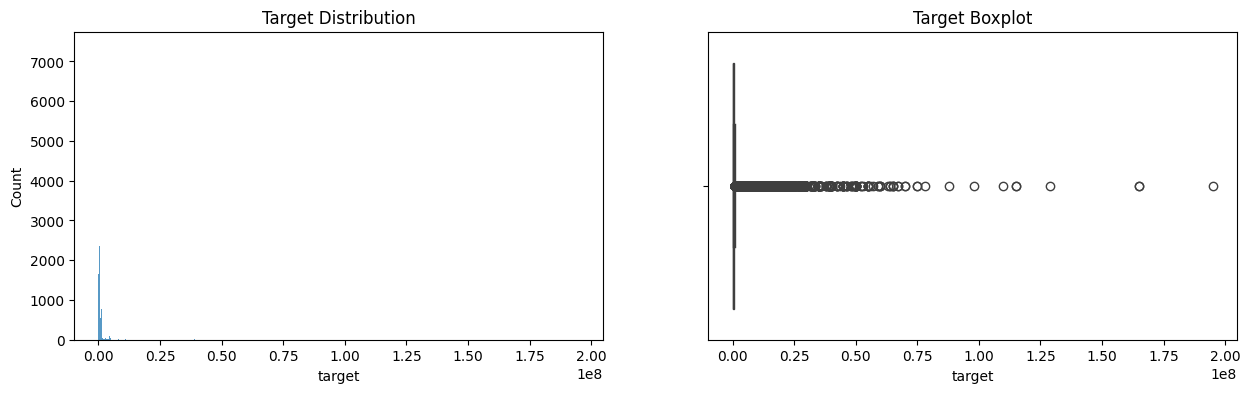

In [381]:
fig, axes = plt.subplots(nrows=1,
                         ncols=2,
                         figsize=(15, 4))

histplot = sns.histplot(data=original_data,
                        x='target',
                        ax=axes[0]);
histplot.set_title('Target Distribution');

boxplot = sns.boxplot(data=original_data,
                      x='target',
                      ax=axes[1]);
boxplot.set_title('Target Boxplot');

In [382]:
#modified function
def outliers_iqr_mod(data,
                     feature,
                     left=1.5,
                     right=1.5,
                     log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x= data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, data = outliers_iqr_mod(original_data,
                                  'target')

print(f"Outliers by Tukey's Method: {outliers.shape[0]}")

Outliers by Tukey's Method: 26174


it would be useful to take the records without outliers when it comes to the target feature itself, as it would help model predictions

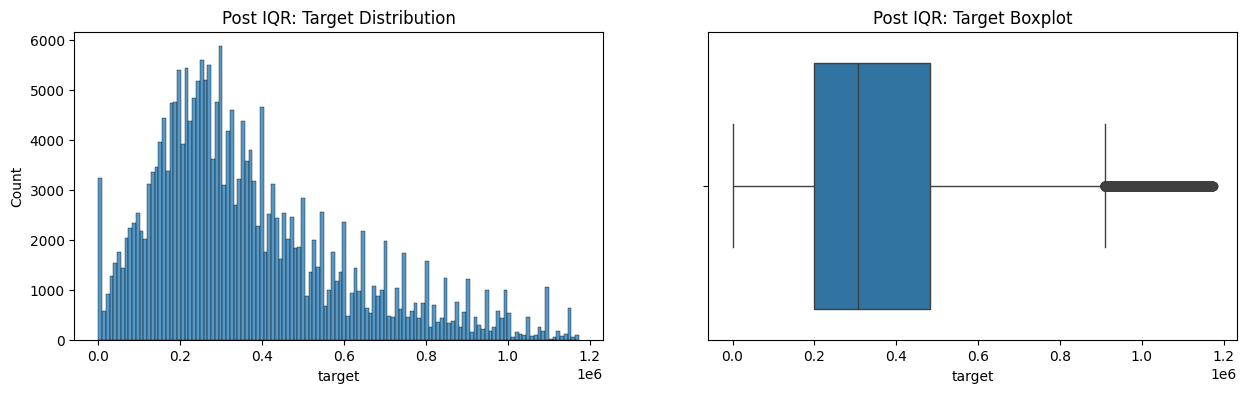

In [383]:
fig, axes = plt.subplots(nrows=1,
                         ncols=2,
                         figsize=(15, 4))

histplot = sns.histplot(data=data,
                        x='target',
                        ax=axes[0])
histplot.set_title('Post IQR: Target Distribution');

boxplot = sns.boxplot(data=data,
                      x='target',
                      ax=axes[1])
boxplot.set_title('Post IQR: Target Boxplot');

In [384]:
print(f'original dimension after data cleaning: {data.shape}')

data = data.drop_duplicates()

print(f'dimension without duplicates: {data.shape}')

original dimension after data cleaning: (232641, 42)
dimension without duplicates: (232641, 42)


In [385]:
data.isnull().sum()[data.isnull().sum() > 0]

Series([], dtype: int64)

pretty sure we can't use this type of feature

In [386]:
data = data[data['selling'] == 'for sale']

data = data.drop('selling',
                 axis=1)

In [387]:
with pd.ExcelWriter('output/post_data_cleaning_data.xlsx') as writer:
    data.to_excel(writer,
                  index=False,
                  header=True)

##### ISOLATION FOREST

short analysis on possible outliers

In [388]:
isolation_forest_df = data.copy()

In [389]:
#input the features into a specific list
anomaly_inputs_mx = ['number_of_bedrooms', 'bathroom',
                    #  'sqft', 'lotsize',
                     'property_age', 'storey_number']

In [390]:
#create an object class to look for outliers
model_IF_mx = ensemble.IsolationForest(contamination=0.1,
                              random_state=42)

#model learning through IsolationForest
model_IF_mx.fit(isolation_forest_df[anomaly_inputs_mx])

IsolationForest(contamination=0.1, random_state=42)

In [391]:
#create a feature to show the likelihood % of a variable being an anomaly
isolation_forest_df['anomaly_scores'] = model_IF_mx.decision_function(isolation_forest_df[anomaly_inputs_mx])

#create a feature to show whether the variable is an anomaly: 1 > inline, -1 > anomaly
isolation_forest_df['anomaly'] = model_IF_mx.predict(isolation_forest_df[anomaly_inputs_mx])

In [392]:
#write the function to show the results of the outliers analysis
def outlier_plot(data,
                 outlier_method_name):
    
	print(f'outlier method: {outlier_method_name}')
	method = f'{outlier_method_name}_anomaly'
	print(f"number of anomalous values {len(data[data['anomaly']==-1])}")
	print(f"number of non-anomalous values {len(data[data['anomaly']==1])}")
	print(f"total number of values: {len(data)}")

outlier method: ['Isolation Forest', 'number_of_bedrooms', 'bathroom', 'property_age', 'storey_number']
number of anomalous values 23238
number of non-anomalous values 209150
total number of values: 232388


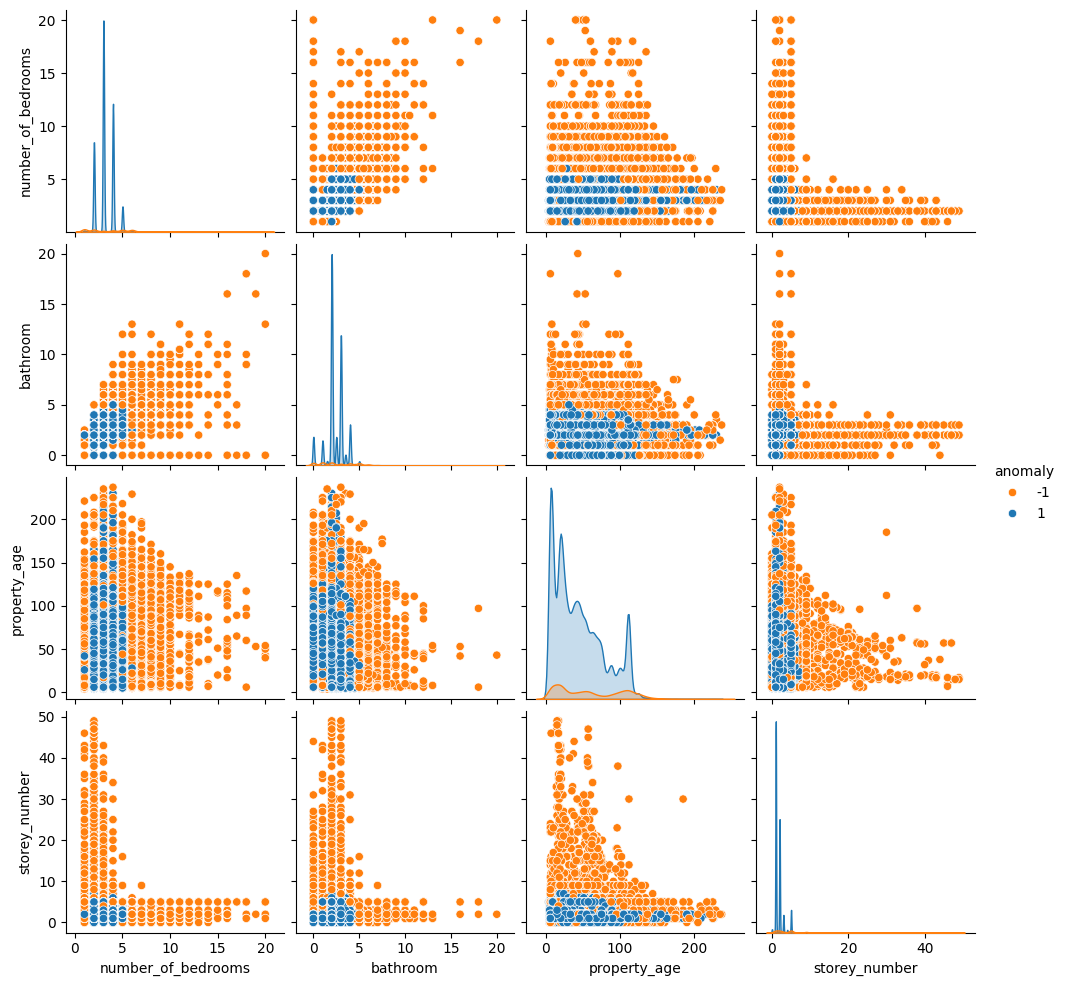

In [393]:
#call the function
outlier_plot(isolation_forest_df, ['Isolation Forest',
                                   'number_of_bedrooms', 'bathroom',
                                   #'sqft', 'lotsize',
                                   'property_age', 'storey_number']);

#set the palette for the graph
palette = ['#ff7f0e', '#1f77b4']

#create a pairplot to show the outliers distribution
sns.pairplot(isolation_forest_df,
             vars=anomaly_inputs_mx,
             hue='anomaly',
             palette=palette,
);

### **EXPLORATORY DATA ANALYSIS**

##### STATE

In [394]:
#create a boxplot
fig = px.box(
    data_frame=data,
    x='target',
    y='state',
    color='state',
    #set horizontal orientation
    orientation='h',
    title='Distribution of Property Value by State',
)

#set the title of the axis
fig.update_layout(
   xaxis_title_text='Property Value',
   yaxis_title_text='State',
   showlegend=False
)

#fig.show()

fig.write_html('graphs/1.1_box_state.html')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


Comment:
- lots of outliers, but can't delete
- reasonable distribution: with higher end states with higher income bracket, smaller (in-bound) states with lower property value

##### PROPERTY GROUP

In [395]:
#create a boxplot
fig = px.box(
    data_frame=data,
    x='target',
    y='property_group',
    color='property_group',
    #set horizontal orientation
    orientation='h',
    title='Distribution of Property Value by Property Group',
)

#set the title of the axis
fig.update_layout(
   xaxis_title_text='Property Value',
   yaxis_title_text='Property Group',
   showlegend=False
)

#fig.show()

fig.write_html('graphs/1.2_box_property_group.html')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Comment:

- attached multi-unit housing leading slightly over detached single-unit housing in terms of range, possibly because in highly densed cities / states most people purchase apartment level housing rathen than houses
- movable lowest, but makes perfect sense as to why, i.e. buyers less likely to purchase mobile homes

##### PROPERTY TYPE

In [396]:
#create a boxplot
fig = px.box(
    data_frame=data,
    x='target',
    y='property_type',
    color='property_type',
    #set horizontal orientation
    orientation='h',
    title='Distribution of Property Value by Property Type',
)

#set the title of the axis
fig.update_layout(
   xaxis_title_text='Property Value',
   yaxis_title_text='Property Type',
   showlegend=False
)

#fig.show()

fig.write_html('graphs/1.3_box_property_type.html')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Comment:

- an interesting split, but to take any information from the graph, you'd need to know the real estate market more intimately

##### SCHOOLS

SCHOOL RATING

In [397]:
#create a histogram
fig = px.histogram(data,
                   x="average_school_rating",
                   title='Distribution of School Rating'
)

#set the title of the axis
fig.update_layout(
   xaxis_title_text='Average School Rating',
   yaxis_title_text='Count',
   showlegend=False
)

#fig.show()

fig.write_html('graphs/1.4b_histogram_school_rating.html')

Comment:

- normal distribution for the most part

SCHOOL DISTANCE

In [398]:
#create a boxplot
fig = px.box(
    data_frame=data,
    x='target',
    y='school_distance_group',
    color='school_distance_group',
    #set horizontal orientation
    orientation='h',
    title='Distribution of Property Value by School Distance',
)

#set the title of the axis
fig.update_layout(
   xaxis_title_text='Property Value',
   yaxis_title_text='School Distance',
   showlegend=False
)

#fig.show()

fig.write_html('graphs/1.4c_box_school_distance.html')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Comment:

- school distance doesn't seem to have an effect on property value one way or the other

SCHOOL NUMBER

In [399]:
#create a boxplot
fig = px.box(
    data_frame=data,
    x='target',
    y='school_number_group',
    color='school_number_group',
    #set horizontal orientation
    orientation='h',
    title='Distribution of Property Value by School Availability',
)

#set the title of the axis
fig.update_layout(
   xaxis_title_text='Property Value',
   yaxis_title_text='School Number',
   showlegend=False
)

#fig.show()

fig.write_html('graphs/1.4d_box_school_number.html')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Comment:

- not affecting the property value one way or the other for the most part
- in fact more schools seem to have a worse off effect? > perhaps more densely populated areas, thus worse off in terms of value?, i.e. most people would rather live in quieter areas thus would pay more
- more intimate knowledge of real estate is needed to analyse this result

##### NUMBER OF BEDROOMS

In [400]:
#create a boxplot
fig = px.box(
    data_frame=data,
    x='target',
    y='bedroom_group',
    color='bedroom_group',
    #set horizontal orientation
    orientation='h',
    title='Distribution of Property Value by Number of Bedrooms',
)

#set the title of the axis
fig.update_layout(
   xaxis_title_text='Property Value',
   yaxis_title_text='Number of Bedrooms',
   showlegend=False
)

#fig.show()

fig.write_html('graphs/1.5b_box_bedroom.html')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Comment:

- standard expected result: more bedrooms, higher property value

##### NUMBER OF BATHROOMS

In [401]:
#create a boxplot
fig = px.box(
    data_frame=data,
    x='target',
    y='bathroom_group',
    color='bathroom_group',
    #set horizontal orientation
    orientation='h',
    title='Distribution of Property Value by Number of Bathrooms',
)

#set the title of the axis
fig.update_layout(
   xaxis_title_text='Property Value',
   yaxis_title_text='Number of Bathrooms',
   showlegend=False
)

#fig.show()

fig.write_html('graphs/1.6_box_bathroom.html')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Comment:

- standard expected result: more bathrooms, higher property value

##### PROPERTY AGE

In [402]:
#create a boxplot
fig = px.box(
    data_frame=data,
    x='target',
    y='property_age_group',
    color='property_age_group',
    #set horizontal orientation
    orientation='h',
    title='Distribution of Property Value by Property Age',
)
#set the title of the axis
fig.update_layout(
   xaxis_title_text='Property Value',
   yaxis_title_text='Property Age Group',
   showlegend=False
)

#fig.show()

fig.write_html('graphs/1.7_box_property_age.html')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Comment:

- interesting spread, worth investigating, as the property doesn't seem to have much affect on the property value which I find to be surprising

##### SQUARE FEET

In [403]:
#create a boxplot
fig = px.box(
    data_frame=data,
    x='target',
    y='sqft_group',
    color='sqft_group',
    #set horizontal orientation
    orientation='h',
    title='Distribution of Property Value by Square Feet',
)
#set the title of the axis
fig.update_layout(
   xaxis_title_text='Property Value',
   yaxis_title_text='SqFeet Group',
   showlegend=False
)

#fig.show()

fig.write_html('graphs/1.8a_box_sqfeet.html')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Comment:

- standard expected result: higher square footage, higher property value

##### PRICE PER SQUARE FOOT

In [404]:
#create a boxplot
fig = px.box(
    data_frame=data,
    x='target',
    y='price_sqft_group',
    color='price_sqft_group',
    #set horizontal orientation
    orientation='h',
    title='Distribution of Property Value by Price per Sq.Feet',
)

#set the title of the axis
fig.update_layout(
   xaxis_title_text='Property Value',
   yaxis_title_text='Price per Sq.Feet Group',
   showlegend=False
)

#fig.show()

fig.write_html('graphs/1.8b_box_price_per_sqfeet.html')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Comment:

- standard expected result: higher price per sq.foot, higher property value

##### STOREY NUMBER

In [405]:
#create a boxplot
fig = px.box(
    data_frame=data,
    x='target',
    y='storeys_group',
    color='storeys_group',
    #set horizontal orientation
    orientation='h',
    title='Distribution of Property Value by Storey Number',
)

#set the title of the axis
fig.update_layout(
   xaxis_title_text='Property Value',
   yaxis_title_text='Storey Number',
   showlegend=False
)

#fig.show()

fig.write_html('graphs/1.9_box_storey_number.html')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Comment:

- high-rise better off
- more intimate knowledge of real estate to analyse this result is needed, i.e. perhaps most buyers tend to be more flat-like homes, thus skewing higher demand, and thus higher prices

#### FEATURES CORRELATION

In [406]:
numericals = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']

c_data = data.select_dtypes(include=numericals)

The Pearson coefficient is preferred when data is numeric and quantitative, while the Spearman coefficient is preferred when data is qualitative and ordinal.

In [407]:
matrix_corr_s = c_data.corr(method='spearman')
matrix_corr_s

,target,number_of_bedrooms,bathroom,year_of_remodeling,price_per_sq_feet,average_school_rating,school_number,school_distance,storey_number,year_of_construction,sqft,lotsize,property_age
target,1.000000,0.245521,0.489792,0.027909,0.682892,0.344081,-0.057818,-0.061690,0.208509,0.156269,0.465870,0.088858,-0.174182
number_of_bedrooms,0.245521,1.000000,0.538717,-0.027003,-0.178849,0.081240,0.033763,0.006569,-0.063074,0.042807,0.678425,0.343639,-0.056621
bathroom,0.489792,0.538717,1.000000,0.017999,0.083483,0.243346,-0.014560,0.039964,0.261160,0.318856,0.694723,0.157716,-0.315771
year_of_remodeling,0.027909,-0.027003,0.017999,1.000000,0.047990,0.065138,-0.201621,-0.015238,-0.009996,-0.002915,-0.026922,0.061383,-0.151354
price_per_sq_feet,0.682892,-0.178849,0.083483,0.047990,1.000000,0.198414,-0.048701,-0.079788,0.184417,0.070360,-0.116216,-0.164094,-0.090785
average_school_rating,0.344081,0.081240,0.243346,0.065138,0.198414,1.000000,0.024969,0.146109,0.062716,0.214907,0.244801,0.107369,-0.174293
school_number,-0.057818,0.033763,-0.014560,-0.201621,-0.048701,0.024969,1.000000,0.274064,-0.084224,0.039477,0.050543,0.118902,0.004426
school_distance,-0.061690,0.006569,0.039964,-0.015238,-0.079788,0.146109,0.274064,1.000000,-0.016929,0.147666,0.047745,0.085037,-0.113515
storey_number,0.208509,-0.063074,0.261160,-0.009996,0.184417,0.062716,-0.084224,-0.016929,1.000000,0.141624,0.046330,-0.327645,-0.126648
year_of_construction,0.156269,0.042807,0.318856,-0.002915,0.070360,0.214907,0.039477,0.147666,0.141624,1.000000,0.192069,0.021163,-0.916552


In [408]:
#visualise the pearson's correlation
fig = px.imshow(matrix_corr_s[matrix_corr_s.abs() >= 0.5],
                text_auto=True)

#set characteristics
fig.update_layout(height=900,
                  width=900,
                  title_text='Spearman Correlation between Numerical Features'
)

#fig.show()

#export the graph
fig.write_html('graphs/2.1_spearman_correlation.html')

Comment:

- worth exploring feature selection by numerical only

In [409]:
#find the top 10 correlative features: use abs() to include both positive / negative correlative features
matrix_corr_s['target'].abs().sort_values(ascending=False)[1:11]

price_per_sq_feet        0.682892
bathroom                 0.489792
sqft                     0.465870
average_school_rating    0.344081
number_of_bedrooms       0.245521
storey_number            0.208509
property_age             0.174182
year_of_construction     0.156269
lotsize                  0.088858
school_distance          0.061690
Name: target, dtype: float64

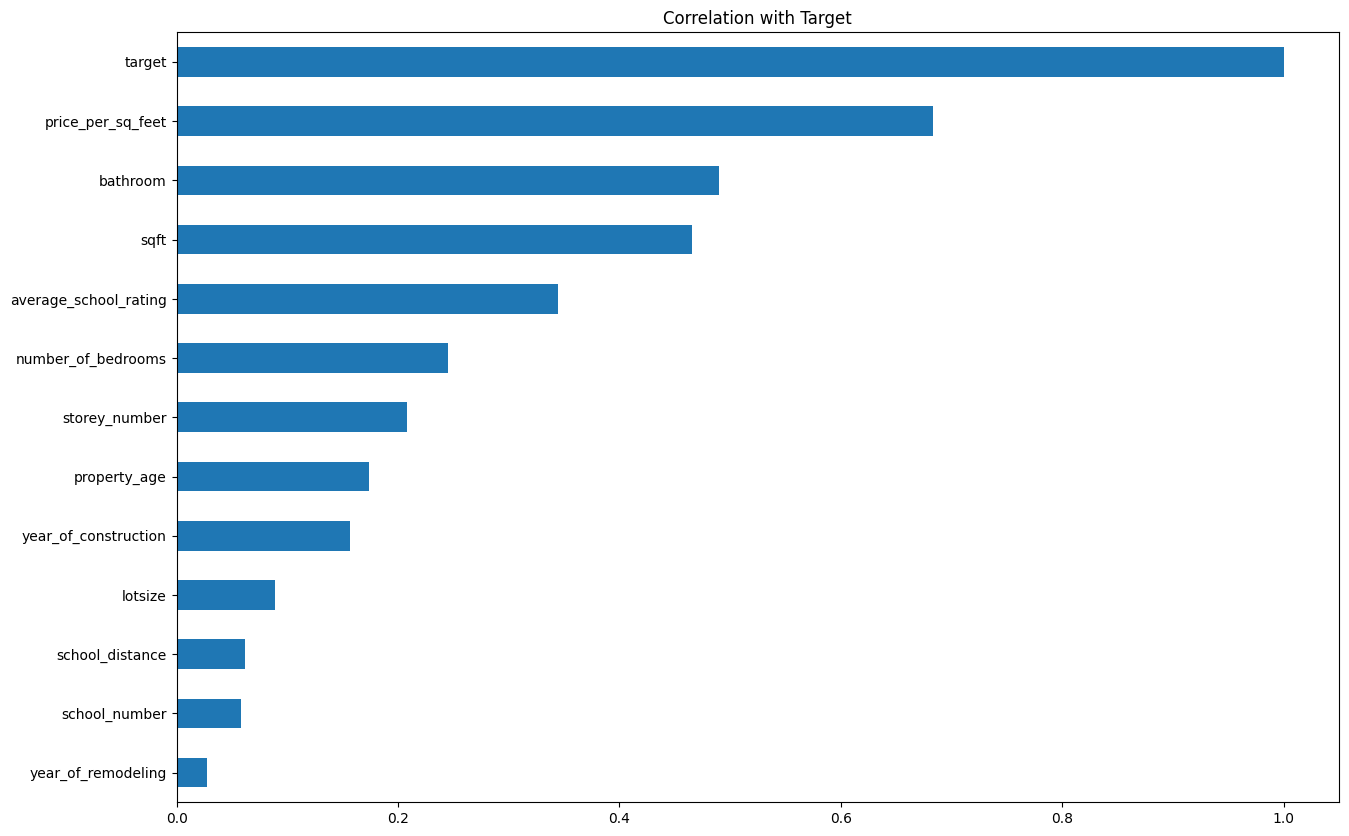

In [410]:
fig = plt.subplots(figsize=(15, 10))
matrix_corr_s['target'].apply(lambda x: abs(x)).sort_values().plot.barh()
plt.title('Correlation with Target')
plt.show()

### **STATISTICAL TESTING**

In [411]:
#set significance level
alpha = 0.05 
print(f'significance level = {alpha:.2f}')

significance level = 0.05


In [412]:
#function for p-value for normality testing
def decision_normality(p):
    print(f'p-value = {p:.3f}')
    if p <= alpha:
        print(f'p-value {p:.3f} is less than alpha {alpha:.3f}, asymmetric distribution')
    else:
        print(f'p-value {p:.3f} is greater than alpha {alpha:.3f}, normal distribution')


#function for Anderson Darling normality testing
def anderson_darling(x):
    for i in range(len(x.critical_values)):
        sig_lev, crit_val = x.significance_level[i], x.critical_values[i]
        if x.statistic < crit_val:
            print(f'normal distribution: {crit_val} critical value at {sig_lev}% significance level')
        else:
            print(f'asymmetric distribution: {crit_val} critical value at {sig_lev}% significance level')


#function for p-value comparison for hypothesis testing
def decision_hypothesis(p):
    print(f'p-value = {p:.3f}')
    if p <= alpha:
        print(f'p-value {p:.3f} is less than alpha {alpha:.3f}, reject NULL hypothesis in favor of the ALTERNATIVE')
    else:
        print(f'p-value {p:.3f} is greater than alpha {alpha:.3f}, no reason to reject NULL hypothesis')

a few tests only as no time to explore more options

#### DOES LOCATION AFFECT THE PROPERTY VALUE?

*Null Hypothesis* ($H_0$): property location does not affect the property value \
Northeast-Pennsylvania ($μ_1$), Midwest-Michigan ($μ_2$), South-Florida ($μ_3$), West-Arizona ($μ_4$).

$$ H_0 : μ_1 = μ_2 = μ_3 = μ_4$$

*Alternative Hypothesis* ($H_1$): property location affects the property value \
Northeast-Pennsylvania ($μ_1$), Midwest-Michigan ($μ_2$), South-Florida ($μ_3$), West-Arizona ($μ_4$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq μ_4$$

##### **Normality Check**

Using the Shapiro-Wilk test, check whether the feature is normally distributed:

*Null Hypothesis* ($H_0$): the data distribution is normal.

*Alternative Hypothesis* ($H_1$): the data distribution is different from normal.

In [413]:
#obtain the sample by state
northeast_pa = data.loc[data['state'] == 'PA', 'target']
midwest_mi = data.loc[data['state'] == 'MI', 'target']
south_fl = data.loc[data['state'] == 'FL', 'target']
west_az = data.loc[data['state'] == 'AZ', 'target']

#execute Shapiro-Wilk
print('Northeast, Pennsylvania:')
result = stats.shapiro(northeast_pa)
decision_normality(result[1])
print()

print('Midwest, Michigan:')
result = stats.shapiro(midwest_mi)
decision_normality(result[1])
print()

print('South, Florida:')
result = stats.shapiro(south_fl)
decision_normality(result[1])

print('West, Arizona:')
result = stats.shapiro(west_az)
decision_normality(result[1])

Northeast, Pennsylvania:
p-value = 0.000
p-value 0.000 is less than alpha 0.050, asymmetric distribution

Midwest, Michigan:
p-value = 0.000
p-value 0.000 is less than alpha 0.050, asymmetric distribution

South, Florida:
p-value = 0.000
p-value 0.000 is less than alpha 0.050, asymmetric distribution
West, Arizona:
p-value = 0.000
p-value 0.000 is less than alpha 0.050, asymmetric distribution


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



Using the Anderson-Darling test, check whether the feature is normally distributed:

*Null Hypothesis* ($H_0$): the data distribution is normal.

*Alternative Hypothesis* ($H_1$): the data distribution is different from normal.

In [414]:
#execute Anderson-Darling
print('Northeast, Pennsylvania:')
result = stats.anderson(northeast_pa)
print('stat=%.3f' % (result.statistic))

#interpret the result
anderson_darling(result)
print()


print('Midwest, Michigan:')
result = stats.anderson(midwest_mi)
print('stat=%.3f' % (result.statistic))

#interpret the result
anderson_darling(result)
print()


print('South, Florida:')
result = stats.anderson(south_fl)
print('stat=%.3f' % (result.statistic))

#interpret the result
anderson_darling(result)
print()


print('West, Arizona:')
result = stats.anderson(west_az)
print('stat=%.3f' % (result.statistic))

#interpret the result
anderson_darling(result)

Northeast, Pennsylvania:
stat=123.122
asymmetric distribution: 0.575 critical value at 15.0% significance level
asymmetric distribution: 0.655 critical value at 10.0% significance level
asymmetric distribution: 0.786 critical value at 5.0% significance level
asymmetric distribution: 0.917 critical value at 2.5% significance level
asymmetric distribution: 1.091 critical value at 1.0% significance level

Midwest, Michigan:
stat=299.915
asymmetric distribution: 0.575 critical value at 15.0% significance level
asymmetric distribution: 0.655 critical value at 10.0% significance level
asymmetric distribution: 0.786 critical value at 5.0% significance level
asymmetric distribution: 0.917 critical value at 2.5% significance level
asymmetric distribution: 1.091 critical value at 1.0% significance level

South, Florida:
stat=1954.942
asymmetric distribution: 0.576 critical value at 15.0% significance level
asymmetric distribution: 0.656 critical value at 10.0% significance level
asymmetric distr

Testing for equality of variances between data samples:

In [415]:
#execute Levene Test for variance equality
result = stats.levene(northeast_pa, midwest_mi, south_fl, west_az)
pv = result[1]
print(f'p-value = {pv:.3f}')

#interpret the result
if pv <= alpha:
    print('unequal variance, non-parametric tests must be used')
else:
    print('equal variance, parametric tests can be used')
print()

p-value = 0.000
unequal variance, non-parametric tests must be used



In [416]:
#Bartlett's Test
test_statistic, p_value = stats.bartlett(northeast_pa, midwest_mi, south_fl, west_az)

print(f'{test_statistic:.7f}, {p_value:.7f}')

#interpret the result
if p_value <= alpha:
    print('unequal variance, non-parametric tests must be used')
else:
    print('equal variance, parametric tests can be used')
print()

1385.2528059, 0.0000000
unequal variance, non-parametric tests must be used



##### **Suitable Statistical Test**

**select a suitable statistical test**

To select the required test, we will use the test selection algorithm:
* Feature type: State - quantitative;
* Number of Analyzed Groups: 4;
* Dependence of Groups: independent;
* Normal Distribution: no;
* Equal Variance: no.

To test our hypothesis, we can use **Kruskal-Wallis** to compare distributions based on ranks.

In [417]:
#Kruskal-Wallis Test
_, p = stats.kruskal(northeast_pa, midwest_mi, south_fl, west_az)

#interpret the result
decision_hypothesis(p)

p-value = 0.000
p-value 0.000 is less than alpha 0.050, reject NULL hypothesis in favor of the ALTERNATIVE


**Comment**:

- selected states from all four regions in the United States
- logical, reasonable result that shows that the location of the property does affect the property value
- future tests can be more specific: can find whether properties in a particular state cost more than the rest
- the likely case is that properties located alongside the coastline such as New York, Florida, California are more expensive as they are more densely populated with better economies

#### HOMES OF CLASS B (BETWEEN 30 AND 65) HAVE LOWER PROPERTY VALUE THAN HOMES OF CLASS A (AGE < 30)

*Null Hypothesis* ($H_0$): homes of Class B ($μ_1$) have higher property value or are equal in property value to homes of Class A ($μ_2$) \

$$ H_0 : μ_1 => μ_2$$

*Alternative Hypothesis* ($H_1$): homes of Class B ($μ_1$) have lower property value than homes of Class A ($μ_2$).

$$ H_1 : μ_1 < μ_2 $$

##### **Normality Check**

Using the Shapiro-Wilk test, check whether the feature is normally distributed:

*Null Hypothesis* ($H_0$): the data distribution is normal.

*Alternative Hypothesis* ($H_1$): the data distribution is different from normal.

In [418]:
#obtain the sample by property age group
classA = data.loc[data['property_age_group'] == 'Class A', 'target']
classB = data.loc[data['property_age_group'] == 'Class B', 'target']


#execute Shapiro-Wilk
print('Class A:')
result = stats.shapiro(classA)
decision_normality(result[1])
print()

print('Class B:')
result = stats.shapiro(classB)
decision_normality(result[1])

Class A:
p-value = 0.000
p-value 0.000 is less than alpha 0.050, asymmetric distribution

Class B:
p-value = 0.000
p-value 0.000 is less than alpha 0.050, asymmetric distribution


Using the Anderson-Darling test, check whether the feature is normally distributed:

*Null Hypothesis* ($H_0$): the data distribution is normal.

*Alternative Hypothesis* ($H_1$): the data distribution is different from normal.

In [419]:
#execute Anderson-Darling
print('Class A:')
result = stats.anderson(classA)
print('stat=%.3f' % (result.statistic))

#interpret the result
anderson_darling(result)
print()


print('Class B:')
result = stats.anderson(classB)
print('stat=%.3f' % (result.statistic))

#interpret the result
anderson_darling(result)

Class A:
stat=2639.160
asymmetric distribution: 0.576 critical value at 15.0% significance level
asymmetric distribution: 0.656 critical value at 10.0% significance level
asymmetric distribution: 0.787 critical value at 5.0% significance level
asymmetric distribution: 0.918 critical value at 2.5% significance level
asymmetric distribution: 1.092 critical value at 1.0% significance level

Class B:
stat=2438.071
asymmetric distribution: 0.576 critical value at 15.0% significance level
asymmetric distribution: 0.656 critical value at 10.0% significance level
asymmetric distribution: 0.787 critical value at 5.0% significance level
asymmetric distribution: 0.918 critical value at 2.5% significance level
asymmetric distribution: 1.092 critical value at 1.0% significance level


Testing for equality of variances between data samples:

In [420]:
#execute Levene Test for variance equality
result = stats.levene(classA, classB)
pv = result[1]
print(f'p-value = {pv:.3f}')

#interpret the result
if pv <= alpha:
    print('unequal variance, non-parametric tests must be used')
else:
    print('equal variance, parametric tests can be used')
print()

p-value = 0.000
unequal variance, non-parametric tests must be used



In [421]:
#Bartlett's Test
test_statistic, p_value = stats.bartlett(classA, classB)

print(f'{test_statistic:.7f}, {p_value:.7f}')

#interpret the result
if p_value <= alpha:
    print('unequal variance, non-parametric tests must be used')
else:
    print('equal variance, parametric tests can be used')
print()

14.6667538, 0.0001283
unequal variance, non-parametric tests must be used



##### **Suitable Statistical Test**

**select a suitable statistical test**

To select the required test, we will use the test selection algorithm:
* Feature type: Property Age Group - quantitative;
* Number of Analyzed Groups: 2;
* Dependence of Groups: independent;
* Normal Distribution: no;
* Equal Variance: no.

To test our hypothesis, we can use **Mann-Whitney** to compare distributions based on ranks.

In [422]:
#Mann Whitney U-Test
_, p = stats.mannwhitneyu(classB, classA,
                          alternative='less')

#interpret the result
decision_hypothesis(p)

p-value = 0.000
p-value 0.000 is less than alpha 0.050, reject NULL hypothesis in favor of the ALTERNATIVE


**Comment**:

- selected homes part of two property age groups: built less than 30 years ago and built between 30 and 65 years ago
- logical, reasonable result that shows that modern homes are likely to cost more
- must be noted that the property age feature was originally transformed in such a way that if the property has undergone remodelling / repairs, then the property age is updated to CURRENT YEAR - REMODELLING YEAR rather than CONSTRUCTION YEAR - but this doesn't take away from the logic that more modern or recently repaired homes will cost more than the alternative

#### HOMES WITH HEATING HAVE HIGHER PROPERTY VALUE THAN HOMES WITHOUT

*Null Hypothesis* ($H_0$): homes with heating options ($μ_1$) have lower or equal property value than homes without ($μ_2$).

$$ H_0 : μ_1 <= μ_2$$

*Alternative Hypothesis* ($H_1$): homes with heating options ($μ_1$) have higher property value than homes without ($μ_2$).

$$ H_1 : μ_1 > μ_2$$

##### **Normality Check**

Using the Shapiro-Wilk test, check whether the feature is normally distributed:

*Null Hypothesis* ($H_0$): the data distribution is normal.

*Alternative Hypothesis* ($H_1$): the data distribution is different from normal.

In [423]:
#obtain the sample by availability_of_heating
with_heating = data.loc[data['availability_of_heating'] == 'heating', 'target']
without_heating = data.loc[data['availability_of_heating'] == 'no heating', 'target']


#execute Shapiro-Wilk
print('With Heating:')
result = stats.shapiro(with_heating)
decision_normality(result[1])
print()

print('Without Heating:')
result = stats.shapiro(without_heating)
decision_normality(result[1])

With Heating:
p-value = 0.000
p-value 0.000 is less than alpha 0.050, asymmetric distribution

Without Heating:
p-value = 0.000
p-value 0.000 is less than alpha 0.050, asymmetric distribution


Using the Anderson-Darling test, check whether the feature is normally distributed:

*Null Hypothesis* ($H_0$): the data distribution is normal.

*Alternative Hypothesis* ($H_1$): the data distribution is different from normal.

In [424]:
#execute Anderson-Darling
print('With Heating:')
result = stats.anderson(with_heating)
print('stat=%.3f' % (result.statistic))

#interpret the result
anderson_darling(result)
print()


print('Without Heating:')
result = stats.anderson(without_heating)
print('stat=%.3f' % (result.statistic))

#interpret the result
anderson_darling(result)

With Heating:
stat=4052.245
asymmetric distribution: 0.576 critical value at 15.0% significance level
asymmetric distribution: 0.656 critical value at 10.0% significance level
asymmetric distribution: 0.787 critical value at 5.0% significance level
asymmetric distribution: 0.918 critical value at 2.5% significance level
asymmetric distribution: 1.092 critical value at 1.0% significance level

Without Heating:
stat=1367.534
asymmetric distribution: 0.576 critical value at 15.0% significance level
asymmetric distribution: 0.656 critical value at 10.0% significance level
asymmetric distribution: 0.787 critical value at 5.0% significance level
asymmetric distribution: 0.918 critical value at 2.5% significance level
asymmetric distribution: 1.092 critical value at 1.0% significance level


Testing for equality of variances between data samples:

In [425]:
#execute Levene Test for variance equality
result = stats.levene(with_heating, without_heating)
pv = result[1]
print(f'p-value = {pv:.3f}')

#interpret the result
if pv <= alpha:
    print('unequal variance, non-parametric tests must be used')
else:
    print('equal variance, parametric tests can be used')
print()

p-value = 0.000
unequal variance, non-parametric tests must be used



In [426]:
#Bartlett's Test
test_statistic, p_value = stats.bartlett(with_heating, without_heating)

print(f'{test_statistic:.7f}, {p_value:.7f}')

#interpret the result
if p_value <= alpha:
    print('unequal variance, non-parametric tests must be used')
else:
    print('equal variance, parametric tests can be used')
print()

9.0075266, 0.0026887
unequal variance, non-parametric tests must be used



##### **Suitable Statistical Test**

**select a suitable statistical test**

To select the required test, we will use the test selection algorithm:
* Feature type: Heating Options - quantitative;
* Number of Analyzed Groups: 2;
* Dependence of Groups: independent;
* Normal Distribution: no;
* Equal Variance: no.

To test our hypothesis, we can use **Mann-Whitney** to compare distributions based on ranks.

In [427]:
#Mann Whitney U-Test
_, p = stats.mannwhitneyu(with_heating, without_heating,
                          alternative='greater')

#interpret the result
decision_hypothesis(p)

p-value = 0.888
p-value 0.888 is greater than alpha 0.050, no reason to reject NULL hypothesis


**Comment**:

- selected homes with heating options and without heating options
- surprising result, but it looks like it doesn't seem to matter for buyers whether the property is equipted with heating options or not
- further analysis is needed by state, i.e. homes located in warmer climates would skew the result even further

### **DATA ENCODING**

In [428]:
#without encoding
primary_data = data.copy()

#with encoding
encoded_data = data.copy()

In [429]:
primary_data.shape, encoded_data.shape

((232388, 41), (232388, 41))

##### SPLIT FEATURES WITH GROUPS

In [430]:
#binary features
binary_features = ['private_pool',
                   'multiple_listings',
                   'availability_of_heating', 'availability_of_cooling', 'availability_of_fireplace']

#binary features
encoded_data['private_pool'] = encoded_data['private_pool'].apply(lambda x: 0 if x == 'no' else 1)
encoded_data['availability_of_fireplace'] = encoded_data['availability_of_fireplace'].apply(lambda x: 0 if x == 'no' else 1)
encoded_data['multiple_listings'] = encoded_data['multiple_listings'].apply(lambda x: 0 if x == 'no' else 1)
encoded_data['availability_of_heating'] = encoded_data['availability_of_heating'].apply(lambda x: 0 if x == 'no heating' else 1)
encoded_data['availability_of_cooling'] = encoded_data['availability_of_cooling'].apply(lambda x: 0 if x == 'no cooling' else 1)

In [431]:
label_encoder = preprocessing.LabelEncoder()

#ordinal features
ordinal_features = ['listing_status',
                    'school_ages', 'school_number_group', 'school_distance_group',
                    'storeys_group',
                    'bedroom_group', 'bathroom_group',
                    'property_age_group',
                    'sqft_group', 'lotsize_group',
                    'price_sqft_group']

#label encoding for ordinal categorical features
for col in ordinal_features:
    encoded_data[col] = label_encoder.fit_transform(encoded_data[col])

tried to do one-hot encoding, but it created thousands of features, and I ran out of application memory; perhaps on a different machine encoding nominal features property can work, but not on mine, so have to use label encoding as well

In [432]:
#nominal features
nominal_features = ['zipcode', 'state', 'city_name',
                    'property_group', 'property_type',
                    'type_of_heating_system', 'source_of_heat',
                    'type_of_cooling_system', 'source_of_cool',
                    'parking_availability', 'parking_type',
                    'type_of_fireplace']

#label encoding for nominal features
for col in nominal_features:
    encoded_data[col] = label_encoder.fit_transform(encoded_data[col])

In [433]:
#consolidate encoded features into one
e_lists = binary_features + ordinal_features + nominal_features

In [434]:
encoded_clms = [column for column in encoded_data.columns if (column in e_lists or column == 'target')]

In [435]:
encoded_data = encoded_data[encoded_clms]

In [436]:
with pd.ExcelWriter('output/post_data_encoding_data.xlsx') as writer:
    encoded_data.to_excel(writer,
                          index=False,
                          header=True)

##### SPLIT FEATURES WITH NUMERICALS

In [437]:
#binary features
primary_data['private_pool'] = primary_data['private_pool'].apply(lambda x: 0 if x == 'no' else 1)
primary_data['availability_of_fireplace'] = primary_data['availability_of_fireplace'].apply(lambda x: 0 if x == 'no' else 1)
primary_data['multiple_listings'] = primary_data['multiple_listings'].apply(lambda x: 0 if x == 'no' else 1)
primary_data['availability_of_heating'] = primary_data['availability_of_heating'].apply(lambda x: 0 if x == 'no heating' else 1)
primary_data['availability_of_cooling'] = primary_data['availability_of_cooling'].apply(lambda x: 0 if x == 'no cooling' else 1)

In [438]:
#ordinal feature
ordinal_feature = ['listing_status']

#label encoding for ordinal categorical features
for col in ordinal_feature:
    primary_data[col] = label_encoder.fit_transform(primary_data[col])

In [439]:
n_clms = ['number_of_bedrooms', 'bathroom',
           'price_per_sq_feet', 'sqft', 'lotsize',
           'average_school_rating', 'school_number', 'school_distance',
           'storey_number',
           'property_age',
           'target'
           ]

In [440]:
n_lists = binary_features + ordinal_feature + n_clms

In [441]:
primary_data = primary_data[n_lists]

In [442]:
with pd.ExcelWriter('output/primary_modeling_data.xlsx') as writer:
    primary_data.to_excel(writer,
                          index=False,
                          header=True)

### **FEATURE SELECTION**

In [443]:
primary_data = pd.read_excel('output/primary_modeling_data.xlsx')
encoded_data = pd.read_excel('output/post_data_encoding_data.xlsx')

primary_orig_data = pd.read_excel('output/primary_modeling_data.xlsx')

#### **OPTION ONE**: WITH ENCODED DATA

In [444]:
#feature selection
y_e = encoded_data.target.values
X_e = encoded_data.drop(['target'],
                        axis=1)

#divide the data into train and test
X_train_e, X_test_e, y_train_e, y_test_e = model_selection.train_test_split(
    X_e, y_e,
    test_size=0.3,
    random_state=42
)

X_train_e.shape, X_test_e.shape, y_train_e.shape, y_test_e.shape

((162671, 28), (69717, 28), (162671,), (69717,))

##### LINEAR REGRESSION

In [445]:
#create an object class
lr_model = linear_model.LinearRegression()

#set the start_time
start_time = time.time()

#model learning
lr_model.fit(X_train_e, y_train_e)

#calculate the model learning time
model_time = round(time.time() - start_time, 2)

#make a prediction
y_test_pred_lr_e = lr_model.predict(X_test_e)

#display the metrics
print(f'MAE: {np.round(metrics.mean_absolute_error(y_test_e, y_test_pred_lr_e), 3)}')
print(f'MSE: {np.round(metrics.mean_squared_error(y_test_e, y_test_pred_lr_e), 3)}')
print(f'MAPE: {np.round(metrics.mean_absolute_percentage_error(y_test_e, y_test_pred_lr_e), 3)}')
print(f'R2: {np.round(metrics.r2_score(y_test_e, y_test_pred_lr_e), 3)}')

MAE: 144688.467
MSE: 38809164409.469
MAPE: 1.4386204760785908e+19
R2: 0.311


In [446]:
#add model results to the ordered dict
review['model'].append('linear regression')
review['type'].append('baseline')
review['features'].append('encoded')
review['hyperparameters'].append(None)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_e, y_test_pred_lr_e): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_e, y_test_pred_lr_e): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_e, y_test_pred_lr_e): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_e, y_test_pred_lr_e): .3f}')

**Recursive Feature Elimination (RFE) for Feature Selection**

In [447]:
#create the object class
lr_model_rfe = linear_model.LinearRegression()

#find the best features using RFE
selector_rfe = feature_selection.RFE(lr_model_rfe,
                                     n_features_to_select=10,
                                     step=1)

#model learning
selector_rfe.fit(X_train_e, y_train_e)

#display the selected features
rfe_columns = list(selector_rfe.get_feature_names_out())
rfe_columns

['private_pool',
 'availability_of_fireplace',
 'property_group',
 'availability_of_heating',
 'availability_of_cooling',
 'parking_availability',
 'storeys_group',
 'bedroom_group',
 'sqft_group',
 'price_sqft_group']

In [448]:
#regression learning on RFE
X_train_rfe = X_train_e[rfe_columns]
X_test_rfe = X_test_e[rfe_columns]

#create an object class
lr_model = linear_model.LinearRegression()

#set the start_time
start_time = time.time()

#model learning
lr_model.fit(X_train_rfe, y_train_e)

#calculate the model learning time
model_time = round(time.time() - start_time, 2)

#make a prediction
y_test_pred_rfe = lr_model.predict(X_test_rfe)

#display the metrics
print(f'MAE: {metrics.mean_absolute_error(y_test_e, y_test_pred_rfe): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_e, y_test_pred_rfe): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_e, y_test_pred_rfe): .3f}')
print(f'R2: {metrics.r2_score(y_test_e, y_test_pred_rfe): .3f}')

MAE:  145986.944
MSE:  39712751837.224
MAPE:  14423168341148393472.000
R2:  0.295


In [449]:
#add model results to the ordered dict
review['model'].append('linear regression')
review['type'].append('RFE')
review['features'].append(rfe_columns)
review['hyperparameters'].append(None)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_e, y_test_pred_rfe): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_e, y_test_pred_rfe): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_e, y_test_pred_rfe): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_e, y_test_pred_rfe): .3f}')

**SelectKBest for Feature Selection**

In [450]:
#find the best features using KBest
selector_kbest = feature_selection.SelectKBest(feature_selection.f_regression,
                                               k=10)

#model learning
selector_kbest.fit(X_train_e, y_train_e)

#display the selected features
kbest_columns = list(selector_kbest.get_feature_names_out())
kbest_columns

['zipcode',
 'private_pool',
 'type_of_fireplace',
 'availability_of_fireplace',
 'property_group',
 'parking_availability',
 'bedroom_group',
 'property_age_group',
 'sqft_group',
 'price_sqft_group']

In [451]:
#regression learning on KBest
X_train_kbest = X_train_e[kbest_columns]
X_test_kbest = X_test_e[kbest_columns]

#create an object class
lr_model = linear_model.LinearRegression()

#set the start_time
start_time = time.time()

#model learning
lr_model.fit(X_train_kbest, y_train_e)

#calculate the model learning time
model_time = round(time.time() - start_time, 2)

#make a prediction
y_test_pred_kbest = lr_model.predict(X_test_kbest)

#display the metrics
print(f'MAE: {metrics.mean_absolute_error(y_test_e, y_test_pred_kbest): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_e, y_test_pred_kbest): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_e, y_test_pred_kbest): .3f}')
print(f'R2: {metrics.r2_score(y_test_e, y_test_pred_kbest): .3f}')

MAE:  145077.598
MSE:  39468480817.355
MAPE:  14521343825606107136.000
R2:  0.299


In [452]:
#add model results to the ordered dict
review['model'].append('linear regression')
review['type'].append('KBest')
review['features'].append(kbest_columns)
review['hyperparameters'].append(None)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_e, y_test_pred_kbest): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_e, y_test_pred_kbest): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_e, y_test_pred_kbest): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_e, y_test_pred_kbest): .3f}')

##### RANDOM FOREST REGRESSOR

In [453]:
#create an object class
rf_model = ensemble.RandomForestRegressor()

#set the start_time
start_time = time.time()

#model learning
rf_model.fit(X_train_e, y_train_e)

#calculate the model learning time
model_time = round(time.time() - start_time, 2)

#make a prediction
y_test_pred_rf_e = rf_model.predict(X_test_e)

In [454]:
#display the metrics
print(f'MAE: {metrics.mean_absolute_error(y_test_e, y_test_pred_rf_e): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_e, y_test_pred_rf_e): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_e, y_test_pred_rf_e): .3f}')
print(f'R2: {metrics.r2_score(y_test_e, y_test_pred_rf_e): .3f}')

MAE:  59150.798
MSE:  8646517247.976
MAPE:  6303895112913257472.000
R2:  0.846


In [455]:
#add model results to the ordered dict
review['model'].append('random forest regressor')
review['type'].append('baseline')
review['features'].append('encoded')
review['hyperparameters'].append(None)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_e, y_test_pred_rf_e): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_e, y_test_pred_rf_e): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_e, y_test_pred_rf_e): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_e, y_test_pred_rf_e): .3f}')

not using **RFE** as it takes too long to execute

**SelectKBest for Feature Selection**

In [456]:
#find the best features using KBest
selector_kbest = feature_selection.SelectKBest(feature_selection.f_regression,
                                               k=10)

#model learning
selector_kbest.fit(X_train_e, y_train_e)

#display the selected features
kbest_columns = list(selector_kbest.get_feature_names_out())
kbest_columns

['zipcode',
 'private_pool',
 'type_of_fireplace',
 'availability_of_fireplace',
 'property_group',
 'parking_availability',
 'bedroom_group',
 'property_age_group',
 'sqft_group',
 'price_sqft_group']

In [457]:
#regression learning on KBest
X_train_kbest = X_train_e[kbest_columns]
X_test_kbest = X_test_e[kbest_columns]

#create an object class
rf_model = ensemble.RandomForestRegressor()

#set the start_time
start_time = time.time()

#model learning
rf_model.fit(X_train_kbest, y_train_e)

#calculate the model learning time
model_time = round(time.time() - start_time, 2)

#make a prediction
y_test_pred_kbest = rf_model.predict(X_test_kbest)

#display the metrics
print(f'MAE: {metrics.mean_absolute_error(y_test_e, y_test_pred_kbest): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_e, y_test_pred_kbest): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_e, y_test_pred_kbest): .3f}')
print(f'R2: {metrics.r2_score(y_test_e, y_test_pred_kbest): .3f}')

MAE:  65559.826
MSE:  10856963689.874
MAPE:  7302749266620682240.000
R2:  0.807


In [458]:
#add model results to the ordered dict
review['model'].append('random forest regressor')
review['type'].append('KBest')
review['features'].append(kbest_columns)
review['hyperparameters'].append(None)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_e, y_test_pred_kbest): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_e, y_test_pred_kbest): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_e, y_test_pred_kbest): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_e, y_test_pred_kbest): .3f}')

#### **OPTION TWO**: WITH PRIMARY (NUMERICAL) DATA

In [459]:
#feature selection
y_n = primary_data.target.values
X_n = primary_data.drop(['target'],
                        axis=1)

#divide the data into train and test
X_train_n, X_test_n, y_train_n, y_test_n = model_selection.train_test_split(
    X_n, y_n,
    test_size=0.3,
    random_state=42
)

X_train_n.shape, X_test_n.shape, y_train_n.shape, y_test_n.shape

((162671, 16), (69717, 16), (162671,), (69717,))

##### LINEAR REGRESSION

In [460]:
#create an object class
lr_model = linear_model.LinearRegression()

#set the start_time
start_time = time.time()

#model learning
lr_model.fit(X_train_n, y_train_n)

#calculate the model learning time
model_time = round(time.time() - start_time, 2)

#make a prediction
y_test_pred_lr_n = lr_model.predict(X_test_n)

#display the metrics
print(f'MAE: {np.round(metrics.mean_absolute_error(y_test_n, y_test_pred_lr_n), 3)}')
print(f'MSE: {np.round(metrics.mean_squared_error(y_test_n, y_test_pred_lr_n), 3)}')
print(f'MAPE: {np.round(metrics.mean_absolute_percentage_error(y_test_n, y_test_pred_lr_n), 3)}')
print(f'R2: {np.round(metrics.r2_score(y_test_n, y_test_pred_lr_n), 3)}')

MAE: 142297.035
MSE: 35335121381.197
MAPE: 9.078573909770925e+18
R2: 0.373


- negative r-squared score indicates that the model performs worse than simply predicting the mean of the target variable
- in future iterations can possibly use polynomial regression to improve model fit and potentially address the negative r-squared score, but it's not a guaranteed fix

In [461]:
#add model results to the ordered dict
review['model'].append('linear regression')
review['type'].append('baseline')
review['features'].append('encoded numerical')
review['hyperparameters'].append(None)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_n, y_test_pred_lr_n): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_n, y_test_pred_lr_n): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_n, y_test_pred_lr_n): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_n, y_test_pred_lr_n): .3f}')

**Recursive Feature Elimination (RFE) for Feature Selection**

In [462]:
#create the object class
lr_model_rfe = linear_model.LinearRegression()

#find the best features using RFE
selector_rfe = feature_selection.RFE(lr_model_rfe,
                                     n_features_to_select=10,
                                     step=1)

#model learning
selector_rfe.fit(X_train_n, y_train_n)

#display the selected features
rfe_columns = list(selector_rfe.get_feature_names_out())
rfe_columns

['private_pool',
 'multiple_listings',
 'availability_of_heating',
 'availability_of_cooling',
 'availability_of_fireplace',
 'listing_status',
 'number_of_bedrooms',
 'bathroom',
 'average_school_rating',
 'storey_number']

In [463]:
#regression learning on RFE
X_train_rfe = X_train_n[rfe_columns]
X_test_rfe = X_test_n[rfe_columns]

#create an object class
lr_model = linear_model.LinearRegression()

#set the start_time
start_time = time.time()

#model learning
lr_model.fit(X_train_rfe, y_train_n)

#calculate the model learning time
model_time = round(time.time() - start_time, 2)

#make a prediction
y_test_pred_rfe = lr_model.predict(X_test_rfe)

#display the metrics
print(f'MAE: {metrics.mean_absolute_error(y_test_n, y_test_pred_rfe): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_n, y_test_pred_rfe): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_n, y_test_pred_rfe): .3f}')
print(f'R2: {metrics.r2_score(y_test_n, y_test_pred_rfe): .3f}')

MAE:  154098.843
MSE:  41094007827.814
MAPE:  9792836800776019968.000
R2:  0.270


- negative r-squared score indicates that the model performs worse than simply predicting the mean of the target variable
- in future iterations can possibly use polynomial regression to improve model fit and potentially address the negative r-squared score, but it's not a guaranteed fix

In [464]:
#add model results to the ordered dict
review['model'].append('linear regression')
review['type'].append('RFE')
review['features'].append(rfe_columns)
review['hyperparameters'].append(None)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_n, y_test_pred_rfe): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_n, y_test_pred_rfe): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_n, y_test_pred_rfe): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_n, y_test_pred_rfe): .3f}')

**SelectKBest for Feature Selection**

In [465]:
#find the best features using KBest
selector_kbest = feature_selection.SelectKBest(feature_selection.f_regression,
                                               k=10)

#model learning
selector_kbest.fit(X_train_n, y_train_n)

#display the selected features
kbest_columns = list(selector_kbest.get_feature_names_out())
kbest_columns

['private_pool',
 'multiple_listings',
 'availability_of_fireplace',
 'number_of_bedrooms',
 'bathroom',
 'price_per_sq_feet',
 'average_school_rating',
 'school_number',
 'storey_number',
 'property_age']

In [466]:
#regression learning on KBest
X_train_kbest = X_train_n[kbest_columns]
X_test_kbest = X_test_n[kbest_columns]

#create an object class
lr_model = linear_model.LinearRegression()

#set the start_time
start_time = time.time()

#model learning
lr_model.fit(X_train_kbest, y_train_n)

#calculate the model learning time
model_time = round(time.time() - start_time, 2)

#make a prediction
y_test_pred_kbest = lr_model.predict(X_test_kbest)

#display the metrics
print(f'MAE: {metrics.mean_absolute_error(y_test_n, y_test_pred_kbest): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_n, y_test_pred_kbest): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_n, y_test_pred_kbest): .3f}')
print(f'R2: {metrics.r2_score(y_test_n, y_test_pred_kbest): .3f}')

MAE:  142560.923
MSE:  35250267773.677
MAPE:  8989820510399233024.000
R2:  0.374


- negative r-squared score indicates that the model performs worse than simply predicting the mean of the target variable
- in future iterations can possibly use polynomial regression to improve model fit and potentially address the negative r-squared score, but it's not a guaranteed fix

In [467]:
#add model results to the ordered dict
review['model'].append('linear regression')
review['type'].append('KBest')
review['features'].append(kbest_columns)
review['hyperparameters'].append(None)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_n, y_test_pred_kbest): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_n, y_test_pred_kbest): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_n, y_test_pred_kbest): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_n, y_test_pred_kbest): .3f}')

##### RANDOM FOREST

In [468]:
#create an object class
rf_model = ensemble.RandomForestRegressor()

#set the start_time
start_time = time.time()

#model learning
rf_model.fit(X_train_n, y_train_n)

#calculate the model learning time
model_time = round(time.time() - start_time, 2)

#make a prediction
y_test_pred_rf_n = rf_model.predict(X_test_n)

In [469]:
#display the metrics
print(f'MAE: {metrics.mean_absolute_error(y_test_n, y_test_pred_rf_n): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_n, y_test_pred_rf_n): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_n, y_test_pred_rf_n): .3f}')
print(f'R2: {metrics.r2_score(y_test_n, y_test_pred_rf_n): .3f}')

MAE:  10035.491
MSE:  2230236514.329
MAPE:  7921710150269377536.000
R2:  0.960


In [470]:
#add model results to the ordered dict
review['model'].append('random forest regressor')
review['type'].append('baseline')
review['features'].append('encoded numerical')
review['hyperparameters'].append(None)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_n, y_test_pred_rf_n): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_n, y_test_pred_rf_n): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_n, y_test_pred_rf_n): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_n, y_test_pred_rf_n): .3f}')

not using **RFE** as it takes too long to execute

**SelectKBest for Feature Selection**

In [471]:
#find the best features using KBest
selector_kbest = feature_selection.SelectKBest(feature_selection.f_regression,
                                               k=10)

#model learning
selector_kbest.fit(X_train_n, y_train_n)

#display the selected features
kbest_columns = list(selector_kbest.get_feature_names_out())
kbest_columns

['private_pool',
 'multiple_listings',
 'availability_of_fireplace',
 'number_of_bedrooms',
 'bathroom',
 'price_per_sq_feet',
 'average_school_rating',
 'school_number',
 'storey_number',
 'property_age']

In [472]:
#regression learning on KBest
X_train_kbest = X_train_n[kbest_columns]
X_test_kbest = X_test_n[kbest_columns]

#create an object class
rf_model = ensemble.RandomForestRegressor()

#set the start_time
start_time = time.time()

#model learning
rf_model.fit(X_train_kbest, y_train_n)

#calculate the model learning time
model_time = round(time.time() - start_time, 2)

#make a prediction
y_test_pred_kbest = rf_model.predict(X_test_kbest)

#display the metrics
print(f'MAE: {metrics.mean_absolute_error(y_test_n, y_test_pred_kbest): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_n, y_test_pred_kbest): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_n, y_test_pred_kbest): .3f}')
print(f'R2: {metrics.r2_score(y_test_n, y_test_pred_kbest): .3f}')

MAE:  65015.100
MSE:  10253968001.228
MAPE:  8418420037650186240.000
R2:  0.818


In [473]:
#add model results to the ordered dict
review['model'].append('random forest regressor')
review['type'].append('KBest')
review['features'].append(kbest_columns)
review['hyperparameters'].append(None)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_n, y_test_pred_kbest): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_n, y_test_pred_kbest): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_n, y_test_pred_kbest): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_n, y_test_pred_kbest): .3f}')

### **MULTICOLLINEARITY ANALYSIS AFTER ENCODING**

##### SPLIT FEATURES WITH NUMERICALS

In [474]:
#create a matrix correlation table by spearman's
matrix_corr_sn = primary_data.corr(method='spearman')
matrix_corr_sn

,private_pool,multiple_listings,availability_of_heating,availability_of_cooling,availability_of_fireplace,listing_status,number_of_bedrooms,bathroom,price_per_sq_feet,sqft,lotsize,average_school_rating,school_number,school_distance,storey_number,property_age,target
private_pool,1.000000,0.008782,0.023957,0.098804,0.019791,0.042249,0.005463,0.105524,0.090102,0.078105,0.062025,0.133170,-0.068691,0.061739,0.045972,-0.032509,0.135460
multiple_listings,0.008782,1.000000,0.020674,-0.031852,0.005992,-0.083313,-0.003671,-0.024208,-0.012840,-0.007520,0.056968,0.021642,0.141732,0.099885,-0.055663,0.046019,-0.027640
availability_of_heating,0.023957,0.020674,1.000000,0.454033,0.373188,-0.106298,0.000071,0.041139,0.056627,0.000092,0.112074,-0.019453,0.064135,0.058302,0.040297,-0.186057,-0.002523
availability_of_cooling,0.098804,-0.031852,0.454033,1.000000,0.138823,0.014499,-0.016968,0.132268,0.051017,0.058289,0.136846,0.049893,0.018167,0.065472,0.024773,-0.289706,0.020521
availability_of_fireplace,0.019791,0.005992,0.373188,0.138823,1.000000,-0.123479,0.163705,0.178471,-0.028088,0.250505,0.260410,0.076361,0.025397,-0.086304,-0.022747,-0.061205,0.122916
listing_status,0.042249,-0.083313,-0.106298,0.014499,-0.123479,1.000000,-0.046548,0.016682,-0.048072,-0.040076,-0.106157,0.062451,-0.306961,0.032822,0.042815,-0.084933,-0.013473
number_of_bedrooms,0.005463,-0.003671,0.000071,-0.016968,0.163705,-0.046548,1.000000,0.538717,-0.178849,0.678425,0.343639,0.081240,0.033763,0.006569,-0.063074,-0.056621,0.245521
bathroom,0.105524,-0.024208,0.041139,0.132268,0.178471,0.016682,0.538717,1.000000,0.083483,0.694723,0.157716,0.243346,-0.014560,0.039964,0.261160,-0.315771,0.489792
price_per_sq_feet,0.090102,-0.012840,0.056627,0.051017,-0.028088,-0.048072,-0.178849,0.083483,1.000000,-0.116216,-0.164094,0.198414,-0.048701,-0.079788,0.184417,-0.090785,0.682892
sqft,0.078105,-0.007520,0.000092,0.058289,0.250505,-0.040076,0.678425,0.694723,-0.116216,1.000000,0.412284,0.244801,0.050543,0.047745,0.046330,-0.194356,0.465870


In [475]:
#visualise the pearson's correlation
fig = px.imshow(matrix_corr_sn[matrix_corr_sn.abs() >= 0.4],
                text_auto=True)

#set characteristics
fig.update_layout(height=900,
                  width=900,
                  title_text='Spearman Correlation between Numerical Features'
)

#fig.show()

#export the graph
fig.write_html('graphs/3.1_spearman_correlation_by_numericals.html')

##### SPLIT FEATURES WITH GROUPS

In [476]:
#create a matrix correlation table by pearson's
matrix_corr_se = encoded_data.corr(method='spearman')
matrix_corr_se

,zipcode,state,target,listing_status,private_pool,type_of_fireplace,availability_of_fireplace,multiple_listings,property_group,property_type,...,city_name,school_number_group,school_distance_group,storeys_group,bedroom_group,bathroom_group,property_age_group,sqft_group,lotsize_group,price_sqft_group
zipcode,1.000000,0.245350,0.079620,-0.041588,-0.031509,0.157683,0.147877,0.056979,0.151334,0.060854,...,0.080588,0.078328,-0.195166,-0.078658,0.062297,0.000801,-0.042971,-0.065938,-0.067751,-0.036420
state,0.245350,1.000000,-0.047810,-0.025909,-0.151419,0.182450,0.179135,-0.076724,0.096446,0.126509,...,-0.045538,-0.000515,-0.166794,-0.154605,0.113902,0.075569,0.010751,-0.120390,-0.040198,-0.147457
target,0.079620,-0.047810,1.000000,-0.013473,0.135460,0.105700,0.122916,-0.027640,-0.069729,-0.030506,...,0.030737,-0.059566,-0.036536,0.062510,0.235263,0.269131,-0.159120,-0.403212,-0.069809,0.239462
listing_status,-0.041588,-0.025909,-0.013473,1.000000,0.042249,-0.093059,-0.123479,-0.083313,-0.044682,0.011148,...,0.042742,-0.305512,0.023578,0.069889,-0.045548,0.023002,-0.068469,0.036874,0.083411,0.097520
private_pool,-0.031509,-0.151419,0.135460,0.042249,1.000000,0.033871,0.019791,0.008782,-0.061659,-0.071416,...,0.036249,-0.068116,0.042510,0.036341,0.000785,0.042341,-0.060217,-0.081685,-0.052675,0.010148
type_of_fireplace,0.157683,0.182450,0.105700,-0.093059,0.033871,1.000000,0.923727,0.008521,0.141271,0.104187,...,-0.025076,-0.026960,-0.119812,-0.126449,0.143375,0.121003,-0.060025,-0.189081,-0.208240,-0.040805
availability_of_fireplace,0.147877,0.179135,0.122916,-0.123479,0.019791,0.923727,1.000000,0.005992,0.151860,0.103787,...,-0.035719,0.025403,-0.105956,-0.131778,0.161987,0.122941,-0.087035,-0.219247,-0.231949,-0.062467
multiple_listings,0.056979,-0.076724,-0.027640,-0.083313,0.008782,0.008521,0.005992,1.000000,0.045850,0.001369,...,-0.004244,0.142592,0.091583,-0.025646,-0.002957,0.000461,0.047187,0.006907,-0.047347,-0.026393
property_group,0.151334,0.096446,-0.069729,-0.044682,-0.061659,0.141271,0.151860,0.045850,1.000000,0.464682,...,0.029974,0.107185,-0.007304,-0.391463,0.385600,0.089539,0.044777,-0.242871,-0.457709,-0.196219
property_type,0.060854,0.126509,-0.030506,0.011148,-0.071416,0.104187,0.103787,0.001369,0.464682,1.000000,...,0.038458,-0.029883,-0.076907,-0.439046,0.286721,0.207364,0.038534,-0.188303,-0.179660,-0.185264


In [477]:
#visualise the pearson's correlation
fig = px.imshow(matrix_corr_se[matrix_corr_se.abs() >= 0.4],
                text_auto=True)

#set characteristics
fig.update_layout(height=900,
                  width=900,
                  title_text='Spearman Correlation between Grouped Features'
)

#fig.show()

#export the graph
fig.write_html('graphs/3.2_spearman_correlation_by_groups.html')

### **MODEL BUILDING WITH NUMERICALS USING MINMAX SCALER**

 For predicting property values with machine learning, several algorithms are commonly used, with **Random Forest and Gradient Boosting** Machines (including **XGBoost**) being frequently cited as top performers. \
 These ensemble methods often outperform simpler models like **Linear Regression and Decision Trees** in terms of accuracy, especially in complex datasets. Other viable options include **Support Vector Machines (SVM)** and Artificial Neural Networks, though they can be more computationally intensive.

R-squared represents the proportion of the variance in the dependent variable that is explained by the independent variables in the model. In simpler terms, it indicates how well the model captures the relationships and patterns in the data. 

**Min-Max Scaler**: designed to transform features so that they fit within a specific range, usually [0, 1]; preserves the shape of the original distribution while bringing the values within a desired range.

In [478]:
mm_scaler = preprocessing.MinMaxScaler()

#list of features to scale
features_to_scale = ['number_of_bedrooms', 'bathroom',
                     'price_per_sq_feet', 'sqft', 'lotsize',
                     'average_school_rating', 'school_number', 'school_distance',
                     'storey_number',
                     'property_age']

#encode the dataset
primary_data[features_to_scale] = mm_scaler.fit_transform(primary_data[features_to_scale])

In [479]:
#feature selection
y_primary = primary_data.target.values
X_primary = primary_data.drop(['target'],
                              axis=1)

#divide the data into train and test
X_train_primary, X_test_primary, y_train_primary, y_test_primary = model_selection.train_test_split(
    X_primary, y_primary,
    test_size=0.3,
    random_state=42
)

X_train_primary.shape, X_test_primary.shape, y_train_primary.shape, y_test_primary.shape

((162671, 16), (69717, 16), (162671,), (69717,))

**note**: tried to perform SupportVectorRegression, but the execution was taking too long, perhaps on a different machine with higher computational power it can be evaluated

##### **Lasso Regression**

In [480]:
#create a function for optuna study
def optuna_lasso_reg_n(trial):
  #set hyperparameters
  grid = {
    'alpha': trial.suggest_float('alpha', 1, 10, step=0.5),
  }

  model = linear_model.Lasso(
    **grid,
    random_state=42)

  #model learning through cross-validation
  score = model_selection.cross_val_score(
      model,
      X=X_train_primary,
      y=y_train_primary,
      scoring='r2',
      cv=5,
      n_jobs=-1,
      ).mean()

  return abs(score)

In [481]:
%%time

#begin hyperparameters selection
#create review object
study_optuna_lasso_reg_n = optuna.create_study(
    study_name='LassoRegression',
    direction='minimize',
    )

#search for the best combination
study_optuna_lasso_reg_n.optimize(optuna_lasso_reg_n,
                                  n_trials=10)

[I 2025-08-01 19:34:48,577] A new study created in memory with name: LassoRegression
[I 2025-08-01 19:34:50,779] Trial 0 finished with value: 1.6451523215087576 and parameters: {'alpha': 5.5}. Best is trial 0 with value: 1.6451523215087576.
[I 2025-08-01 19:34:51,472] Trial 1 finished with value: 1.562862530842341 and parameters: {'alpha': 8.5}. Best is trial 1 with value: 1.562862530842341.
[I 2025-08-01 19:34:51,684] Trial 2 finished with value: 1.6313124274392385 and parameters: {'alpha': 6.0}. Best is trial 1 with value: 1.562862530842341.
[I 2025-08-01 19:34:51,893] Trial 3 finished with value: 1.7720371348900787 and parameters: {'alpha': 1.0}. Best is trial 1 with value: 1.562862530842341.
[I 2025-08-01 19:34:52,601] Trial 4 finished with value: 1.715124270929725 and parameters: {'alpha': 3.0}. Best is trial 1 with value: 1.562862530842341.
[I 2025-08-01 19:34:52,831] Trial 5 finished with value: 1.6729819096670127 and parameters: {'alpha': 4.5}. Best is trial 1 with value: 1.562

CPU times: user 147 ms, sys: 281 ms, total: 428 ms
Wall time: 5.12 s


In [482]:
#display best hyperparameters
print(f'best hyperparameters with lasso using optuna {study_optuna_lasso_reg_n.best_params}')

best hyperparameters with lasso using optuna {'alpha': 9.0}


In [483]:
#set the model with the best parameters
model_opt_lasso_n = linear_model.Lasso(
    **study_optuna_lasso_reg_n.best_params,
    random_state=42
    )

#set the start_time
start_time = time.time()

#model learning
model_opt_lasso_n.fit(X_train_primary, y_train_primary)

#calculate the model learning time
model_time = round(time.time() - start_time, 2)

#make a prediction
y_train_pred_lasso_n = model_opt_lasso_n.predict(X_train_primary)
y_test_pred_lasso_n = model_opt_lasso_n.predict(X_test_primary)

In [484]:
#display the metrics
print(f'MAE: {metrics.mean_absolute_error(y_test_primary, y_test_pred_lasso_n): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_primary, y_test_pred_lasso_n): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_primary, y_test_pred_lasso_n): .3f}')
print(f'R2: {metrics.r2_score(y_test_primary, y_test_pred_lasso_n): .3f}')

MAE:  142906.674
MSE:  35431256371.238
MAPE:  9125066841186866176.000
R2:  0.371


In [485]:
#add model results to the ordered dict
review['model'].append('lasso regression')
review['type'].append('optuna')
review['features'].append('scaled')
review['hyperparameters'].append(study_optuna_lasso_reg_n.best_params)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_primary, y_test_pred_lasso_n): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_primary, y_test_pred_lasso_n): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_primary, y_test_pred_lasso_n): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_primary, y_test_pred_lasso_n): .3f}')

##### **Ridge Regression**

In [486]:
#create a function for optuna study
def optuna_ridge_reg_n(trial):
  #set hyperparameters
  grid = {
    'alpha': trial.suggest_float('alpha', 1, 10, step=0.5),
  }

  model = linear_model.Ridge(
    **grid,
    random_state=42)

  #model learning through cross-validation
  score = model_selection.cross_val_score(
      model,
      X=X_train_primary,
      y=y_train_primary,
      scoring='r2',
      cv=5,
      n_jobs=-1,
      ).mean()

  return abs(score)

In [487]:
%%time

#begin hyperparameters selection
#create review object
study_optuna_ridge_reg_n = optuna.create_study(
    study_name='LidgeRegression',
    direction='minimize',
    )

#search for the best combination
study_optuna_ridge_reg_n.optimize(optuna_ridge_reg_n,
                                  n_trials=10)

[I 2025-08-01 19:34:53,911] A new study created in memory with name: LidgeRegression
[I 2025-08-01 19:34:54,084] Trial 0 finished with value: 0.30080451641420136 and parameters: {'alpha': 1.5}. Best is trial 0 with value: 0.30080451641420136.
[I 2025-08-01 19:34:54,254] Trial 1 finished with value: 0.28627028204143457 and parameters: {'alpha': 6.5}. Best is trial 1 with value: 0.28627028204143457.
[I 2025-08-01 19:34:54,425] Trial 2 finished with value: 0.29352696169249964 and parameters: {'alpha': 3.5}. Best is trial 1 with value: 0.28627028204143457.
[I 2025-08-01 19:34:54,597] Trial 3 finished with value: 0.28627028204143457 and parameters: {'alpha': 6.5}. Best is trial 1 with value: 0.28627028204143457.
[I 2025-08-01 19:34:54,770] Trial 4 finished with value: 0.2848324809331471 and parameters: {'alpha': 7.5}. Best is trial 4 with value: 0.2848324809331471.
[I 2025-08-01 19:34:54,940] Trial 5 finished with value: 0.2836645014462505 and parameters: {'alpha': 8.5}. Best is trial 5 wit

CPU times: user 1.17 s, sys: 170 ms, total: 1.34 s
Wall time: 1.74 s


In [488]:
#display best hyperparameters
print(f'best hyperparameters with ridge using optuna {study_optuna_ridge_reg_n.best_params}')

best hyperparameters with ridge using optuna {'alpha': 8.5}


In [489]:
#set the model with the best parameters
model_opt_ridge_n = linear_model.Ridge(
    **study_optuna_ridge_reg_n.best_params,
    random_state=42
    )

#set the start_time
start_time = time.time()

#model learning
model_opt_ridge_n.fit(X_train_primary, y_train_primary)

#calculate the model learning time
model_time = round(time.time() - start_time, 2)

#make a prediction
y_train_pred_ridge_n = model_opt_ridge_n.predict(X_train_primary)
y_test_pred_ridge_n = model_opt_ridge_n.predict(X_test_primary)

In [490]:
#display the metrics
print(f'MAE: {metrics.mean_absolute_error(y_test_primary, y_test_pred_ridge_n): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_primary, y_test_pred_ridge_n): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_primary, y_test_pred_ridge_n): .3f}')
print(f'R2: {metrics.r2_score(y_test_primary, y_test_pred_ridge_n): .3f}')

MAE:  152353.484
MSE:  40160444841.112
MAPE:  9760667561179428864.000
R2:  0.287


In [491]:
#add model results to the ordered dict
review['model'].append('ridge regression')
review['type'].append('optuna')
review['features'].append('scaled')
review['hyperparameters'].append(study_optuna_ridge_reg_n.best_params)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_primary, y_test_pred_ridge_n): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_primary, y_test_pred_ridge_n): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_primary, y_test_pred_ridge_n): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_primary, y_test_pred_ridge_n): .3f}')

##### **Elastic Net Regression**

In [492]:
#create a function for optuna study with baseline penalties
def optuna_elastic_net_reg_n(trial):
  #set hyperparameters
  grid = {
    'alpha': trial.suggest_float('alpha', 1, 10, step=0.5),
    #'l1_ratio': trial.suggest_float('l1_ratio', 0.1, 1, step=0.05),
  }

  model = linear_model.ElasticNet(
    **grid,
    random_state=42)

  #model learning through cross-validation
  score = model_selection.cross_val_score(
      model,
      X=X_train_primary,
      y=y_train_primary,
      scoring='r2',
      cv=5,
      n_jobs=-1,
      ).mean()

  return abs(score)

In [493]:
%%time

#begin hyperparameters selection
#create review object
study_optuna_elastic_net_reg_n = optuna.create_study(
    study_name='ElasticNetRegression',
    direction='minimize',
    )

#search for the best combination
study_optuna_elastic_net_reg_n.optimize(optuna_elastic_net_reg_n,
                                        n_trials=10)

[I 2025-08-01 19:34:55,787] A new study created in memory with name: ElasticNetRegression
[I 2025-08-01 19:34:56,009] Trial 0 finished with value: 0.007177701044077378 and parameters: {'alpha': 5.0}. Best is trial 0 with value: 0.007177701044077378.
[I 2025-08-01 19:34:56,193] Trial 1 finished with value: 0.01634391493705447 and parameters: {'alpha': 2.0}. Best is trial 0 with value: 0.007177701044077378.
[I 2025-08-01 19:34:56,377] Trial 2 finished with value: 0.011454172259711681 and parameters: {'alpha': 3.0}. Best is trial 0 with value: 0.007177701044077378.
[I 2025-08-01 19:34:56,559] Trial 3 finished with value: 0.0056079730379621886 and parameters: {'alpha': 6.5}. Best is trial 3 with value: 0.0056079730379621886.
[I 2025-08-01 19:34:56,745] Trial 4 finished with value: 0.006049095948823568 and parameters: {'alpha': 6.0}. Best is trial 3 with value: 0.0056079730379621886.
[I 2025-08-01 19:34:56,931] Trial 5 finished with value: 0.008823947327735083 and parameters: {'alpha': 4.0}

CPU times: user 782 ms, sys: 383 ms, total: 1.17 s
Wall time: 1.88 s


In [494]:
#display best hyperparameters
print(f'best hyperparameters with elastic net using optuna {study_optuna_elastic_net_reg_n.best_params}')

best hyperparameters with elastic net using optuna {'alpha': 8.0}


In [495]:
#set the model with the best parameters
model_opt_net_n = linear_model.ElasticNet(
    **study_optuna_elastic_net_reg_n.best_params,
    random_state=42
    )

#set the start_time
start_time = time.time()

#model learning
model_opt_net_n.fit(X_train_primary, y_train_primary)

#calculate the model learning time
model_time = round(time.time() - start_time, 2)

#make a prediction
y_train_pred_net_n = model_opt_net_n.predict(X_train_primary)
y_test_pred_net_n = model_opt_net_n.predict(X_test_primary)

In [496]:
#display the metrics
print(f'MAE: {metrics.mean_absolute_error(y_test_primary, y_test_pred_net_n): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_primary, y_test_pred_net_n): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_primary, y_test_pred_net_n): .3f}')
print(f'R2: {metrics.r2_score(y_test_primary, y_test_pred_net_n): .3f}')

MAE:  185165.684
MSE:  56053676899.862
MAPE:  11701158602976043008.000
R2:  0.005


In [497]:
#add model results to the ordered dict
review['model'].append('elastic net regression')
review['type'].append('optuna')
review['features'].append('scaled')
review['hyperparameters'].append(study_optuna_elastic_net_reg_n.best_params)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_primary, y_test_pred_net_n): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_primary, y_test_pred_net_n): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_primary, y_test_pred_net_n): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_primary, y_test_pred_net_n): .3f}')

##### **Random Forest Regressor**

In [498]:
def optuna_rf_n(trial):
  #set hyperparameters
  n_estimators = trial.suggest_int('n_estimators', 100, 1000)
  max_depth = trial.suggest_int('max_depth', 3, 50)
  min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10)
  max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

  #use the combinations for model build
  model = ensemble.RandomForestRegressor(n_estimators=n_estimators,
                                         max_depth=max_depth,
                                         min_samples_leaf=min_samples_leaf,
                                         min_samples_split=min_samples_split,
                                         max_features=max_features,
                                         random_state=42)

  #model learning through cross-validation
  score = model_selection.cross_val_score(
    model,
    X=X_train_primary,
    y=y_train_primary,
    cv=5,
    scoring='r2',
    n_jobs=-1).mean()

  return score

In [499]:
%%time

#begin hyperparameters selection
#create review object
study_optuna_rf_n = optuna.create_study(
    study_name='RandomForestRegressor',
    direction='minimize',
    )

#search for the best combination
study_optuna_rf_n.optimize(optuna_rf_n,
                           n_trials=5)

[I 2025-08-01 19:34:57,867] A new study created in memory with name: RandomForestRegressor
[I 2025-08-01 19:37:20,510] Trial 0 finished with value: 0.9091630585198427 and parameters: {'n_estimators': 836, 'max_depth': 30, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9091630585198427.
[I 2025-08-01 19:42:17,817] Trial 1 finished with value: 0.9250197292169023 and parameters: {'n_estimators': 620, 'max_depth': 16, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': None}. Best is trial 0 with value: 0.9091630585198427.
[I 2025-08-01 19:42:49,195] Trial 2 finished with value: 0.9156059794186898 and parameters: {'n_estimators': 166, 'max_depth': 39, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 0 with value: 0.9091630585198427.
[I 2025-08-01 19:45:03,514] Trial 3 finished with value: 0.875574763575527 and parameters: {'n_estimators': 917, 'max_depth': 38, 'min_samples_split': 8, 'min

CPU times: user 1.61 s, sys: 634 ms, total: 2.24 s
Wall time: 11min 31s


In [500]:
#display best hyperparameters
print(f'best hyperparameters with random forest regressor using optuna {study_optuna_rf_n.best_params}')

best hyperparameters with random forest regressor using optuna {'n_estimators': 917, 'max_depth': 38, 'min_samples_split': 8, 'min_samples_leaf': 10, 'max_features': 'sqrt'}


In [501]:
#set the model with the best parameters
model_opt_rf_n = ensemble.RandomForestRegressor(
    **study_optuna_rf_n.best_params,
    random_state=42
    )

#set the start_time
start_time = time.time()

#model learning
model_opt_rf_n.fit(X_train_primary, y_train_primary)

#calculate the model learning time
model_time = round(time.time() - start_time, 2)

#make a prediction
y_train_pred_rf_n = model_opt_rf_n.predict(X_train_primary)
y_test_pred_rf_n = model_opt_rf_n.predict(X_test_primary)

In [502]:
#display the metrics
print(f'MAE: {metrics.mean_absolute_error(y_test_primary, y_test_pred_rf_n): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_primary, y_test_pred_rf_n): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_primary, y_test_pred_rf_n): .3f}')
print(f'R2: {metrics.r2_score(y_test_primary, y_test_pred_rf_n): .3f}')

MAE:  52040.083
MSE:  6678842957.707
MAPE:  7903029313730670592.000
R2:  0.881


In [503]:
#add model results to the ordered dict
review['model'].append('random forest regression')
review['type'].append('optuna')
review['features'].append('scaled')
review['hyperparameters'].append(study_optuna_rf_n.best_params)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_primary, y_test_pred_rf_n): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_primary, y_test_pred_rf_n): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_primary, y_test_pred_rf_n): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_primary, y_test_pred_rf_n): .3f}')

##### **Gradient Boosting Regressor**

In [504]:
def optuna_grad_boost_n(trial):
  #set hyperparameters
  n_estimators = trial.suggest_categorical('n_estimators', [50, 75, 100, 125, 150, 175, 200])
  max_depth = trial.suggest_categorical('max_depth', [3, 5, 7, 9])
  min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10)
  learning_rate = trial.suggest_categorical('learning_rate', [0.01, 0.025, 0.05, 0.1, 0.2])
  loss = trial.suggest_categorical('loss', ['absolute_error', 'huber']) #squared_error

  #use the combinations for model build
  model = ensemble.GradientBoostingRegressor(n_estimators=n_estimators,
                                             max_depth=max_depth,
                                             min_samples_leaf=min_samples_leaf,
                                             min_samples_split=min_samples_split,
                                             learning_rate=learning_rate,
                                             loss=loss,
                                             random_state=42)

  #model learning through cross-validation
  score = model_selection.cross_val_score(
    model,
    X=X_train_primary,
    y=y_train_primary,
    cv=5,
    scoring='r2',
    n_jobs=-1).mean()

  return score

In [505]:
%%time

#begin hyperparameters selection
#create review object
study_optuna_grad_boost_n = optuna.create_study(
    study_name='GradientBoostingRegressor',
    direction='minimize',
    )

#search for the best combination
study_optuna_grad_boost_n.optimize(optuna_grad_boost_n,
                                   n_trials=5)

[I 2025-08-01 19:49:43,621] A new study created in memory with name: GradientBoostingRegressor
[I 2025-08-01 19:50:12,968] Trial 0 finished with value: 0.6482838179902858 and parameters: {'n_estimators': 150, 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 7, 'learning_rate': 0.01, 'loss': 'huber'}. Best is trial 0 with value: 0.6482838179902858.
[I 2025-08-01 19:51:11,726] Trial 1 finished with value: 0.8369649878915497 and parameters: {'n_estimators': 150, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 4, 'learning_rate': 0.05, 'loss': 'absolute_error'}. Best is trial 0 with value: 0.6482838179902858.
[I 2025-08-01 19:51:27,442] Trial 2 finished with value: 0.4387440288821856 and parameters: {'n_estimators': 50, 'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 3, 'learning_rate': 0.01, 'loss': 'huber'}. Best is trial 2 with value: 0.4387440288821856.
[I 2025-08-01 19:52:26,718] Trial 3 finished with value: 0.7444614056758201 and parameters: {'n_est

CPU times: user 386 ms, sys: 311 ms, total: 696 ms
Wall time: 4min 31s


In [506]:
#display best hyperparameters
print(f'best hyperparameters with gradient boosting regressor using optuna {study_optuna_grad_boost_n.best_params}')

best hyperparameters with gradient boosting regressor using optuna {'n_estimators': 50, 'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 3, 'learning_rate': 0.01, 'loss': 'huber'}


In [507]:
#set the model with the best parameters
model_opt_grad_boost_n = ensemble.GradientBoostingRegressor(
    **study_optuna_grad_boost_n.best_params,
    random_state=42
    )

#set the start_time
start_time = time.time()

#model learning
model_opt_grad_boost_n.fit(X_train_primary, y_train_primary)

#calculate the model learning time
model_time = round(time.time() - start_time, 2)

#make a prediction
y_train_pred_grad_boost_n = model_opt_grad_boost_n.predict(X_train_primary)
y_test_pred_grad_boost_n = model_opt_grad_boost_n.predict(X_test_primary)

In [508]:
#display the metrics
print(f'MAE: {metrics.mean_absolute_error(y_test_primary, y_test_pred_grad_boost_n): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_primary, y_test_pred_grad_boost_n): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_primary, y_test_pred_grad_boost_n): .3f}')
print(f'R2: {metrics.r2_score(y_test_primary, y_test_pred_grad_boost_n): .3f}')

MAE:  126745.484
MSE:  31468235795.873
MAPE:  9216288843877177344.000
R2:  0.441


In [509]:
#add model results to the ordered dict
review['model'].append('gradient boosting regression')
review['type'].append('optuna')
review['features'].append('scaled')
review['hyperparameters'].append(study_optuna_grad_boost_n.best_params)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_primary, y_test_pred_grad_boost_n): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_primary, y_test_pred_grad_boost_n): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_primary, y_test_pred_grad_boost_n): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_primary, y_test_pred_grad_boost_n): .3f}')

### **MODEL BUILDING WITH GROUPS**

In [510]:
#feature selection
y_encoded = encoded_data.target.values
X_encoded = encoded_data.drop(['target'],
                              axis=1)

#divide the data into train and test
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = model_selection.train_test_split(
    X_encoded, y_encoded,
    test_size=0.3,
    random_state=42
)

X_train_encoded.shape, X_test_encoded.shape, y_train_encoded.shape, y_test_encoded.shape

((162671, 28), (69717, 28), (162671,), (69717,))

##### **Lasso Regression**

In [511]:
#create a function for optuna study
def optuna_lasso_reg_e(trial):
  #set hyperparameters
  grid = {
    'alpha': trial.suggest_float('alpha', 1, 10, step=0.5),
  }

  model = linear_model.Lasso(
    **grid,
    random_state=42)

  #model learning through cross-validation
  score = model_selection.cross_val_score(
      model,
      X=X_train_encoded,
      y=y_train_encoded,
      scoring='r2',
      cv=5,
      n_jobs=-1,
      ).mean()

  return abs(score)

In [512]:
%%time

#begin hyperparameters selection
#create review object
study_optuna_lasso_reg_e = optuna.create_study(
    study_name='LassoRegression',
    direction='minimize',
    )

#search for the best combination
study_optuna_lasso_reg_e.optimize(optuna_lasso_reg_e,
                                  n_trials=10)

[I 2025-08-01 19:54:33,779] A new study created in memory with name: LassoRegression
[I 2025-08-01 19:54:34,354] Trial 0 finished with value: 0.3082973489485765 and parameters: {'alpha': 6.5}. Best is trial 0 with value: 0.3082973489485765.
[I 2025-08-01 19:54:34,897] Trial 1 finished with value: 0.30829740011703766 and parameters: {'alpha': 5.5}. Best is trial 0 with value: 0.3082973489485765.
[I 2025-08-01 19:54:35,449] Trial 2 finished with value: 0.308297488687938 and parameters: {'alpha': 3.0}. Best is trial 0 with value: 0.3082973489485765.
[I 2025-08-01 19:54:35,997] Trial 3 finished with value: 0.3082973489485765 and parameters: {'alpha': 6.5}. Best is trial 0 with value: 0.3082973489485765.
[I 2025-08-01 19:54:36,553] Trial 4 finished with value: 0.308297495275836 and parameters: {'alpha': 2.5}. Best is trial 0 with value: 0.3082973489485765.
[I 2025-08-01 19:54:37,073] Trial 5 finished with value: 0.3082971825519642 and parameters: {'alpha': 9.0}. Best is trial 5 with value: 

CPU times: user 109 ms, sys: 129 ms, total: 238 ms
Wall time: 5.43 s


In [513]:
#display best hyperparameters
print(f'best hyperparameters with lasso using optuna {study_optuna_lasso_reg_e.best_params}')

best hyperparameters with lasso using optuna {'alpha': 9.0}


In [514]:
#set the model with the best parameters
model_opt_lasso_e = linear_model.Lasso(
    **study_optuna_lasso_reg_e.best_params,
    random_state=42
    )

#set the start_time
start_time = time.time()

#model learning
model_opt_lasso_e.fit(X_train_encoded, y_train_encoded)

#calculate the model learning time
model_time = round(time.time() - start_time, 2)

#make a prediction
y_train_pred_lasso_e = model_opt_lasso_e.predict(X_train_encoded)
y_test_pred_lasso_e = model_opt_lasso_e.predict(X_test_encoded)

In [515]:
#display the metrics
print(f'MAE: {metrics.mean_absolute_error(y_test_encoded, y_test_pred_lasso_e): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_encoded, y_test_pred_lasso_e): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_encoded, y_test_pred_lasso_e): .3f}')
print(f'R2: {metrics.r2_score(y_test_encoded, y_test_pred_lasso_e): .3f}')

MAE:  144684.910
MSE:  38809554821.179
MAPE:  14386229477412292608.000
R2:  0.311


In [516]:
#add model results to the ordered dict
review['model'].append('lasso regression')
review['type'].append('optuna')
review['features'].append('encoded')
review['hyperparameters'].append(study_optuna_lasso_reg_e.best_params)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_encoded, y_test_pred_lasso_e): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_encoded, y_test_pred_lasso_e): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_encoded, y_test_pred_lasso_e): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_encoded, y_test_pred_lasso_e): .3f}')

##### **Ridge Regression**

In [517]:
#create a function for optuna study
def optuna_ridge_reg_e(trial):
  #set hyperparameters
  grid = {
    'alpha': trial.suggest_float('alpha', 1, 10, step=0.5),
  }

  model = linear_model.Ridge(
    **grid,
    random_state=42)

  #model learning through cross-validation
  score = model_selection.cross_val_score(
      model,
      X=X_train_encoded,
      y=y_train_encoded,
      scoring='r2',
      cv=5,
      n_jobs=-1,
      ).mean()

  return abs(score)

In [518]:
%%time

#begin hyperparameters selection
#create review object
study_optuna_ridge_reg_e = optuna.create_study(
    study_name='LidgeRegression',
    direction='minimize',
    )

#search for the best combination
study_optuna_ridge_reg_e.optimize(optuna_ridge_reg_e,
                                  n_trials=10)

[I 2025-08-01 19:54:39,951] A new study created in memory with name: LidgeRegression
[I 2025-08-01 19:54:40,159] Trial 0 finished with value: 0.30829753110680425 and parameters: {'alpha': 10.0}. Best is trial 0 with value: 0.30829753110680425.
[I 2025-08-01 19:54:40,349] Trial 1 finished with value: 0.30829752268518495 and parameters: {'alpha': 4.5}. Best is trial 1 with value: 0.30829752268518495.
[I 2025-08-01 19:54:40,549] Trial 2 finished with value: 0.3082975297377121 and parameters: {'alpha': 7.0}. Best is trial 1 with value: 0.30829752268518495.
[I 2025-08-01 19:54:40,747] Trial 3 finished with value: 0.3082975158671714 and parameters: {'alpha': 3.0}. Best is trial 3 with value: 0.3082975158671714.
[I 2025-08-01 19:54:40,950] Trial 4 finished with value: 0.3082975310528032 and parameters: {'alpha': 8.0}. Best is trial 3 with value: 0.3082975158671714.
[I 2025-08-01 19:54:41,152] Trial 5 finished with value: 0.3082975206283016 and parameters: {'alpha': 4.0}. Best is trial 3 with 

CPU times: user 894 ms, sys: 242 ms, total: 1.14 s
Wall time: 2 s


In [519]:
#display best hyperparameters
print(f'best hyperparameters with ridge using optuna {study_optuna_ridge_reg_e.best_params}')

best hyperparameters with ridge using optuna {'alpha': 2.5}


In [520]:
#set the model with the best parameters
model_opt_ridge_e = linear_model.Ridge(
    **study_optuna_ridge_reg_e.best_params,
    random_state=42
    )

#set the start_time
start_time = time.time()

#model learning
model_opt_ridge_e.fit(X_train_encoded, y_train_encoded)

#calculate the model learning time
model_time = round(time.time() - start_time, 2)

#make a prediction
y_train_pred_ridge_e = model_opt_ridge_e.predict(X_train_encoded)
y_test_pred_ridge_e = model_opt_ridge_e.predict(X_test_encoded)

In [521]:
#display the metrics
print(f'MAE: {metrics.mean_absolute_error(y_test_encoded, y_test_pred_ridge_e): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_encoded, y_test_pred_ridge_e): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_encoded, y_test_pred_ridge_e): .3f}')
print(f'R2: {metrics.r2_score(y_test_encoded, y_test_pred_ridge_e): .3f}')

MAE:  144688.219
MSE:  38809178743.736
MAPE:  14386263976874530816.000
R2:  0.311


In [522]:
#add model results to the ordered dict
review['model'].append('ridge regression')
review['type'].append('optuna')
review['features'].append('encoded')
review['hyperparameters'].append(study_optuna_ridge_reg_e.best_params)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_encoded, y_test_pred_ridge_e): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_encoded, y_test_pred_ridge_e): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_encoded, y_test_pred_ridge_e): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_encoded, y_test_pred_ridge_e): .3f}')

##### **Elastic Net Regression**

In [523]:
#create a function for optuna study with baseline penalties
def optuna_elastic_net_reg_e(trial):
  #set hyperparameters
  grid = {
    'alpha': trial.suggest_float('alpha', 1, 10, step=0.5),
    #'l1_ratio': trial.suggest_float('l1_ratio', 0.1, 1, step=0.05),
  }

  model = linear_model.ElasticNet(
    **grid,
    random_state=42)

  #model learning through cross-validation
  score = model_selection.cross_val_score(
      model,
      X=X_train_encoded,
      y=y_train_encoded,
      scoring='r2',
      cv=5,
      n_jobs=-1,
      ).mean()

  return abs(score)

In [524]:
%%time

#begin hyperparameters selection
#create review object
study_optuna_elastic_net_reg_e = optuna.create_study(
    study_name='ElasticNetRegression',
    direction='minimize',
    )

#search for the best combination
study_optuna_elastic_net_reg_e.optimize(optuna_elastic_net_reg_e,
                                        n_trials=10)

[I 2025-08-01 19:54:42,137] A new study created in memory with name: ElasticNetRegression
[I 2025-08-01 19:54:42,421] Trial 0 finished with value: 0.12381364615310615 and parameters: {'alpha': 6.0}. Best is trial 0 with value: 0.12381364615310615.
[I 2025-08-01 19:54:42,653] Trial 1 finished with value: 0.12918673188619118 and parameters: {'alpha': 5.5}. Best is trial 0 with value: 0.12381364615310615.
[I 2025-08-01 19:54:42,890] Trial 2 finished with value: 0.1145556070492533 and parameters: {'alpha': 7.0}. Best is trial 2 with value: 0.1145556070492533.
[I 2025-08-01 19:54:43,124] Trial 3 finished with value: 0.13517820343972392 and parameters: {'alpha': 5.0}. Best is trial 2 with value: 0.1145556070492533.
[I 2025-08-01 19:54:43,374] Trial 4 finished with value: 0.09466493194580361 and parameters: {'alpha': 10.0}. Best is trial 4 with value: 0.09466493194580361.
[I 2025-08-01 19:54:43,632] Trial 5 finished with value: 0.09737979684683803 and parameters: {'alpha': 9.5}. Best is trial

CPU times: user 648 ms, sys: 219 ms, total: 867 ms
Wall time: 2.5 s


In [525]:
#display best hyperparameters
print(f'best hyperparameters with elastic net using optuna {study_optuna_elastic_net_reg_e.best_params}')

best hyperparameters with elastic net using optuna {'alpha': 10.0}


In [526]:
#set the model with the best parameters
model_opt_net_e = linear_model.ElasticNet(
    **study_optuna_elastic_net_reg_e.best_params,
    random_state=42
    )

#set the start_time
start_time = time.time()

#model learning
model_opt_net_e.fit(X_train_encoded, y_train_encoded)

#calculate the model learning time
model_time = round(time.time() - start_time, 2)

#make a prediction
y_train_pred_net_e = model_opt_net_e.predict(X_train_encoded)
y_test_pred_net_e = model_opt_net_e.predict(X_test_encoded)

In [527]:
#display the metrics
print(f'MAE: {metrics.mean_absolute_error(y_test_encoded, y_test_pred_net_e): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_encoded, y_test_pred_net_e): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_encoded, y_test_pred_net_e): .3f}')
print(f'R2: {metrics.r2_score(y_test_encoded, y_test_pred_net_e): .3f}')

MAE:  174254.246
MSE:  50946661993.151
MAPE:  12782099854333831168.000
R2:  0.095


In [528]:
#add model results to the ordered dict
review['model'].append('elastic net regression')
review['type'].append('optuna')
review['features'].append('encoded')
review['hyperparameters'].append(study_optuna_elastic_net_reg_e.best_params)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_encoded, y_test_pred_net_e): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_encoded, y_test_pred_net_e): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_encoded, y_test_pred_net_e): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_encoded, y_test_pred_net_e): .3f}')

##### **Random Forest Regressor**

In [529]:
def optuna_rf_e(trial):
  #set hyperparameters
  n_estimators = trial.suggest_int('n_estimators', 100, 1000)
  max_depth = trial.suggest_int('max_depth', 3, 50)
  min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10)
  max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
  
  #use the combinations for model build
  model = ensemble.RandomForestRegressor(n_estimators=n_estimators,
                                         max_depth=max_depth,
                                         min_samples_leaf=min_samples_leaf,
                                         min_samples_split=min_samples_split,
                                         max_features=max_features,
                                         random_state=42)

  #model learning through cross-validation
  score = model_selection.cross_val_score(
    model,
    X=X_train_encoded,
    y=y_train_encoded,
    cv=5,
    scoring='r2',
    n_jobs=-1).mean()

  return score

In [530]:
%%time

#begin hyperparameters selection
#create review object
study_optuna_rf_e = optuna.create_study(
    study_name='RandomForestRegressor',
    direction='minimize',
    )

#search for the best combination
study_optuna_rf_e.optimize(optuna_rf_e,
                           n_trials=5)

[I 2025-08-01 19:54:44,876] A new study created in memory with name: RandomForestRegressor
[I 2025-08-01 19:56:45,823] Trial 0 finished with value: 0.8273190527739891 and parameters: {'n_estimators': 898, 'max_depth': 42, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8273190527739891.
[I 2025-08-01 19:57:48,838] Trial 1 finished with value: 0.8064571211388669 and parameters: {'n_estimators': 554, 'max_depth': 46, 'min_samples_split': 3, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.8064571211388669.
[I 2025-08-01 19:58:04,021] Trial 2 finished with value: 0.7961355913177384 and parameters: {'n_estimators': 152, 'max_depth': 36, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 2 with value: 0.7961355913177384.
[I 2025-08-01 19:59:04,587] Trial 3 finished with value: 0.7931736269661632 and parameters: {'n_estimators': 638, 'max_depth': 21, 'min_samples_split': 5, '

CPU times: user 1.11 s, sys: 326 ms, total: 1.43 s
Wall time: 5min 17s


In [531]:
#display best hyperparameters
print(f'best hyperparameters with random forest regressor using optuna {study_optuna_rf_e.best_params}')

best hyperparameters with random forest regressor using optuna {'n_estimators': 911, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt'}


In [532]:
#set the model with the best parameters
model_opt_rf_e = ensemble.RandomForestRegressor(
    **study_optuna_rf_e.best_params,
    random_state=42
    )

#set the start_time
start_time = time.time()

#model learning
model_opt_rf_e.fit(X_train_encoded, y_train_encoded)

#calculate the model learning time
model_time = round(time.time() - start_time, 2)

#make a prediction
y_train_pred_rf_e = model_opt_rf_e.predict(X_train_encoded)
y_test_pred_rf_e = model_opt_rf_e.predict(X_test_encoded)

In [533]:
#display the metrics
print(f'MAE: {metrics.mean_absolute_error(y_test_encoded, y_test_pred_rf_e): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_encoded, y_test_pred_rf_e): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_encoded, y_test_pred_rf_e): .3f}')
print(f'R2: {metrics.r2_score(y_test_encoded, y_test_pred_rf_e): .3f}')

MAE:  92666.246
MSE:  16552826512.879
MAPE:  10015966076847747072.000
R2:  0.706


In [534]:
#add model results to the ordered dict
review['model'].append('random forest regression')
review['type'].append('optuna')
review['features'].append('encoded')
review['hyperparameters'].append(study_optuna_rf_e.best_params)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_encoded, y_test_pred_rf_e): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_encoded, y_test_pred_rf_e): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_encoded, y_test_pred_rf_e): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_encoded, y_test_pred_rf_e): .3f}')

##### **Gradient Boosting Regressor**

In [535]:
def optuna_grad_boost_e(trial):
  #set hyperparameters
  n_estimators = trial.suggest_categorical('n_estimators', [50, 75, 100, 125, 150, 175, 200])
  max_depth = trial.suggest_categorical('max_depth', [3, 5, 7, 9])
  min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10)
  learning_rate = trial.suggest_categorical('learning_rate', [0.01, 0.025, 0.05, 0.1, 0.2])
  loss = trial.suggest_categorical('loss', ['absolute_error', 'huber']) #squared_error

  #use the combinations for model build
  model = ensemble.GradientBoostingRegressor(n_estimators=n_estimators,
                                             max_depth=max_depth,
                                             min_samples_leaf=min_samples_leaf,
                                             min_samples_split=min_samples_split,
                                             learning_rate=learning_rate,
                                             loss=loss,
                                             random_state=42)

  #model learning through cross-validation
  score = model_selection.cross_val_score(
    model,
    X=X_train_encoded,
    y=y_train_encoded,
    cv=5,
    scoring='r2',
    n_jobs=-1).mean()

  return score

In [536]:
%%time

#begin hyperparameters selection
#create review object
study_optuna_grad_boost_e = optuna.create_study(
    study_name='GradientBoostingRegressor',
    direction='minimize',
    )

#search for the best combination
study_optuna_grad_boost_e.optimize(optuna_grad_boost_e,
                                   n_trials=5)

[I 2025-08-01 20:01:18,383] A new study created in memory with name: GradientBoostingRegressor
[I 2025-08-01 20:02:59,939] Trial 0 finished with value: 0.8541920519338335 and parameters: {'n_estimators': 200, 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 3, 'learning_rate': 0.2, 'loss': 'huber'}. Best is trial 0 with value: 0.8541920519338335.
[I 2025-08-01 20:04:00,743] Trial 1 finished with value: 0.6885660266238289 and parameters: {'n_estimators': 125, 'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 9, 'learning_rate': 0.01, 'loss': 'absolute_error'}. Best is trial 1 with value: 0.6885660266238289.
[I 2025-08-01 20:04:49,182] Trial 2 finished with value: 0.7827336401551811 and parameters: {'n_estimators': 175, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 4, 'learning_rate': 0.05, 'loss': 'absolute_error'}. Best is trial 1 with value: 0.6885660266238289.
[I 2025-08-01 20:05:23,950] Trial 3 finished with value: 0.7663915797014005 and parameters

CPU times: user 444 ms, sys: 256 ms, total: 700 ms
Wall time: 5min 21s


In [537]:
#display best hyperparameters
print(f'best hyperparameters with gradient boosting regressor using optuna {study_optuna_grad_boost_e.best_params}')

best hyperparameters with gradient boosting regressor using optuna {'n_estimators': 125, 'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 9, 'learning_rate': 0.01, 'loss': 'absolute_error'}


In [538]:
#set the model with the best parameters
model_opt_grad_boost_e = ensemble.GradientBoostingRegressor(
    **study_optuna_grad_boost_e.best_params,
    random_state=42
    )

#set the start_time
start_time = time.time()

#model learning
model_opt_grad_boost_e.fit(X_train_encoded, y_train_encoded)

#calculate the model learning time
model_time = round(time.time() - start_time, 2)

#make a prediction
y_train_pred_grad_boost_e = model_opt_grad_boost_e.predict(X_train_encoded)
y_test_pred_grad_boost_e = model_opt_grad_boost_e.predict(X_test_encoded)

In [539]:
#display the metrics
print(f'MAE: {metrics.mean_absolute_error(y_test_encoded, y_test_pred_grad_boost_e): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_encoded, y_test_pred_grad_boost_e): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_encoded, y_test_pred_grad_boost_e): .3f}')
print(f'R2: {metrics.r2_score(y_test_encoded, y_test_pred_grad_boost_e): .3f}')

MAE:  87599.199
MSE:  17437870197.950
MAPE:  7837061019414364160.000
R2:  0.690


In [540]:
#add model results to the ordered dict
review['model'].append('gradient boosting regression')
review['type'].append('optuna')
review['features'].append('encoded')
review['hyperparameters'].append(study_optuna_grad_boost_n.best_params)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_encoded, y_test_pred_grad_boost_e): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_encoded, y_test_pred_grad_boost_e): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_encoded, y_test_pred_grad_boost_e): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_encoded, y_test_pred_grad_boost_e): .3f}')

### **MODEL BUILDING WITH NUMERICALS WITHOUT SCALING**

In [541]:
#feature selection
y_primary = primary_orig_data.target.values
X_primary = primary_orig_data.drop(['target'],
                              axis=1)

#divide the data into train and test
X_train_primary, X_test_primary, y_train_primary, y_test_primary = model_selection.train_test_split(
    X_primary, y_primary,
    test_size=0.3,
    random_state=42
)

X_train_primary.shape, X_test_primary.shape, y_train_primary.shape, y_test_primary.shape

((162671, 16), (69717, 16), (162671,), (69717,))

##### **Random Forest Regressor**

In [542]:
def optuna_rf_n(trial):
  #set hyperparameters
  n_estimators = trial.suggest_int('n_estimators', 100, 1000)
  max_depth = trial.suggest_int('max_depth', 3, 50)
  min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10)
  max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

  #use the combinations for model build
  model = ensemble.RandomForestRegressor(n_estimators=n_estimators,
                                         max_depth=max_depth,
                                         min_samples_leaf=min_samples_leaf,
                                         min_samples_split=min_samples_split,
                                         max_features=max_features,
                                         random_state=42)

  #model learning through cross-validation
  score = model_selection.cross_val_score(
    model,
    X=X_train_primary,
    y=y_train_primary,
    cv=5,
    scoring='r2',
    n_jobs=-1).mean()

  return score

In [543]:
%%time

#begin hyperparameters selection
#create review object
study_optuna_rf_n = optuna.create_study(
    study_name='RandomForestRegressor',
    direction='minimize',
    )

#search for the best combination
study_optuna_rf_n.optimize(optuna_rf_n,
                           n_trials=5)

[I 2025-08-01 20:07:50,710] A new study created in memory with name: RandomForestRegressor
[I 2025-08-01 20:08:11,982] Trial 0 finished with value: 0.9303882663361687 and parameters: {'n_estimators': 150, 'max_depth': 15, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 0 with value: 0.9303882663361687.
[I 2025-08-01 20:09:40,071] Trial 1 finished with value: 0.9413238466529592 and parameters: {'n_estimators': 490, 'max_depth': 22, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9303882663361687.
[I 2025-08-01 20:11:36,882] Trial 2 finished with value: 0.9392955949360691 and parameters: {'n_estimators': 685, 'max_depth': 48, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 0 with value: 0.9303882663361687.
[I 2025-08-01 20:17:22,399] Trial 3 finished with value: 0.9538487617129265 and parameters: {'n_estimators': 716, 'max_depth': 27, 'min_samples_split': 9, '

CPU times: user 856 ms, sys: 539 ms, total: 1.4 s
Wall time: 10min 47s


In [544]:
#display best hyperparameters
print(f'best hyperparameters with random forest regressor using optuna {study_optuna_rf_n.best_params}')

best hyperparameters with random forest regressor using optuna {'n_estimators': 150, 'max_depth': 15, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': 'log2'}


In [545]:
#set the model with the best parameters
model_opt_rf_n = ensemble.RandomForestRegressor(
    **study_optuna_rf_n.best_params,
    random_state=42
    )

#set the start_time
start_time = time.time()

#model learning
model_opt_rf_n.fit(X_train_primary, y_train_primary)

#calculate the model learning time
model_time = round(time.time() - start_time, 2)

#make a prediction
y_train_pred_rf_n = model_opt_rf_n.predict(X_train_primary)
y_test_pred_rf_n = model_opt_rf_n.predict(X_test_primary)

In [546]:
#display the metrics
print(f'MAE: {metrics.mean_absolute_error(y_test_primary, y_test_pred_rf_n): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_primary, y_test_pred_rf_n): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_primary, y_test_pred_rf_n): .3f}')
print(f'R2: {metrics.r2_score(y_test_primary, y_test_pred_rf_n): .3f}')

MAE:  27828.341
MSE:  3670915505.277
MAPE:  7846444852747639808.000
R2:  0.935


In [547]:
#add model results to the ordered dict
review['model'].append('random forest regression')
review['type'].append('optuna')
review['features'].append('encoded numerical')
review['hyperparameters'].append(study_optuna_rf_n.best_params)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_primary, y_test_pred_rf_n): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_primary, y_test_pred_rf_n): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_primary, y_test_pred_rf_n): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_primary, y_test_pred_rf_n): .3f}')

##### **Gradient Boosting Regressor**

In [548]:
def optuna_grad_boost_n(trial):
  #set hyperparameters
  n_estimators = trial.suggest_categorical('n_estimators', [50, 75, 100, 125, 150, 175, 200])
  max_depth = trial.suggest_categorical('max_depth', [3, 5, 7, 9])
  min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10)
  learning_rate = trial.suggest_categorical('learning_rate', [0.01, 0.025, 0.05, 0.1, 0.2])
  loss = trial.suggest_categorical('loss', ['absolute_error', 'huber']) #squared_error

  #use the combinations for model build
  model = ensemble.GradientBoostingRegressor(n_estimators=n_estimators,
                                             max_depth=max_depth,
                                             min_samples_leaf=min_samples_leaf,
                                             min_samples_split=min_samples_split,
                                             learning_rate=learning_rate,
                                             loss=loss,
                                             random_state=42)

  #model learning through cross-validation
  score = model_selection.cross_val_score(
    model,
    X=X_train_primary,
    y=y_train_primary,
    cv=5,
    scoring='r2',
    n_jobs=-1).mean()

  return score

In [549]:
%%time

#begin hyperparameters selection
#create review object
study_optuna_grad_boost_n = optuna.create_study(
    study_name='GradientBoostingRegressor',
    direction='minimize',
    )

#search for the best combination
study_optuna_grad_boost_n.optimize(optuna_grad_boost_n,
                                   n_trials=5)

[I 2025-08-01 20:19:07,783] A new study created in memory with name: GradientBoostingRegressor
[I 2025-08-01 20:19:37,991] Trial 0 finished with value: 0.9458670881009968 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 8, 'learning_rate': 0.2, 'loss': 'absolute_error'}. Best is trial 0 with value: 0.9458670881009968.
[I 2025-08-01 20:20:04,723] Trial 1 finished with value: 0.3867475658412056 and parameters: {'n_estimators': 50, 'max_depth': 9, 'min_samples_split': 8, 'min_samples_leaf': 7, 'learning_rate': 0.01, 'loss': 'absolute_error'}. Best is trial 1 with value: 0.3867475658412056.
[I 2025-08-01 20:20:14,306] Trial 2 finished with value: 0.8737802019899427 and parameters: {'n_estimators': 50, 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 10, 'learning_rate': 0.1, 'loss': 'absolute_error'}. Best is trial 1 with value: 0.3867475658412056.
[I 2025-08-01 20:20:24,648] Trial 3 finished with value: 0.8488388874604716 and par

CPU times: user 167 ms, sys: 153 ms, total: 321 ms
Wall time: 1min 49s


In [550]:
#display best hyperparameters
print(f'best hyperparameters with gradient boosting regressor using optuna {study_optuna_grad_boost_n.best_params}')

best hyperparameters with gradient boosting regressor using optuna {'n_estimators': 50, 'max_depth': 9, 'min_samples_split': 8, 'min_samples_leaf': 7, 'learning_rate': 0.01, 'loss': 'absolute_error'}


In [551]:
#set the model with the best parameters
model_opt_grad_boost_n = ensemble.GradientBoostingRegressor(
    **study_optuna_grad_boost_n.best_params,
    random_state=42
    )

#set the start_time
start_time = time.time()

#model learning
model_opt_grad_boost_n.fit(X_train_primary, y_train_primary)

#calculate the model learning time
model_time = round(time.time() - start_time, 2)

#make a prediction
y_train_pred_grad_boost_n = model_opt_grad_boost_n.predict(X_train_primary)
y_test_pred_grad_boost_n = model_opt_grad_boost_n.predict(X_test_primary)

In [552]:
#display the metrics
print(f'MAE: {metrics.mean_absolute_error(y_test_primary, y_test_pred_grad_boost_n): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_primary, y_test_pred_grad_boost_n): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_primary, y_test_pred_grad_boost_n): .3f}')
print(f'R2: {metrics.r2_score(y_test_primary, y_test_pred_grad_boost_n): .3f}')

MAE:  119117.112
MSE:  34272709626.393
MAPE:  8794544044151727104.000
R2:  0.391


In [553]:
#add model results to the ordered dict
review['model'].append('gradient boosting regression')
review['type'].append('optuna')
review['features'].append('encoded numerical')
review['hyperparameters'].append(study_optuna_grad_boost_n.best_params)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_primary, y_test_pred_grad_boost_n): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_primary, y_test_pred_grad_boost_n): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_primary, y_test_pred_grad_boost_n): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_primary, y_test_pred_grad_boost_n): .3f}')

### **MODEL BUILDING WITH NUMERICALS USING STANDARD SCALER**

**StandardScaler** is a data preprocessing technique used in machine learning to standardize features by removing the mean and scaling to unit variance. This process is also known as z-score normalization.
- helps prevent features with larger numerical ranges from disproportionately influencing machine learning algorithms

In [554]:
prim_stnd_orig = pd.read_excel('output/primary_modeling_data.xlsx')

In [555]:
#initialize the normalizer for StandardScaler
ss_scaler = preprocessing.StandardScaler()

#list of features to scale
features_to_std_scale = ['number_of_bedrooms', 'bathroom',
                         'price_per_sq_feet', 'sqft', 'lotsize',
                         'average_school_rating', 'school_number', 'school_distance',
                         'storey_number',
                         'property_age']
#encode the dataset
prim_stnd_orig[features_to_std_scale] = ss_scaler.fit_transform(prim_stnd_orig[features_to_std_scale])

In [556]:
#feature selection
y_prim = prim_stnd_orig.target.values
X_prim = prim_stnd_orig.drop(['target'],
                             axis=1)

#divide the data into train and test
X_train_prim, X_test_prim, y_train_prim, y_test_prim = model_selection.train_test_split(
    X_prim, y_prim,
    test_size=0.3,
    random_state=42
)

X_train_prim.shape, X_test_prim.shape, y_train_prim.shape, y_test_prim.shape

((162671, 16), (69717, 16), (162671,), (69717,))

##### RANDOM FOREST REGRESSOR

In [557]:
def optuna_rf_n(trial):
  #set hyperparameters
  n_estimators = trial.suggest_int('n_estimators', 100, 1000)
  max_depth = trial.suggest_int('max_depth', 3, 50)
  min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10)
  max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

  #use the combinations for model build
  model = ensemble.RandomForestRegressor(n_estimators=n_estimators,
                                         max_depth=max_depth,
                                         min_samples_leaf=min_samples_leaf,
                                         min_samples_split=min_samples_split,
                                         max_features=max_features,
                                         random_state=42)

  #model learning through cross-validation
  score = model_selection.cross_val_score(
    model,
    X=X_train_prim,
    y=y_train_prim,
    cv=5,
    scoring='r2',
    n_jobs=-1).mean()

  return score

highly intensive on CPU, so run 2 tests max

In [558]:
%%time

#begin hyperparameters selection
#create review object
study_optuna_rf_n = optuna.create_study(
    study_name='RandomForestRegressor',
    direction='minimize',
    )

#search for the best combination
study_optuna_rf_n.optimize(optuna_rf_n,
                           n_trials=2)

[I 2025-08-01 20:21:47,382] A new study created in memory with name: RandomForestRegressor
[I 2025-08-01 20:22:22,588] Trial 0 finished with value: 0.9401519255470518 and parameters: {'n_estimators': 124, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 0 with value: 0.9401519255470518.
[I 2025-08-01 20:24:55,839] Trial 1 finished with value: 0.9426617993314288 and parameters: {'n_estimators': 847, 'max_depth': 28, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9401519255470518.


CPU times: user 265 ms, sys: 134 ms, total: 400 ms
Wall time: 3min 8s


In [559]:
#display best hyperparameters
print(f'best hyperparameters with random forest regressor using optuna {study_optuna_rf_n.best_params}')

best hyperparameters with random forest regressor using optuna {'n_estimators': 124, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': None}


In [560]:
#set the model with the best parameters
model_opt_rf_nn = ensemble.RandomForestRegressor(
    **study_optuna_rf_n.best_params,
    random_state=42
    )

#set the start_time
start_time = time.time()

#model learning
model_opt_rf_nn.fit(X_train_prim, y_train_prim)

#calculate the model learning time
model_time = round(time.time() - start_time, 2)

#make a prediction
y_train_pred_rf_n = model_opt_rf_nn.predict(X_train_prim)
y_test_pred_rf_n = model_opt_rf_nn.predict(X_test_prim)

In [561]:
#display the metrics
print(f'MAE: {metrics.mean_absolute_error(y_test_prim, y_test_pred_rf_n): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_prim, y_test_pred_rf_n): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_prim, y_test_pred_rf_n): .3f}')
print(f'R2: {metrics.r2_score(y_test_prim, y_test_pred_rf_n): .3f}')

MAE:  21195.542
MSE:  3291173289.846
MAPE:  8639183924914132992.000
R2:  0.942


In [562]:
#add model results to the ordered dict
review['model'].append('random forest regression')
review['type'].append('optuna')
review['features'].append('standardized')
review['hyperparameters'].append(study_optuna_rf_n.best_params)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_prim, y_test_pred_rf_n): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_prim, y_test_pred_rf_n): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_prim, y_test_pred_rf_n): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_prim, y_test_pred_rf_n): .3f}')

##### **GRADIENT BOOSTING REGRESSOR**

In [563]:
def optuna_grad_boost_n(trial):
  #set hyperparameters
  n_estimators = trial.suggest_categorical('n_estimators', [50, 75, 100, 125, 150, 175, 200])
  max_depth = trial.suggest_categorical('max_depth', [3, 5, 7, 9])
  min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10)
  learning_rate = trial.suggest_categorical('learning_rate', [0.01, 0.025, 0.05, 0.1, 0.2])
  loss = trial.suggest_categorical('loss', ['absolute_error', 'huber']) #squared_error

  #use the combinations for model build
  model = ensemble.GradientBoostingRegressor(n_estimators=n_estimators,
                                             max_depth=max_depth,
                                             min_samples_leaf=min_samples_leaf,
                                             min_samples_split=min_samples_split,
                                             learning_rate=learning_rate,
                                             loss=loss,
                                             random_state=42)

  #model learning through cross-validation
  score = model_selection.cross_val_score(
    model,
    X=X_train_prim,
    y=y_train_prim,
    cv=5,
    scoring='r2',
    n_jobs=-1).mean()

  return score

slightly less intensive on CPU, so run a few more trials than RF

In [564]:
%%time

#begin hyperparameters selection
#create review object
study_optuna_grad_boost_n = optuna.create_study(
    study_name='GradientBoostingRegressor',
    direction='minimize',
    )

#search for the best combination
study_optuna_grad_boost_n.optimize(optuna_grad_boost_n,
                                   n_trials=5)

[I 2025-08-01 20:25:39,183] A new study created in memory with name: GradientBoostingRegressor
[I 2025-08-01 20:26:13,820] Trial 0 finished with value: 0.9239315202207783 and parameters: {'n_estimators': 175, 'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 10, 'learning_rate': 0.05, 'loss': 'huber'}. Best is trial 0 with value: 0.9239315202207783.
[I 2025-08-01 20:27:05,570] Trial 1 finished with value: 0.955404615771975 and parameters: {'n_estimators': 125, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 2, 'learning_rate': 0.1, 'loss': 'absolute_error'}. Best is trial 0 with value: 0.9239315202207783.
[I 2025-08-01 20:27:44,860] Trial 2 finished with value: 0.8107240519002671 and parameters: {'n_estimators': 125, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 4, 'learning_rate': 0.01, 'loss': 'huber'}. Best is trial 2 with value: 0.8107240519002671.
[I 2025-08-01 20:28:16,942] Trial 3 finished with value: 0.6769344294947999 and parameters: {'n_est

CPU times: user 336 ms, sys: 233 ms, total: 570 ms
Wall time: 4min 4s


In [565]:
#display best hyperparameters
print(f'best hyperparameters with gradient boosting regressor using optuna {study_optuna_grad_boost_n.best_params}')

best hyperparameters with gradient boosting regressor using optuna {'n_estimators': 175, 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 10, 'learning_rate': 0.01, 'loss': 'absolute_error'}


In [566]:
#set the model with the best parameters
model_opt_grad_boost_nn = ensemble.GradientBoostingRegressor(
    **study_optuna_grad_boost_n.best_params,
    random_state=42
    )

#set the start_time
start_time = time.time()

#model learning
model_opt_grad_boost_nn.fit(X_train_prim, y_train_prim)

#calculate the model learning time
model_time = round(time.time() - start_time, 2)

#make a prediction
y_train_pred_grad_boost_n = model_opt_grad_boost_nn.predict(X_train_prim)
y_test_pred_grad_boost_n = model_opt_grad_boost_nn.predict(X_test_prim)

In [567]:
#display the metrics
print(f'MAE: {metrics.mean_absolute_error(y_test_prim, y_test_pred_grad_boost_n): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_prim, y_test_pred_grad_boost_n): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_prim, y_test_pred_grad_boost_n): .3f}')
print(f'R2: {metrics.r2_score(y_test_prim, y_test_pred_grad_boost_n): .3f}')

MAE:  72935.947
MSE:  17785039217.632
MAPE:  7923113804456827904.000
R2:  0.684


In [568]:
#add model results to the ordered dict
review['model'].append('gradient boosting regression')
review['type'].append('optuna')
review['features'].append('standardized')
review['hyperparameters'].append(study_optuna_grad_boost_n.best_params)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_prim, y_test_pred_grad_boost_n): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_prim, y_test_pred_grad_boost_n): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_prim, y_test_pred_grad_boost_n): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_prim, y_test_pred_grad_boost_n): .3f}')

### **MODELS REVIEW**

**Mean Absolute Error (MAE)** is a measure of the average magnitude of errors in a set of predictions, without considering their direction. \
It represents the average absolute difference between predicted values and actual values. A lower MAE indicates a more accurate model, as it signifies smaller average errors between predictions and actual data points.
- when comparing multiple models, the model with the lowest MAE is generally considered the better model in terms of predictive accuracy
- more robust to outliers because it doesn't square the error terms, thus mitigating the impact of extreme values
- doesn't provide information about the direction of the error, i.e. whether the model is over / under-predicting

> the best model should have the lowest possible MAE score, each case is different when it comes to the margin of error, but for property value prediction it should probably fall under 50000

**Mean Squared Error (MSE)** is a measure of the average squared difference between predicted and actual values in a dataset. A lower MSE indicates a better fit of the model to the data, meaning the predictions are closer to the actual values. Conversely, a higher MSE signifies a poorer fit, with larger discrepancies between predicted and actual values.
- sensitive to outliers, as squaring large errors will disproportionately increase the MSE value
- no correct value for MSE, a benchmark needs to be set

> the data set contains many outliers that cannot be deleted as it's possible that they contain reasonable real-life data \
> the best model would have the lowest possible MSE score compared to the rest

**Mean Absolute Percentage Error (MAPE)** is a metric used to evaluate the accuracy of a forecasting model. It expresses the average percentage difference between predicted and actual values. Lower MAPE values indicate higher accuracy, with 0% representing perfect prediction.
- acceptable range for MAPE can vary depending on the specific application and industry

> personally, for this particular model I don't think the score of MAPE would yield useful predictive opportunities

**R-squared (R²) value** is a statistical measure that indicates how well a regression model fits the observed data. It represents the proportion of variance in the dependent variable that is predictable from the independent variable(s).
- high R-squared value does not imply causation, simply indicates a strong relationship between the variables, but it doesn't tell you whether one variable causes the other

> the best model would have the highest possible R-squared score compared with the rest, as it would indicate that the model fits the data well in terms of capturing the overall relationships, even if the individual predictions may not be very accurate.

In [569]:
#write the results to a dataframe
review_summary = pd.DataFrame(review)
review_summary.head(10)

,model,type,features,hyperparameters,learning time,"MAE, test","MSE, test","MAPE, test","R2, test"
0,linear regression,baseline,encoded,None,0.06,144688.467,38809164409.469,14386204760785907712.000,0.311
1,linear regression,RFE,"[private_pool, availability_of_fireplace, prop...",None,0.04,145986.944,39712751837.224,14423168341148393472.000,0.295
2,linear regression,KBest,"[zipcode, private_pool, type_of_fireplace, ava...",None,0.03,145077.598,39468480817.355,14521343825606107136.000,0.299
3,random forest regressor,baseline,encoded,None,84.03,59150.798,8646517247.976,6303895112913257472.000,0.846
4,random forest regressor,KBest,"[zipcode, private_pool, type_of_fireplace, ava...",None,27.09,65559.826,10856963689.874,7302749266620682240.000,0.807
5,linear regression,baseline,encoded numerical,None,0.04,142297.035,35335121381.197,9078573909770925056.000,0.373
6,linear regression,RFE,"[private_pool, multiple_listings, availability...",None,0.02,154098.843,41094007827.814,9792836800776019968.000,0.270
7,linear regression,KBest,"[private_pool, multiple_listings, availability...",None,0.02,142560.923,35250267773.677,8989820510399233024.000,0.374
8,random forest regressor,baseline,encoded numerical,None,84.54,10035.491,2230236514.329,7921710150269377536.000,0.960
9,random forest regressor,KBest,"[private_pool, multiple_listings, availability...",None,46.17,65015.100,10253968001.228,8418420037650186240.000,0.818


In [570]:
review_summary['MAE, test'] = review_summary['MAE, test'].apply(lambda x: str(x).replace(' ', ''))
review_summary['MSE, test'] = review_summary['MSE, test'].apply(lambda x: str(x).replace(' ', ''))
review_summary['MAPE, test'] = review_summary['MAPE, test'].apply(lambda x: str(x).replace(' ', ''))
review_summary['R2, test'] = review_summary['R2, test'].apply(lambda x: str(x).replace(' ', ''))

In [571]:
review_summary['MAE, test'] = review_summary['MAE, test'].apply(lambda x: math.ceil(int(float(x))))
review_summary['MSE, test'] = review_summary['MSE, test'].apply(lambda x: math.ceil(int(float(x))))
review_summary['MAPE, test'] = review_summary['MAPE, test'].apply(lambda x: math.ceil(int(float(x))))
review_summary['R2, test'] = review_summary['R2, test'].apply(lambda x: float(x))

In [572]:
#top10
top_10 = review_summary.sort_values(by=['R2, test', 'MAE, test', 'learning time'],
                                    ascending=[False, True, True]).head(10)

top_10

,model,type,features,hyperparameters,learning time,"MAE, test","MSE, test","MAPE, test","R2, test"
8,random forest regressor,baseline,encoded numerical,None,84.54,10035,2230236514,7921710150269377536,0.960
22,random forest regression,optuna,standardized,"{'n_estimators': 124, 'max_depth': 8, 'min_sam...",41.31,21195,3291173289,8639183924914132992,0.942
20,random forest regression,optuna,encoded numerical,"{'n_estimators': 150, 'max_depth': 15, 'min_sa...",24.63,27828,3670915505,7846444852747639808,0.935
13,random forest regression,optuna,scaled,"{'n_estimators': 917, 'max_depth': 38, 'min_sa...",159.48,52040,6678842957,7903029313730670592,0.881
3,random forest regressor,baseline,encoded,None,84.03,59150,8646517247,6303895112913257472,0.846
9,random forest regressor,KBest,"[private_pool, multiple_listings, availability...",None,46.17,65015,10253968001,8418420037650186240,0.818
4,random forest regressor,KBest,"[zipcode, private_pool, type_of_fireplace, ava...",None,27.09,65559,10856963689,7302749266620682240,0.807
18,random forest regression,optuna,encoded,"{'n_estimators': 911, 'max_depth': 9, 'min_sam...",64.33,92666,16552826512,10015966076847747072,0.706
19,gradient boosting regression,optuna,encoded,"{'n_estimators': 50, 'max_depth': 5, 'min_samp...",68.95,87599,17437870197,7837061019414364160,0.690
23,gradient boosting regression,optuna,standardized,"{'n_estimators': 175, 'max_depth': 3, 'min_sam...",37.98,72935,17785039217,7923113804456827904,0.684


**Best Model**: Random Forest Regression
- using optuna to select best hyperparameters: possibly even better with future iterations and more trials
- unscaled numerical features and binary features OR numerical features scaled using the StandardScaler
- shorter learning time than the baseline Random Forest Regressor model with the same features (not scaled)
- high R2 score showing decent model fit for the observed data
- small MAE score showing decent accuracy for continuous variables

In [573]:
with pd.ExcelWriter('output/model_results.xlsx') as writer:
    review_summary.to_excel(writer,
                            index=False,
                            header=True)

**Future Testing**:

- additional statistical testing
- different scaling and encoding options
- different ML models: XGBoost, LightGBM, CatBoost, Artificial Neural Networks
- data transformations: correcting street feature to introduce accurate geographical location thus creating new features like distance to city center, public transportation options, closeness to amenities
- changing the target variable from a numerical value to a group, i.e. grouping the property value > thus changing the machine learning from regression to classification

### SERVER

In [575]:
with open('output/model_standardised.pkl', 'wb') as output:
    pickle.dump(model_opt_rf_nn, output)

In [576]:
with open('output/model_not_scaled.pkl', 'wb') as output:
    pickle.dump(model_opt_rf_n, output)

In [ ]:
checkpoint

In [ ]:
#create the logging report
logger.add('output/log/server_report',
           format="{time} {level} {message}")


#load the model
with open('output/model.pkl', 'rb') as pkl_file:
  model = pickle.load(pkl_file)

#set up flask application
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
  try:
    data = request.json
    logger.success(f'data received: {data}')

    #number of predictive features used in the model
    if not isinstance(data, list) or len(data) != 16:
      logger.error(f'input data contains an incorrect number of predictive features')
      raise ValueError('input data must contain 16 features')

    features = np.array(data, dtype=float).reshape(1, -1)
    logger.info(f'reshaped features: {features}')

    prediction = model.predict(features)
    logger.success(f'prediction: {prediction}')

    return jsonify({'prediction': float(prediction[0])})

  except ValueError as e:
    logger.error(f'ValueError: {e}')
    return jsonify({'error': str(e)}), 400

  except Exception as e:
    logger.error(f'Exception: {e}')
    return jsonify({'error': 'internal server error'}), 500

if __name__ == '__main__':
  app.run('localhost', 8888)